### ------------------------------------------------------
#### CASE STUDY 2: 
### ------------------------------------------------------
### An Exercise on real-reworld medical data using Logistic Regression and Imputation techniques. 
### The Medical data was collected over 10 years with over 130 hospitals contributing. 
### The goal is to understand the top 5 most important features and predict readmittance while dealing with ethical considerations and missing data. 

### Imports

In [1]:
# Your case study is to build a classifier using logistic regression to predict hospital readmittance. There is missing data that must be imputed. Once again, discuss variable importances as part of your submission.

import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import GridSearchCV
# from tabulate import tabulate
import pandas as pd
import numpy as np
# !pip install sweetviz
import sweetviz as sv



### Load Data 

In [2]:

# The data was downloaded from the SMU ___ website and then the file paths for both files are a assigned a variable (filepath and filepath2).

filepath = "/Users/tmc/Desktop/MS_SMU_Admin/05_2024Summer/QTW/Data_Science/Case_Study2/dataset_diabetes/diabetic_data.csv" # one dot current directory, two dots means the parent directory one level up from the current directory 
filepath2 = "/Users/tmc/Desktop/MS_SMU_Admin/05_2024Summer/QTW/Data_Science/Case_Study2/dataset_diabetes/IDs_mapping.csv"


In [3]:
df_ref = pd.DataFrame(pd.read_csv(filepath2))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_ref.head(20) # now all rows
df_ref.head(len(df_ref)) # all rows
df_ref.fillna('---', inplace=True)
df_ref.head(len(df_ref)) 

admission_type_id  \
0                          1   
1                          2   
2                          3   
3                          4   
4                          5   
5                          6   
6                          7   
7                          8   
8                        ---   
9   discharge_disposition_id   
10                         1   
11                         2   
12                         3   
13                         4   
14                         5   
15                         6   
16                         7   
17                         8   
18                         9   
19                        10   
20                        11   
21                        12   
22                        13   
23                        14   
24                        15   
25                        16   
26                        17   
27                        18   
28                        19   
29                        20   
30                        21   
31                        22   
32                        23   
33                        24   
34                        25   
35                        26   
36                        30   
37                        27   
38                        28   
39                        29   
40                       ---   
41       admission_source_id   
42                         1   
43                         2   
44                         3   
45                         4   
46                         5   
47                         6   
48                         7   
49                         8   
50                         9   
51                        10   
52                        11   
53                        12   
54                        13   
55                        14   
56                        15   
57                        17   
58                        18   
59                        19   
60                        20   
61                        21   
62                        22   
63                        23   
64                        24   
65                        25   
66                        26   

                                          description  
0                                           Emergency  
1                                              Urgent  
2                                            Elective  
3                                             Newborn  
4                                       Not Available  
5                                                 ---  
6                                       Trauma Center  
7                                          Not Mapped  
8                                                 ---  
9                                         description  
10                                 Discharged to home  
11  Discharged/transferred to another short term h...  
12                      Discharged/transferred to SNF  
13                      Discharged/transferred to ICF  
14  Discharged/transferred to another type of inpa...  
15  Discharged/transferred to home with home healt...  
16                                           Left AMA  
17  Discharged/transferred to home under care of H...  
18          Admitted as an inpatient to this hospital  
19  Neonate discharged to another hospital for neo...  
20                                            Expired  
21  Still patient or expected to return for outpat...  
22                                     Hospice / home  
23                         Hospice / medical facility  
24  Discharged/transferred within this institution...  
25  Discharged/transferred/referred another instit...  
26  Discharged/transferred/referred to this instit...  
27                                                ---  
28           Expired at home. Medicaid only, hospice.  
29  Expired in a medical facility. Medicaid only, ...  
30    Expired, place unknown. Medicaid only, hospice.  
31  Discharged/transferred to another reha

In [4]:
df_original = pd.DataFrame(pd.read_csv(filepath))
df_original.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinology                  41   
1                 3          ?                         ?                  59   
2                 2          ?                         ?                  11   
3                 2          ?                         ?                  44   
4                 1          ?                         ?                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum  \
0                 0  250.83       ?      ?                 1           NaN   
1                 0     276  250.01    255                 9           NaN   
2                 1     648     250    V27                 6           NaN   
3                 0       8  250.43    403                 7           NaN   
4                 0     197     157    250                 5           NaN   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0       NaN        No          No          No             No          No   
1       NaN        No          No          No             No          No   
2       NaN        No          No          No             No          No   
3       NaN        No          No          No             No          No   
4       NaN        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0            No        No        No          No           No            No   
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0       No       No           No         No      No          No      No   
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No      Up   
4       No       No           No         No      No          No  Steady   

  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                  No                  No                       No   
1                  No                  No                       No   
2                  No                  No                       No   
3                  No                  No                       No   
4        

In [5]:
# dataframe with df columns
print(f'df_original shape:', df_original.shape)
pd.DataFrame(df_original.columns, columns=['columns'])


df_original shape: (101766, 50)


columns
0               encounter_id
1                patient_nbr
2                       race
3                     gender
4                        age
5                     weight
6          admission_type_id
7   discharge_disposition_id
8        admission_source_id
9           time_in_hospital
10                payer_code
11         medical_specialty
12        num_lab_procedures
13            num_procedures
14           num_medications
15         number_outpatient
16          number_emergency
17          number_inpatient
18                    diag_1
19                    diag_2
20                    diag_3
21          number_diagnoses
22             max_glu_serum
23                 A1Cresult
24                 metformin
25               repaglinide
26               nateglinide
27            chlorpropamide
28               glimepiride
29             acetohexamide
30                 glipizide
31                 glyburide
32               tolbutamide
33              pioglitazone
34             rosiglitazone
35                  acarbose
36                  miglitol
37              troglitazone
38                tolazamide
39                   examide
40               citoglipton
41                   insulin
42       glyburide-metformin
43       glipizide-metformin
44  glimepiride-pioglitazone
45   metformin-rosiglitazone
46    metformin-pioglitazone
47                    change
48               diabetesMed
49                readmitted

In [6]:
df_original.dtypes
print(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Trying out a new package for data visualization called sweetviz. I had previously used pandas-profiling package at work but could nto get it to work so trying something new to see how it works. 

### 49 features, 1 target, (101766 rows, 50 columns)


In [6]:
# Create another dataframe to work with 
df = df_original.copy()
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinology                  41   
1                 3          ?                         ?                  59   
2                 2          ?                         ?                  11   
3                 2          ?                         ?                  44   
4                 1          ?                         ?                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum  \
0                 0  250.83       ?      ?                 1           NaN   
1                 0     276  250.01    255                 9           NaN   
2                 1     648     250    V27                 6           NaN   
3                 0       8  250.43    403                 7           NaN   
4                 0     197     157    250                 5           NaN   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0       NaN        No          No          No             No          No   
1       NaN        No          No          No             No          No   
2       NaN        No          No          No             No          No   
3       NaN        No          No          No             No          No   
4       NaN        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0            No        No        No          No           No            No   
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0       No       No           No         No      No          No      No   
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No      Up   
4       No       No           No         No      No          No  Steady   

  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                  No                  No                       No   
1                  No                  No                       No   
2                  No                  No                       No   
3                  No                  No                       No   
4        

In [7]:
import pandas as pd

unique_values = pd.DataFrame(columns=['Column', 'Unique Values'])

for col in df.columns:
    nunique = df[col].nunique()
    value_counts = df[col].value_counts().to_string()
    new_df = pd.DataFrame({'Column': [col], 'Unique Values': [nunique]}) #
    unique_values = pd.concat([unique_values, new_df], ignore_index=True)

# check cardinality of the first 25
unique_values.sort_values(by='Unique Values', ascending=False)


# unique_values.sort_values(by='Unique Values', ascending=False).head(25)
# unique_values.sort_values(by='Unique Values', ascending=False).tail(25)

Column Unique Values
0               encounter_id        101766
1                patient_nbr         71518
20                    diag_3           790
19                    diag_2           749
18                    diag_1           717
12        num_lab_procedures           118
14           num_medications            75
11         medical_specialty            73
15         number_outpatient            39
16          number_emergency            33
7   discharge_disposition_id            26
17          number_inpatient            21
10                payer_code            18
8        admission_source_id            17
21          number_diagnoses            16
9           time_in_hospital            14
4                        age            10
5                     weight            10
6          admission_type_id             8
13            num_procedures             7
2                       race             6
30                 glipizide             4
42       glyburide-metformin             4
41                   insulin             4
36                  miglitol             4
35                  acarbose             4
34             rosiglitazone             4
33              pioglitazone             4
31                 glyburide             4
25               repaglinide             4
27            chlorpropamide             4
26               nateglinide             4
24                 metformin             4
28               glimepiride             4
49                readmitted             3
23                 A1Cresult             3
38                tolazamide             3
22             max_glu_serum             3
3                     gender             3
44  glimepiride-pioglitazone             2
48               diabetesMed             2
47                    change             2
46    metformin-pioglitazone             2
45   metformin-rosiglitazone             2
29             acetohexamide             2
43       glipizide-metformin             2
37              troglitazone             2
32               tolbutamide             2
39                   examide             1
40               citoglipton             1

In [8]:
print(df.columns)
# Replace the '?' with NaN
cols = ['race', 'weight', 'discharge_disposition_id', 'payer_code', 'medical_specialty', 'A1Cresult', 'max_glu_serum']

df[cols] = df[cols].replace("?", np.nan)
df[cols] = df[cols].replace("None", np.nan)
df.head()

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)    NaN   
1        149190     55629189        Caucasian  Female  [10-20)    NaN   
2         64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3        500364     82442376        Caucasian    Male  [30-40)    NaN   
4         16680     42519267        Caucasian    Male  [40-50)    NaN   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1        NaN  Pediatrics-Endocrinology                  41   
1                 3        NaN                       NaN                  59   
2                 2        NaN                       NaN                  11   
3                 2        NaN                       NaN                  44   
4                 1        NaN                       NaN                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum  \
0                 0  250.83       ?      ?                 1           NaN   
1                 0     276  250.01    255                 9           NaN   
2                 1     648     250    V27                 6           NaN   
3                 0       8  250.43    403                 7           NaN   
4                 0     197     157    250                 5           NaN   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0       NaN        No          No          No             No          No   
1       NaN        No          No          No             No          No   
2       NaN        No          No          No             No          No   
3       NaN        No          No          No             No          No   
4       NaN        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0            No        No        No          No           No            No   
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0       No       No           No         No      No          No      No   
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No      Up   
4       No       No           No         No      No          No  Steady   

  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                  No                  No                       No   
1                  No                  No                       No   
2                  No                  No                       No   
3                  No                  No                       No   
4        


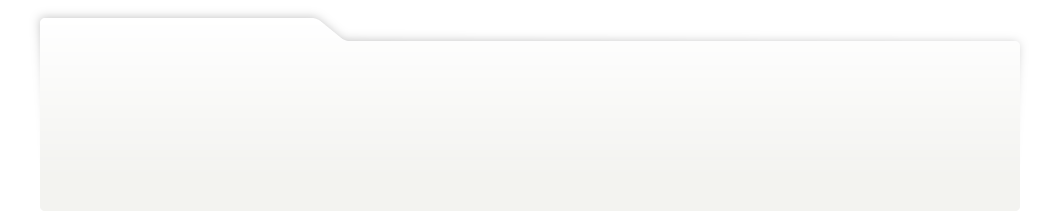
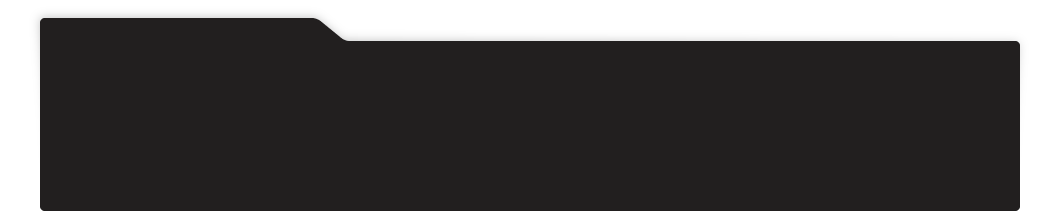
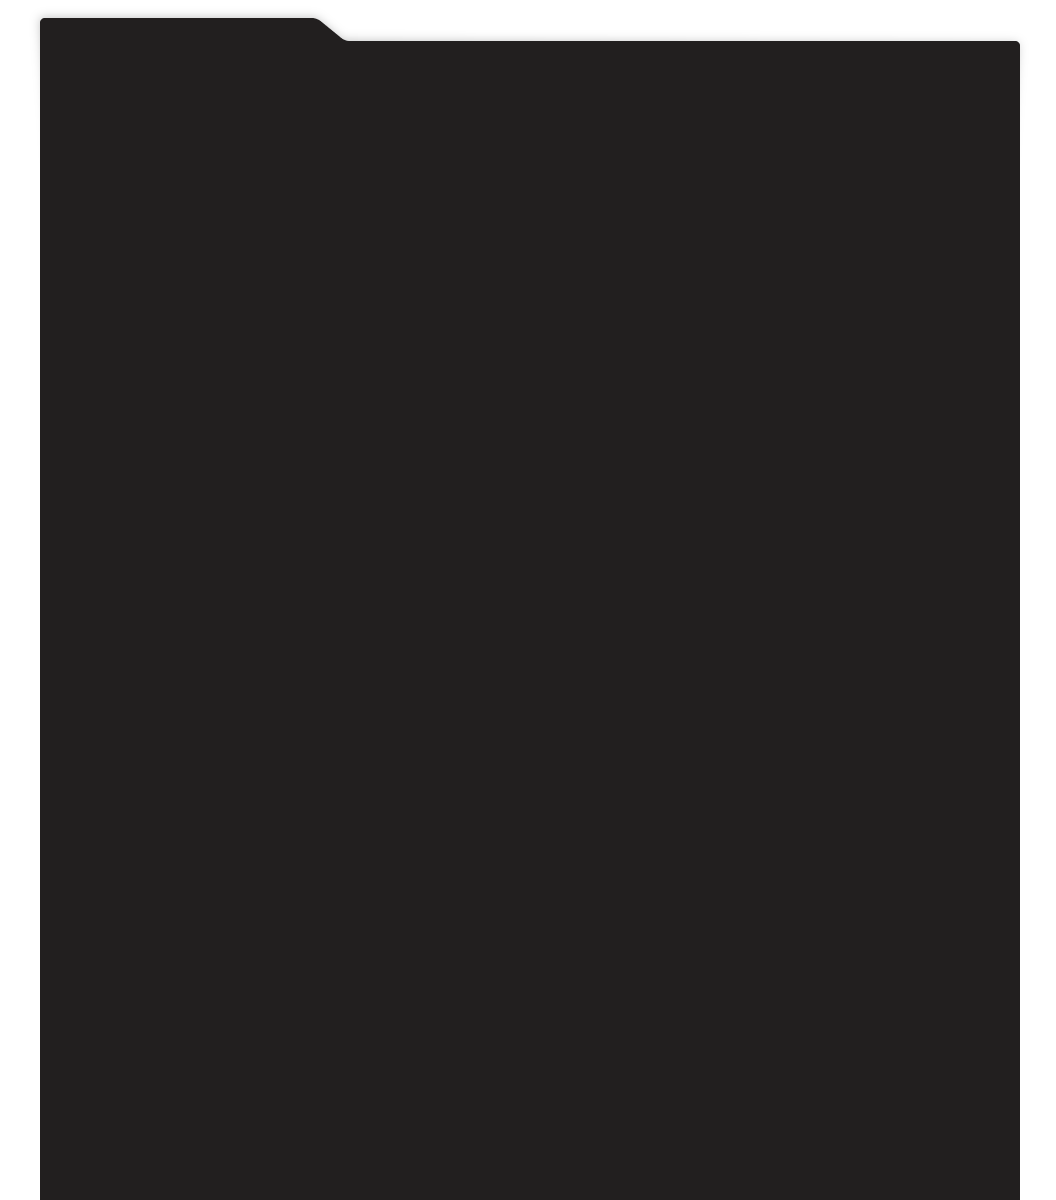
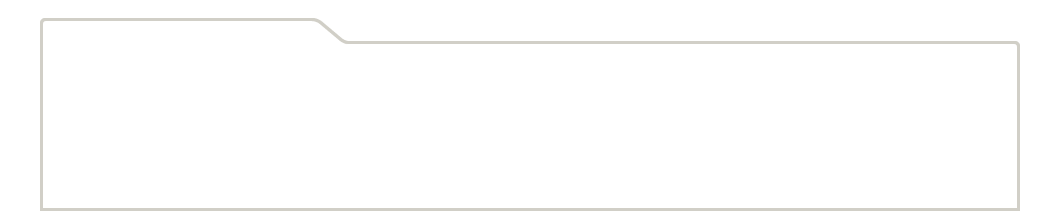
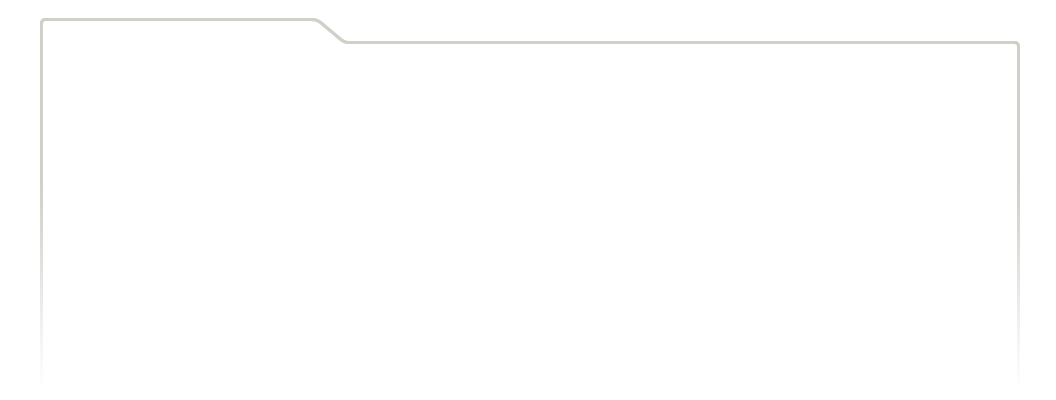
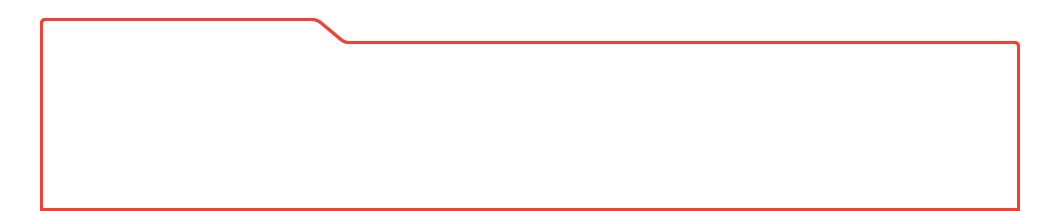
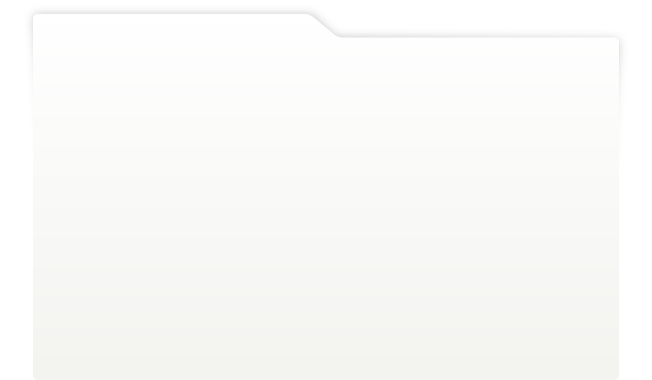
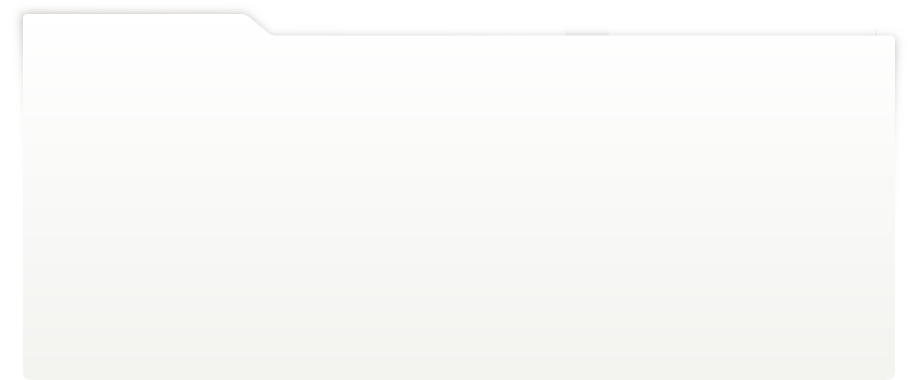
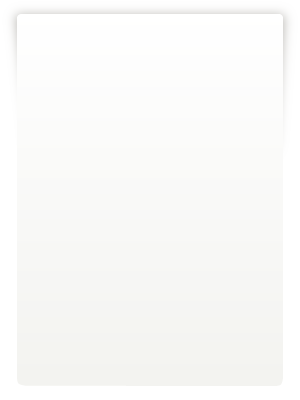
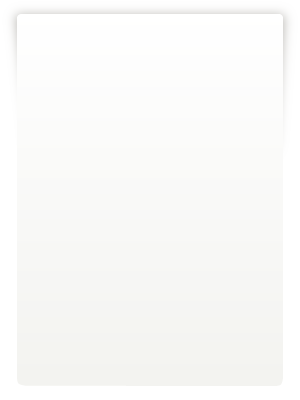
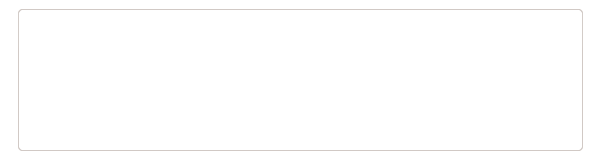
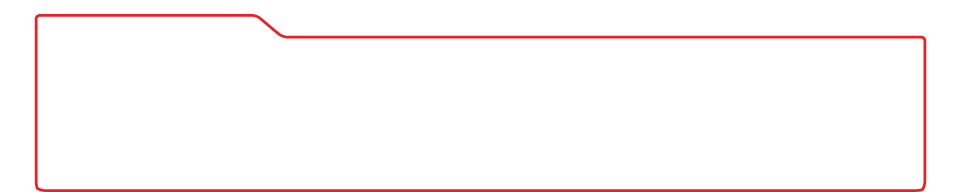
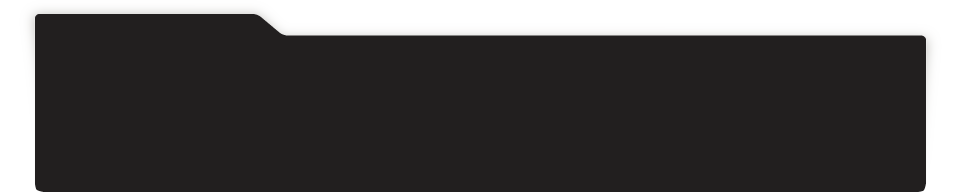
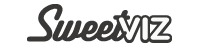
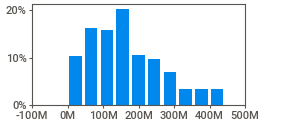
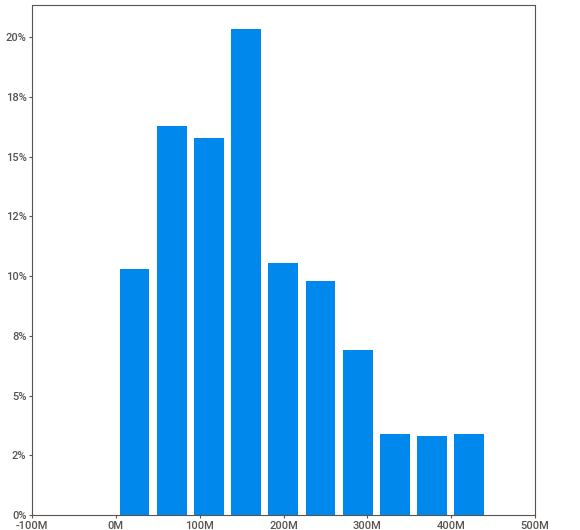
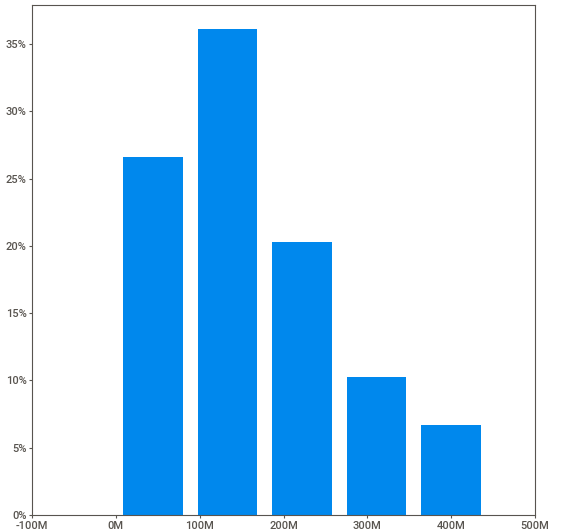
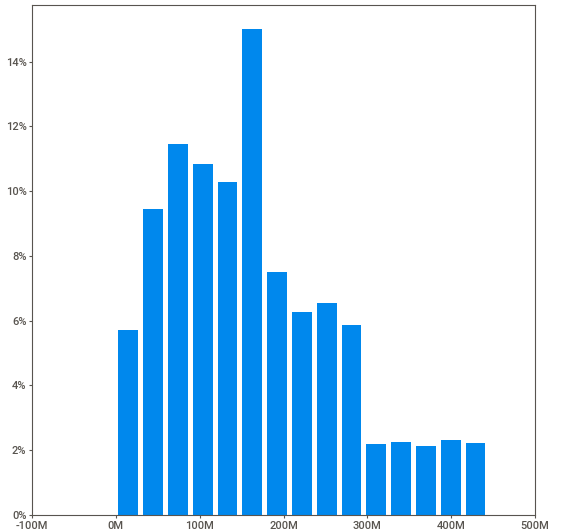
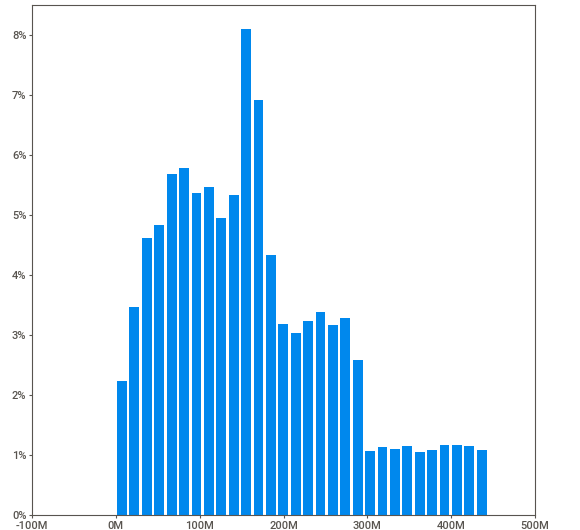
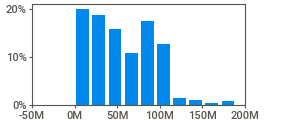
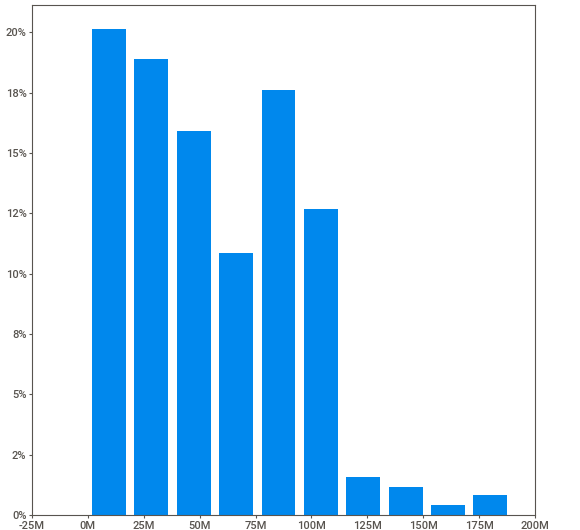
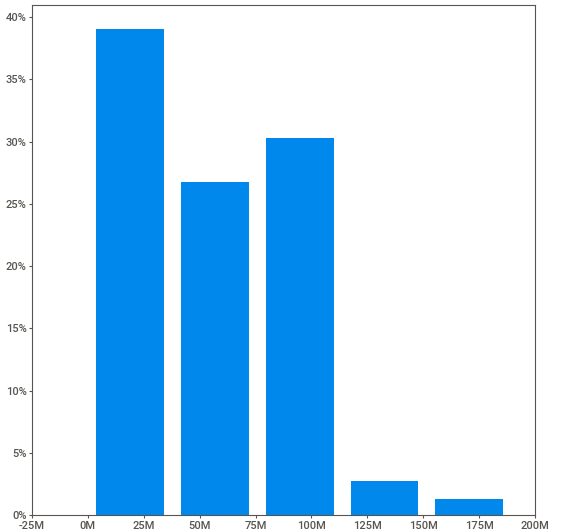
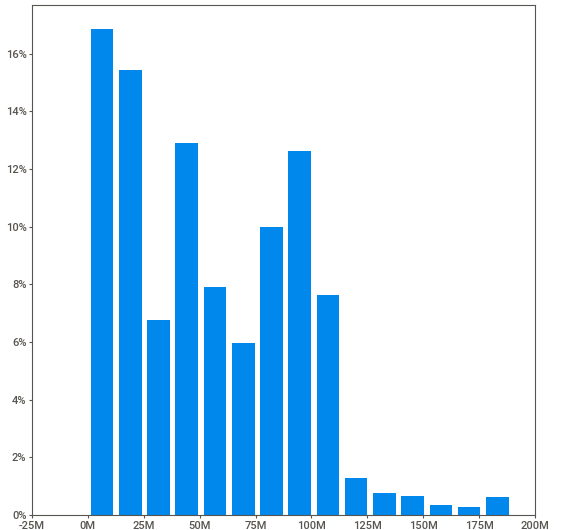
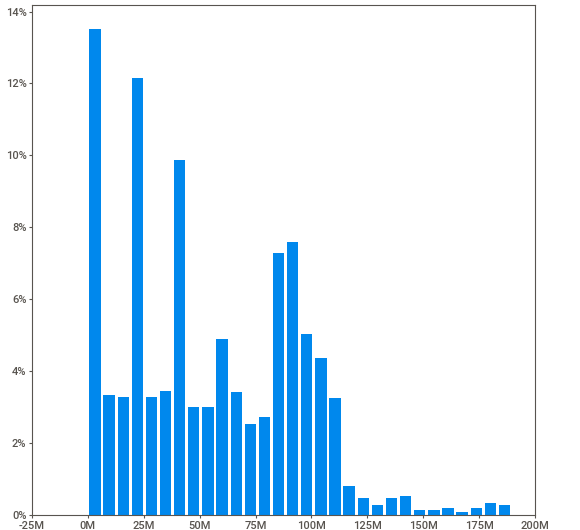
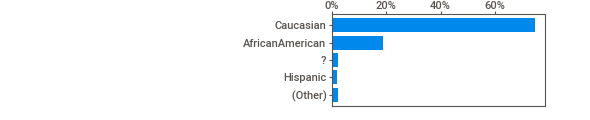
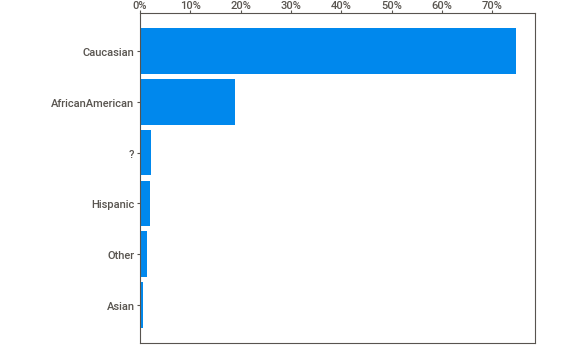
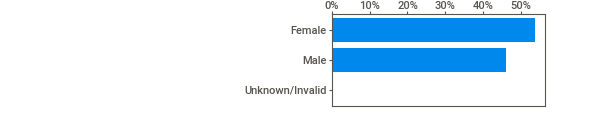
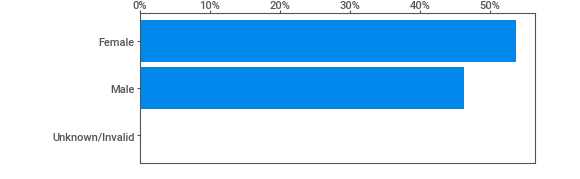
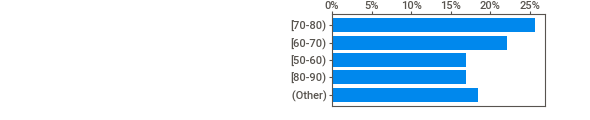
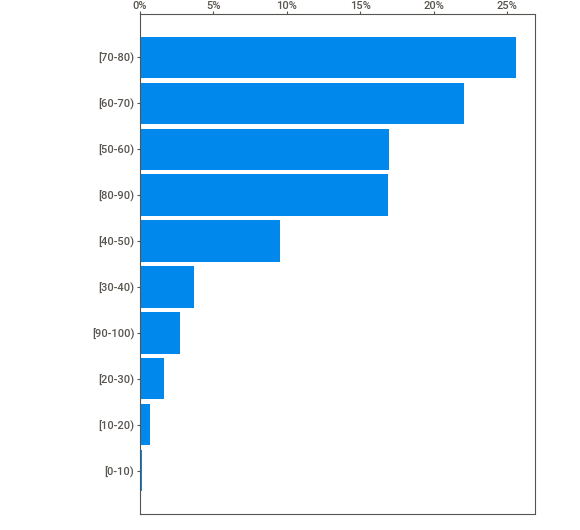
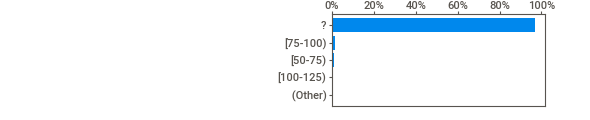
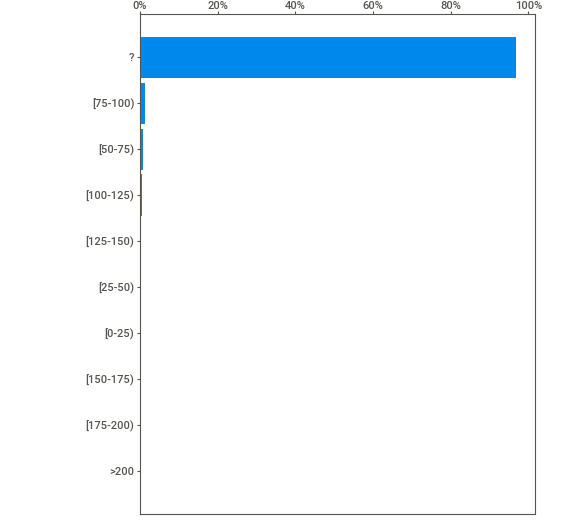
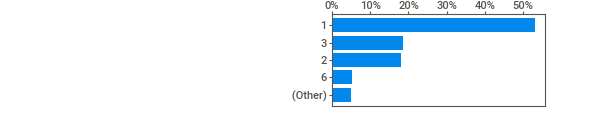
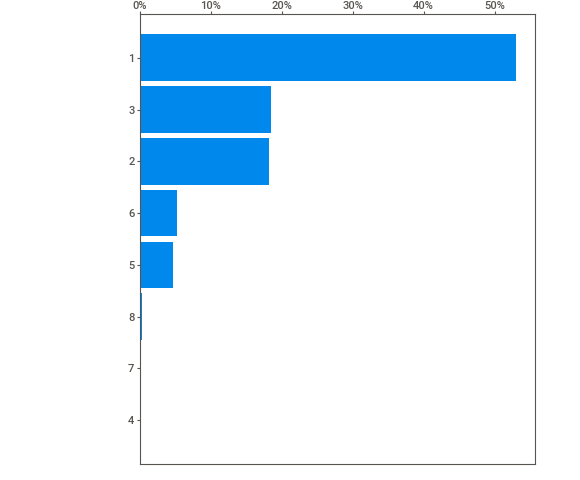
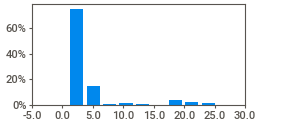
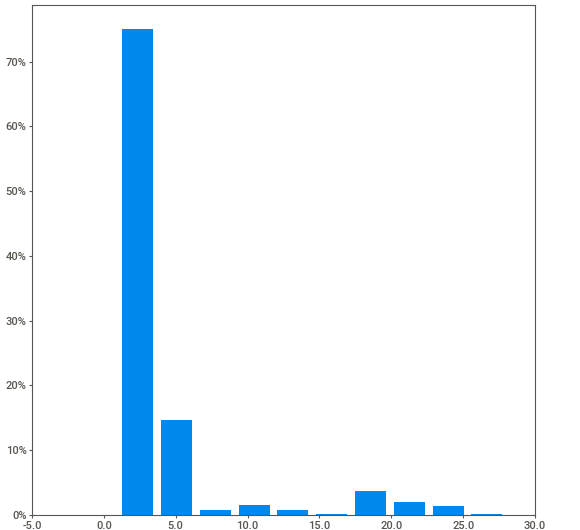
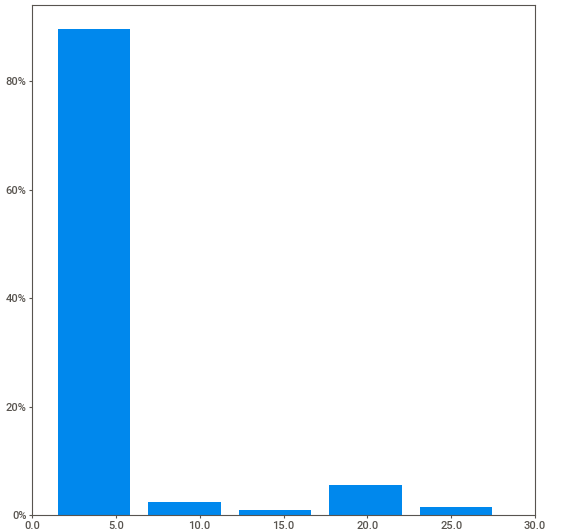
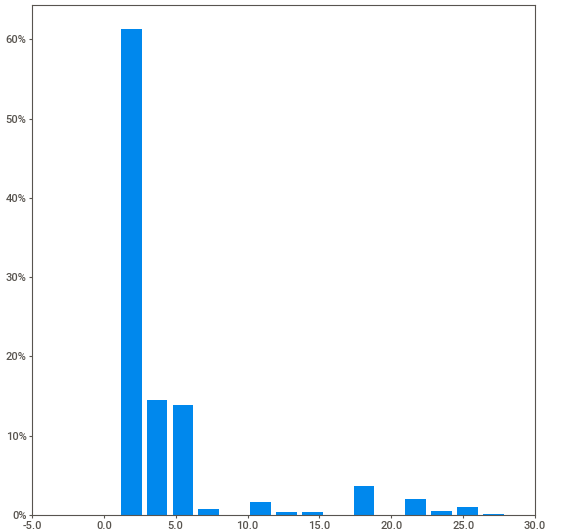
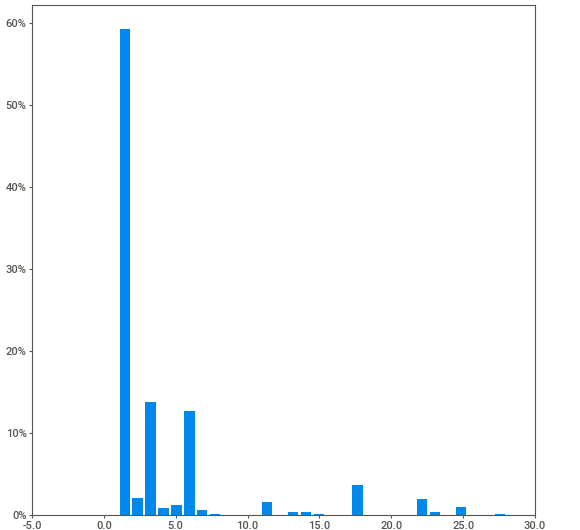
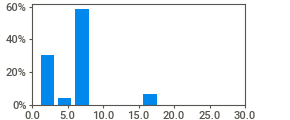
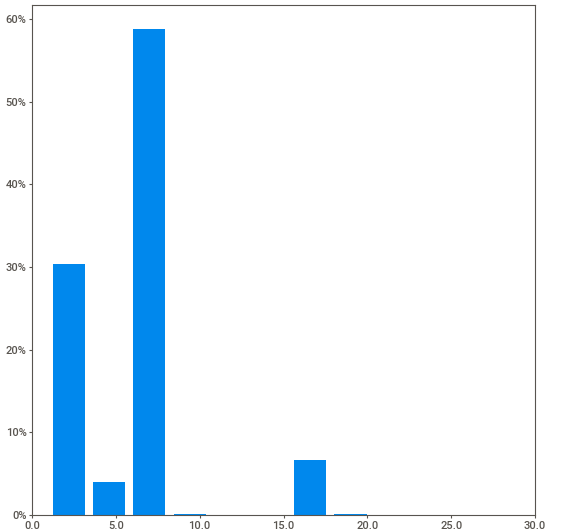
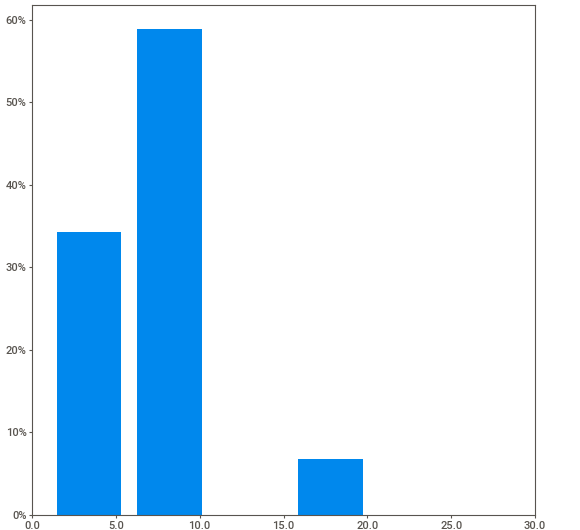
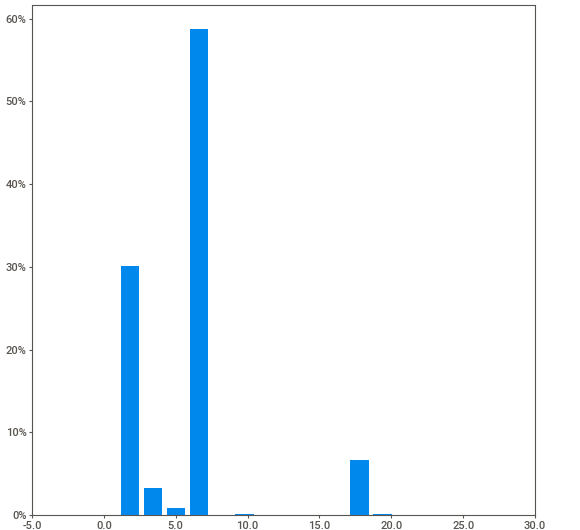
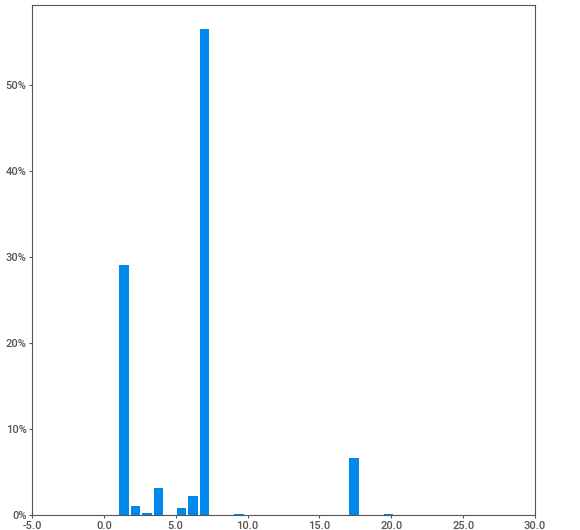
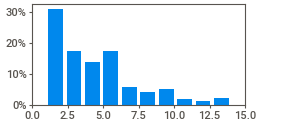
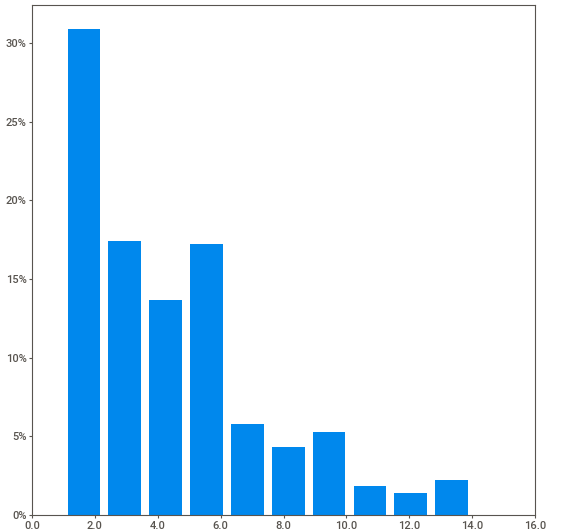
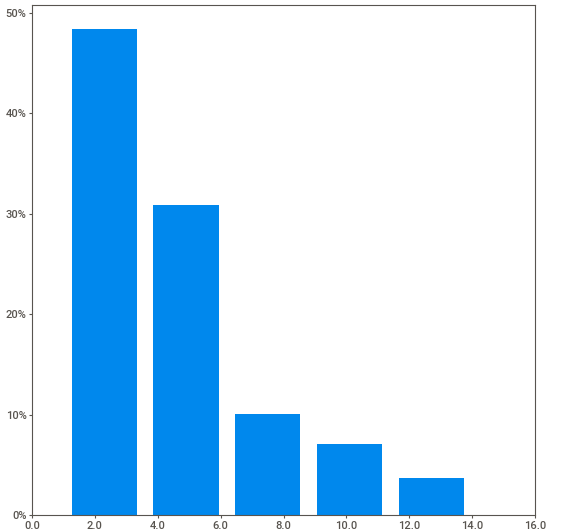
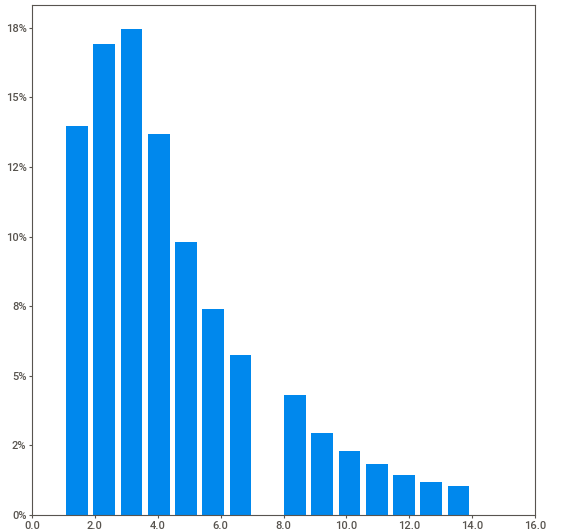
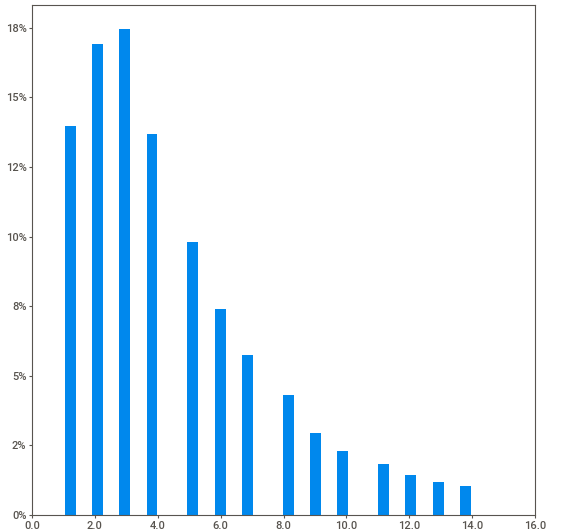
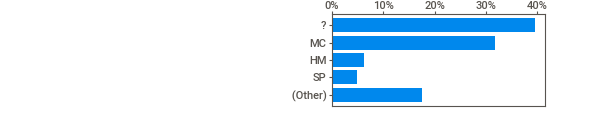
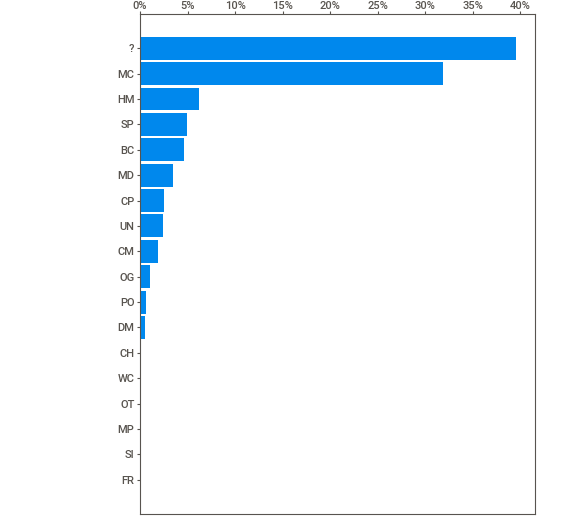
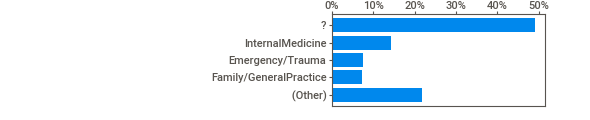
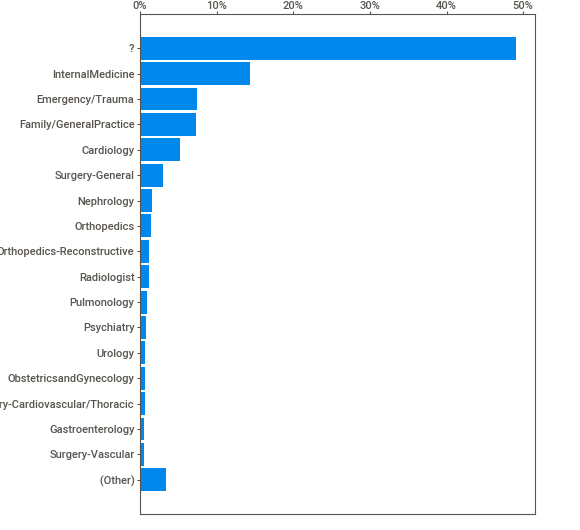
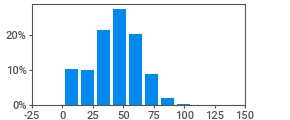
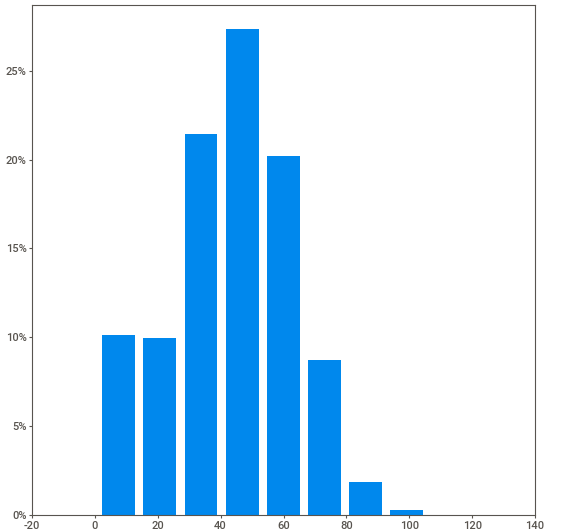
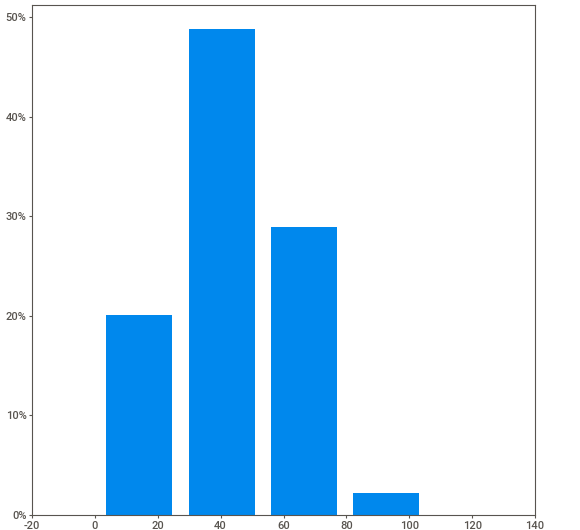
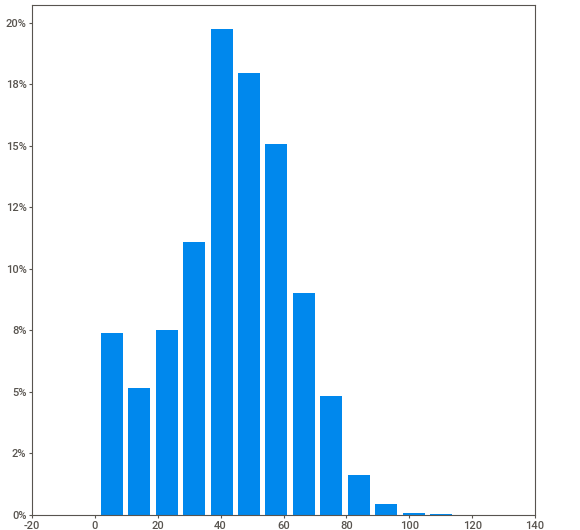
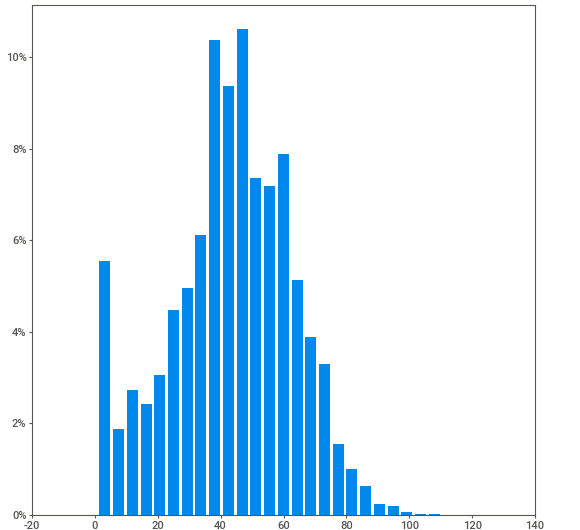
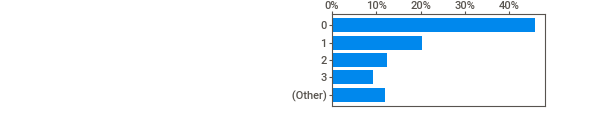
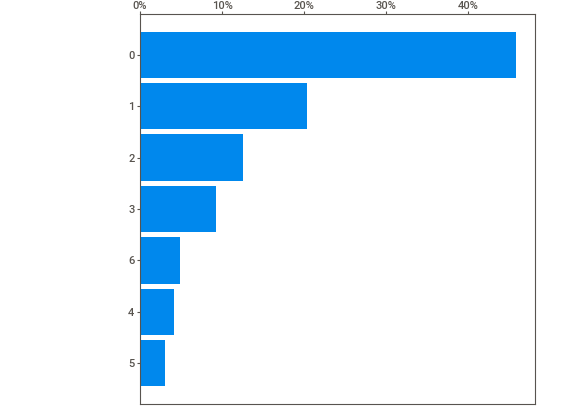
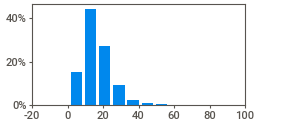
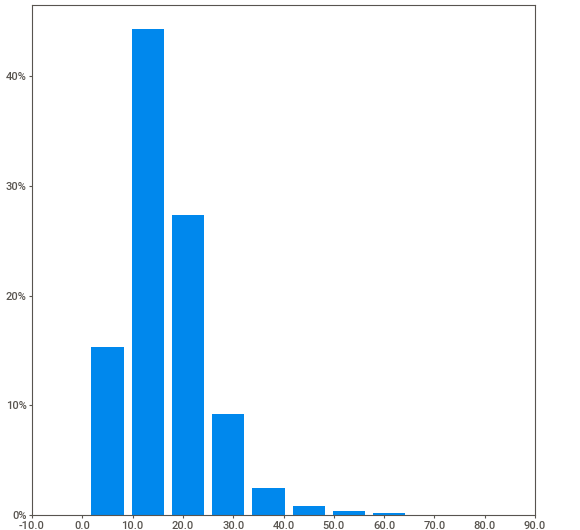
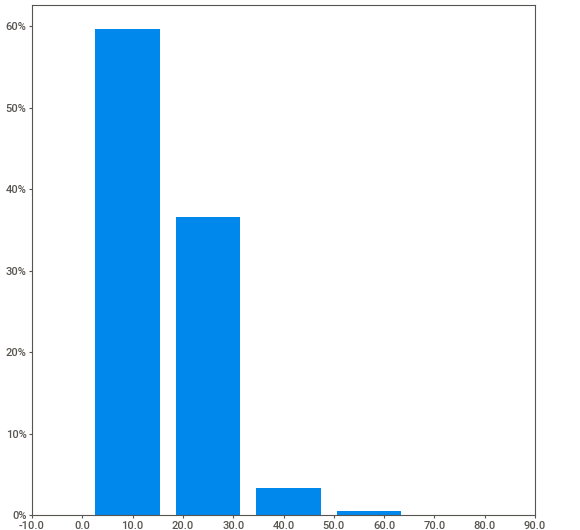
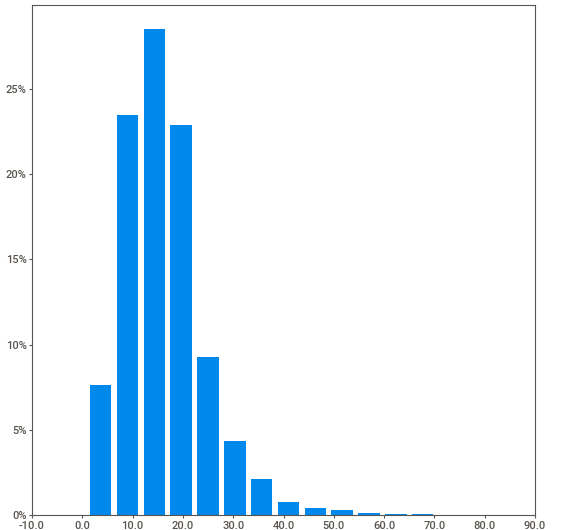
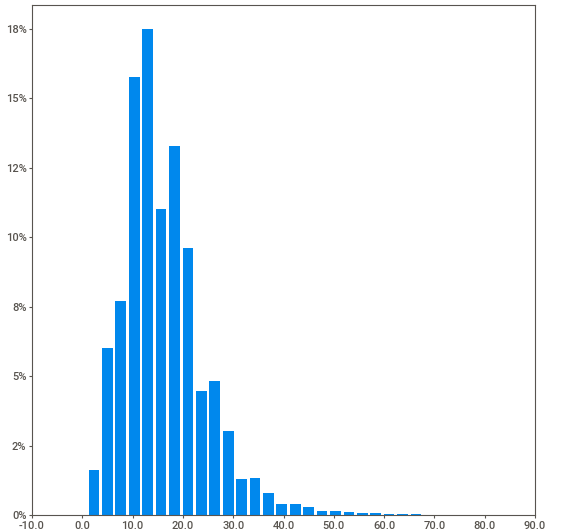
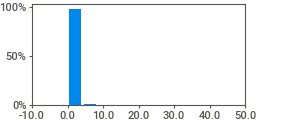
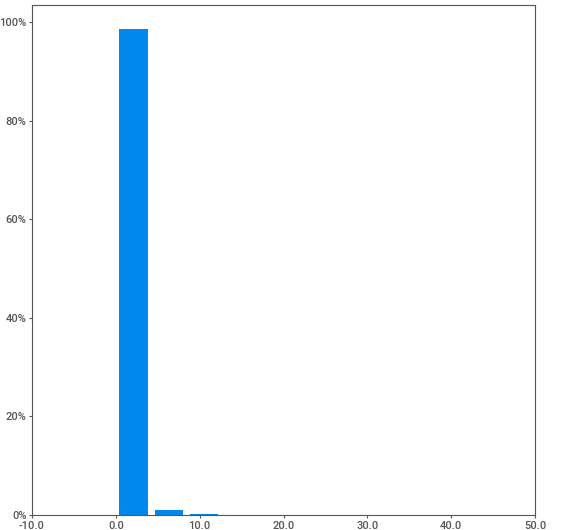
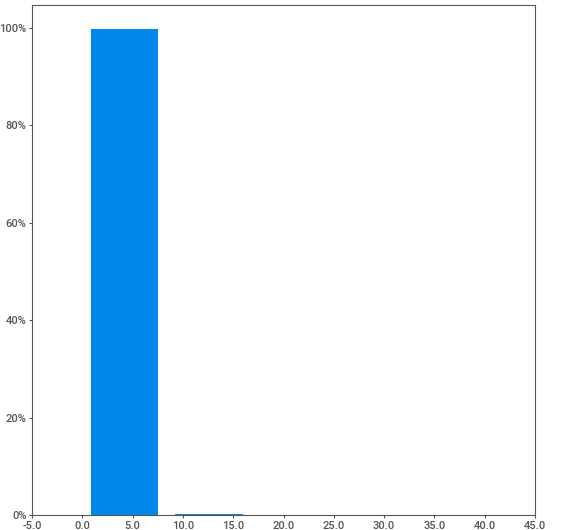
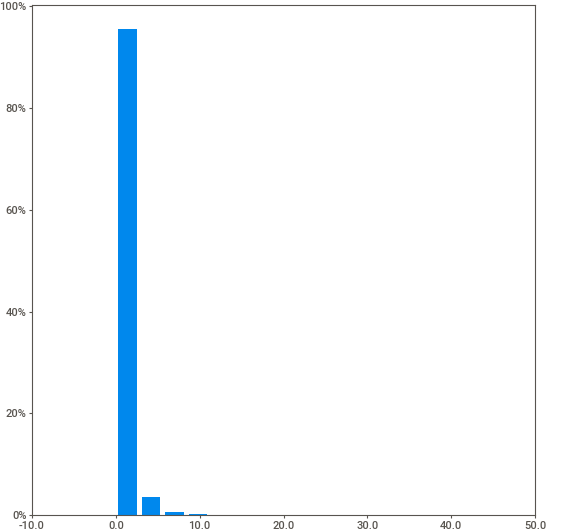
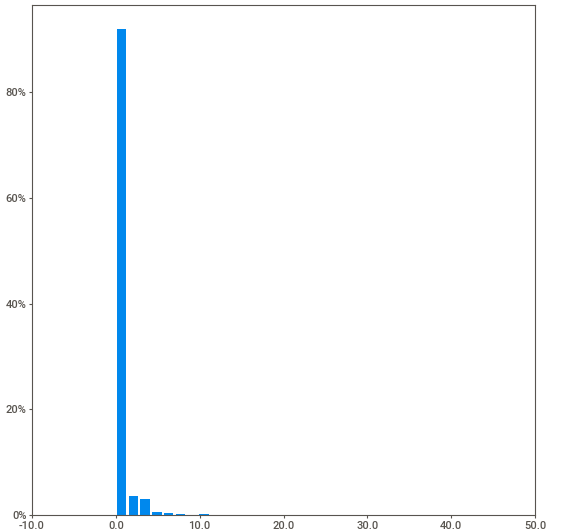
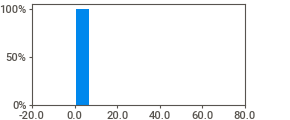
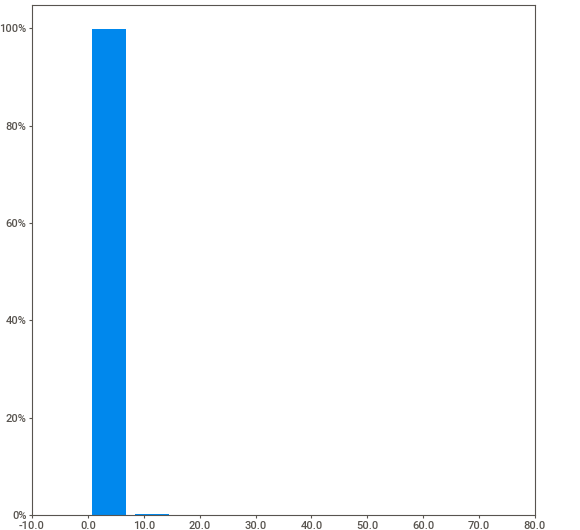
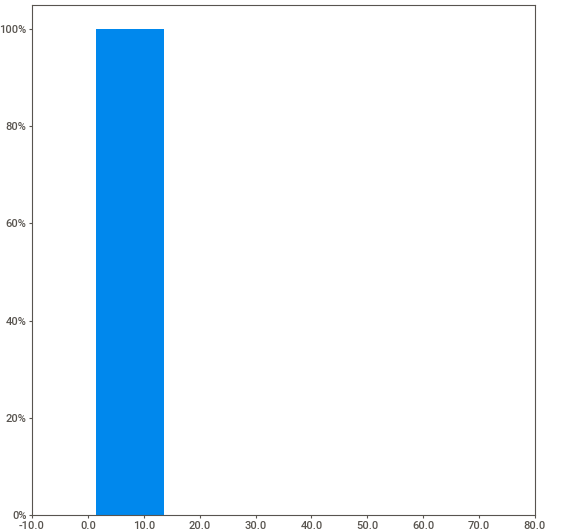
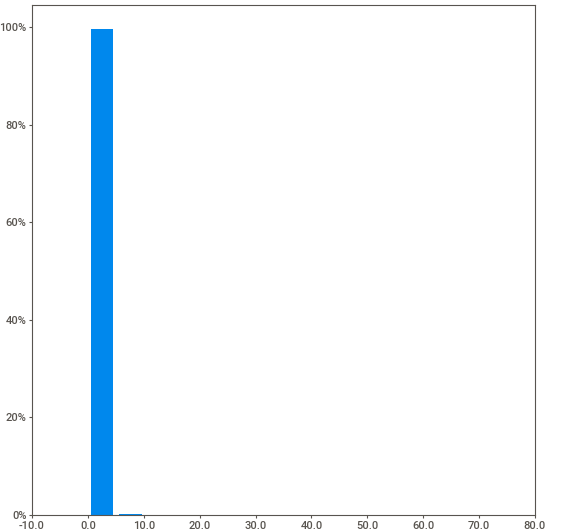
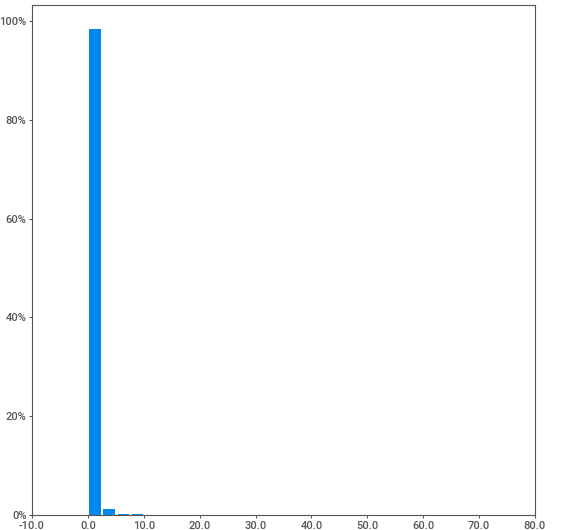
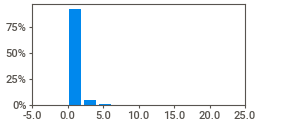
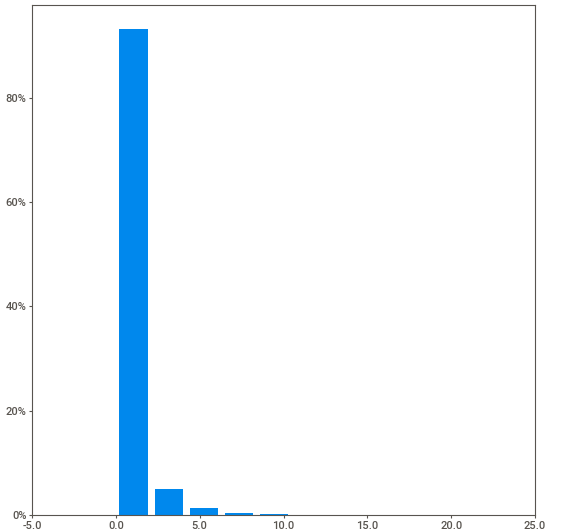
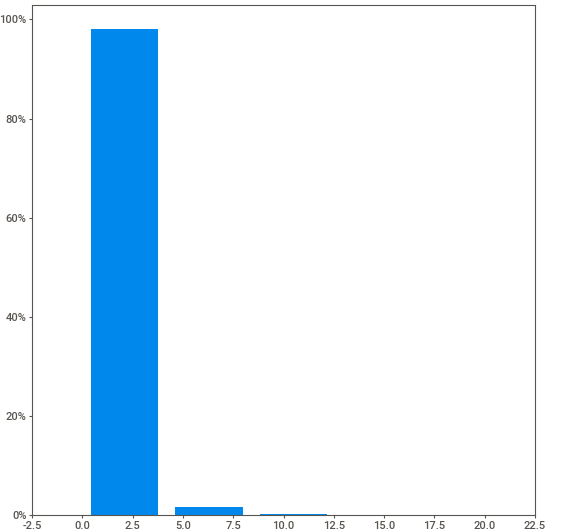
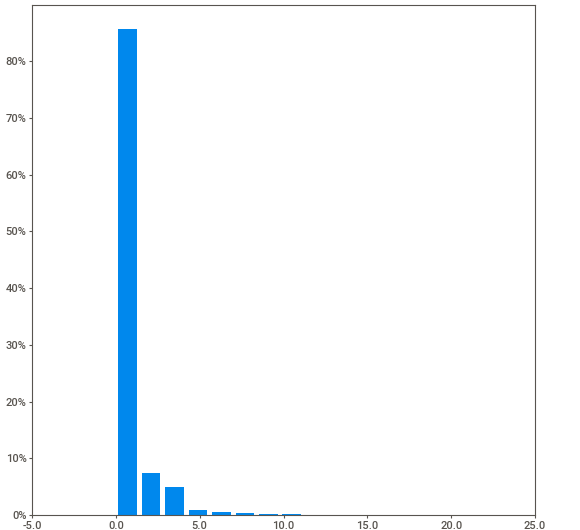
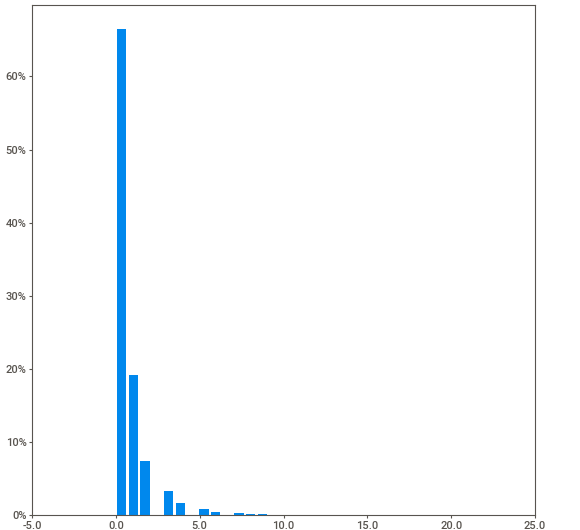
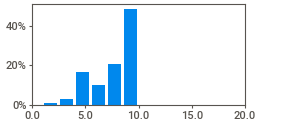
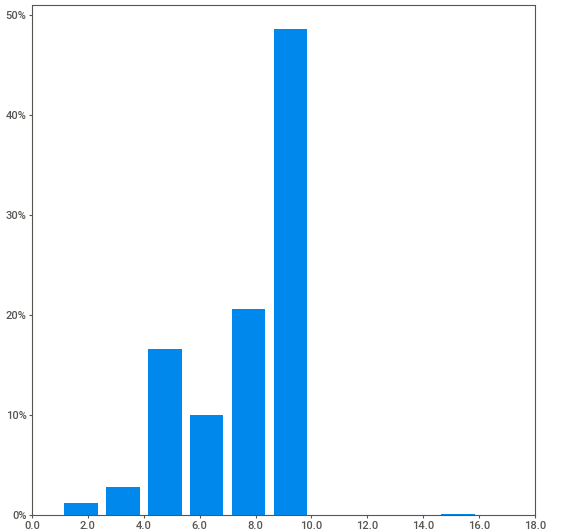
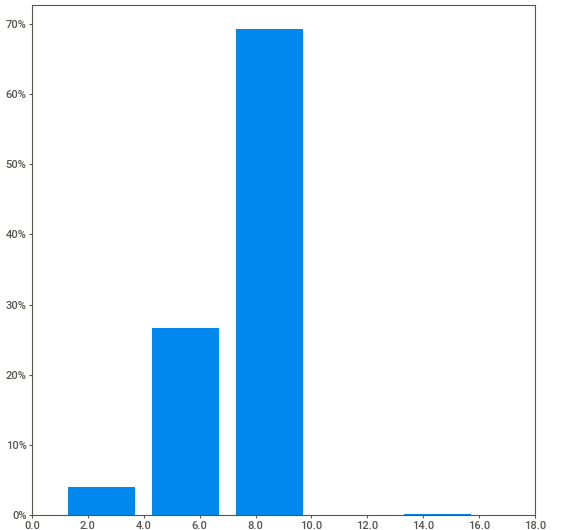
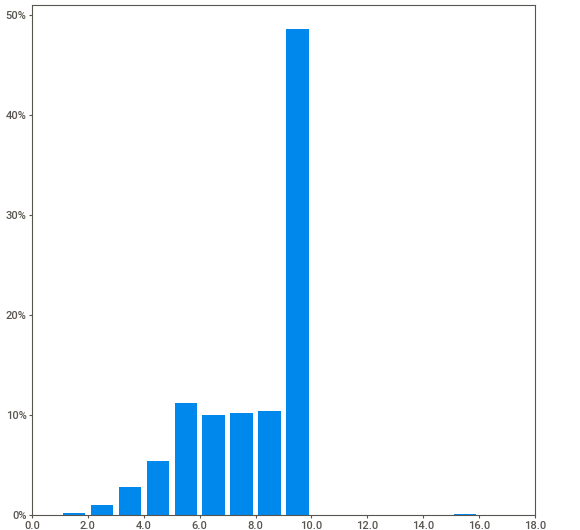
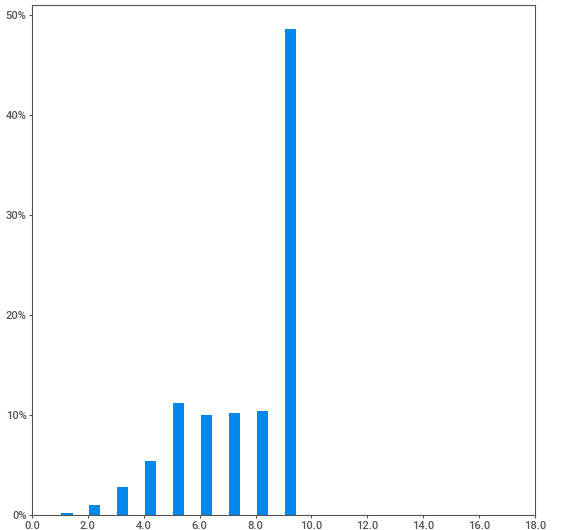
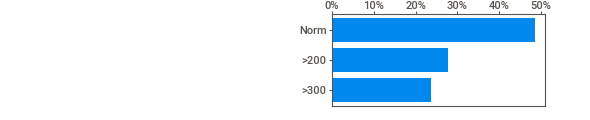
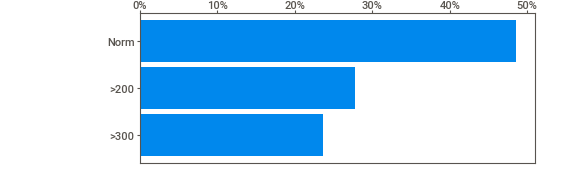
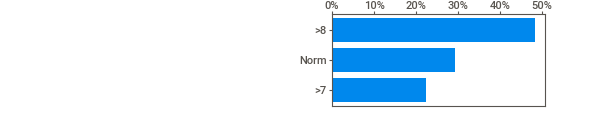
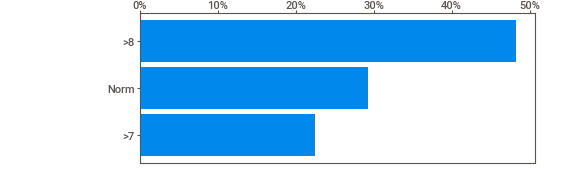
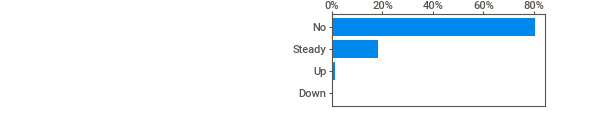
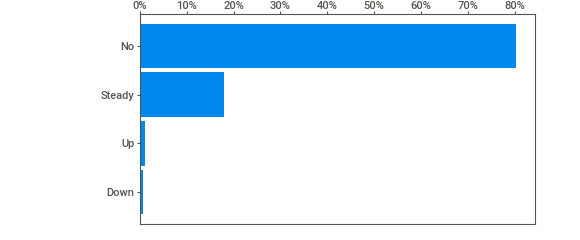
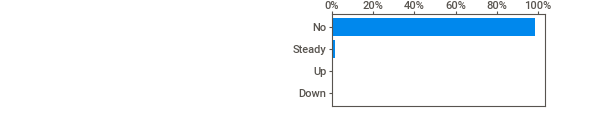
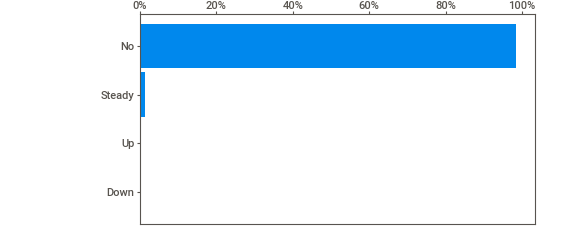
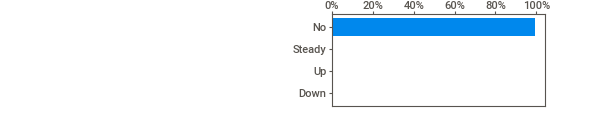
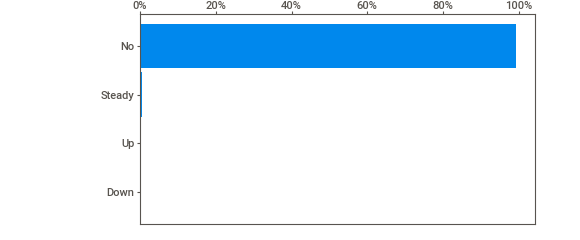
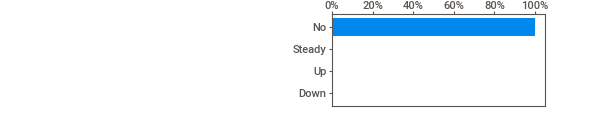
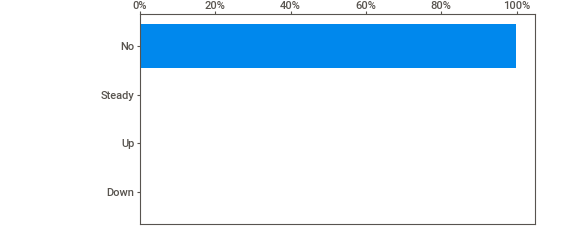
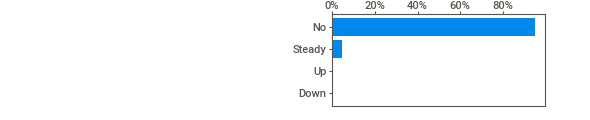
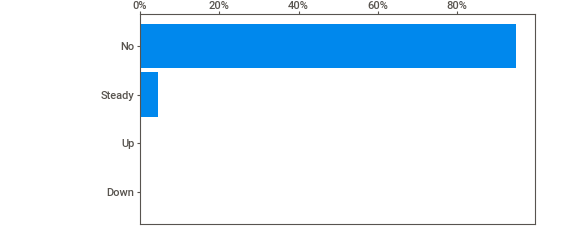
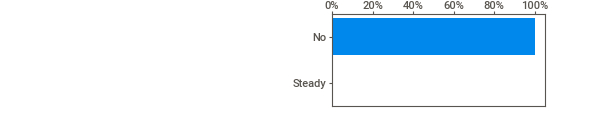
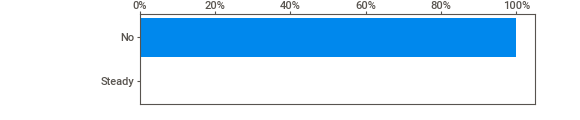
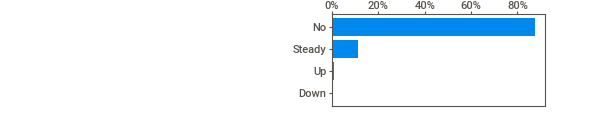
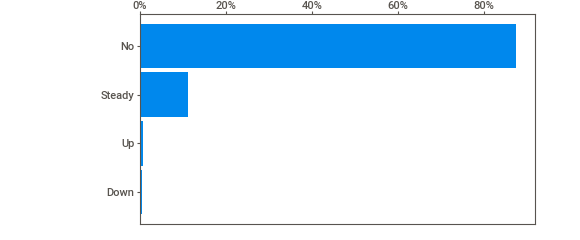
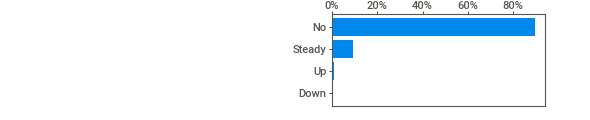
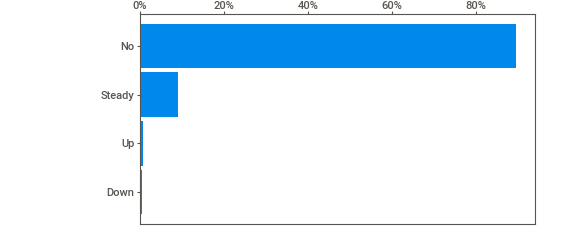
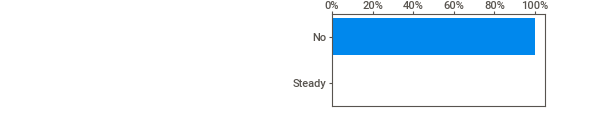
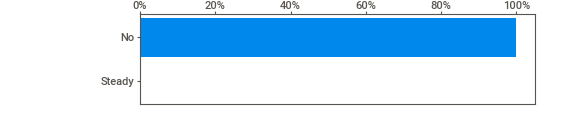
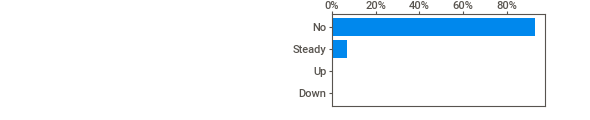
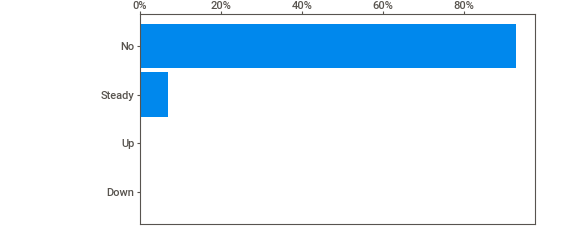
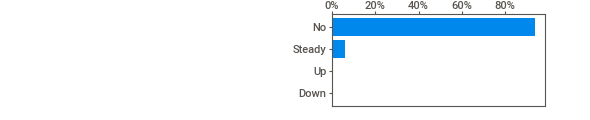
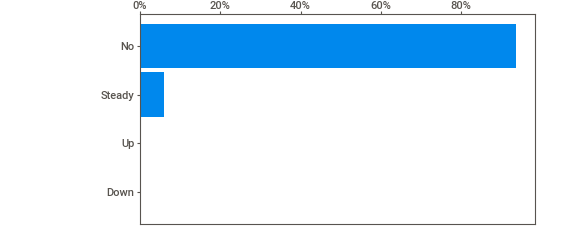
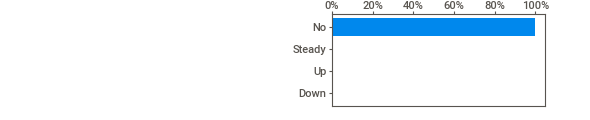
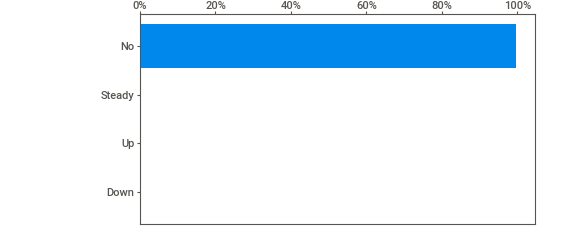
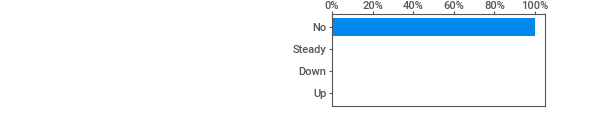
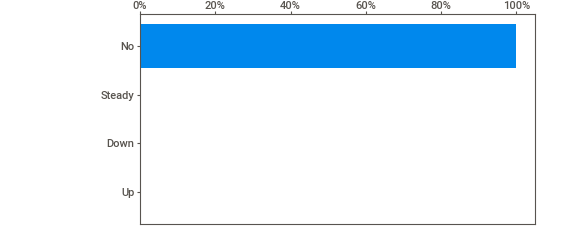
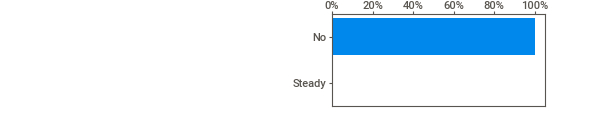
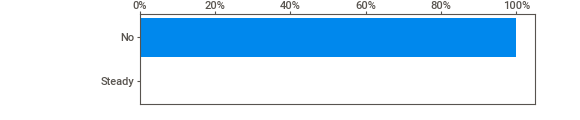
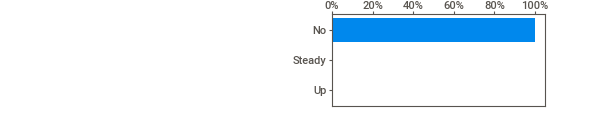
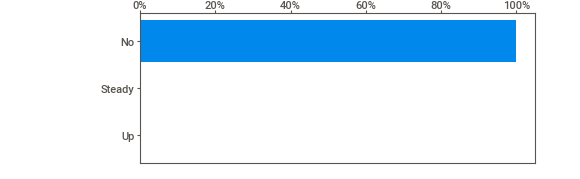
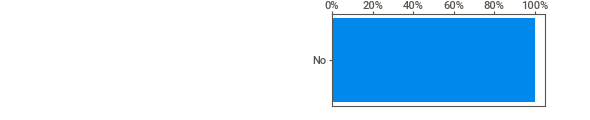
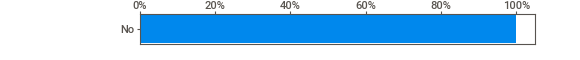
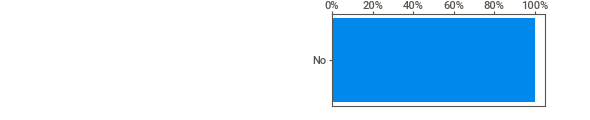
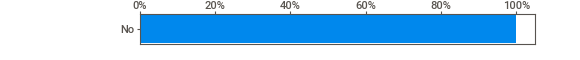
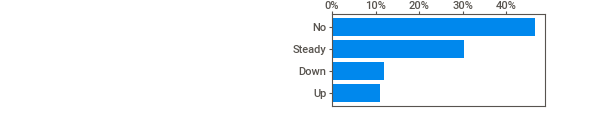
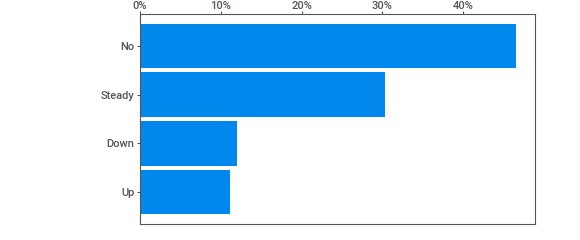
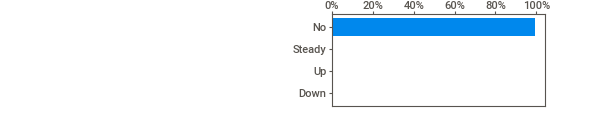
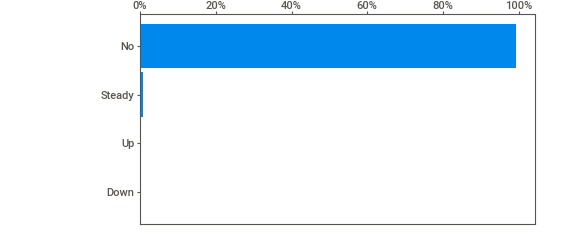
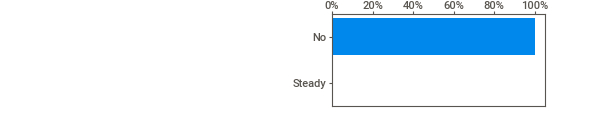
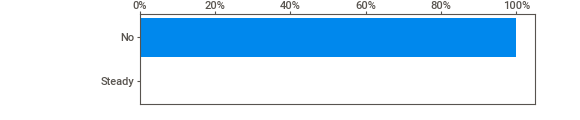
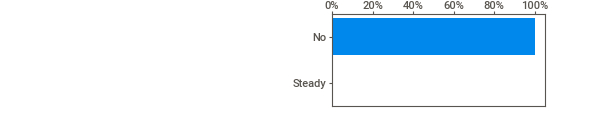
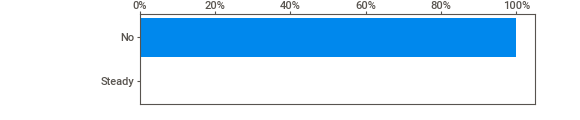
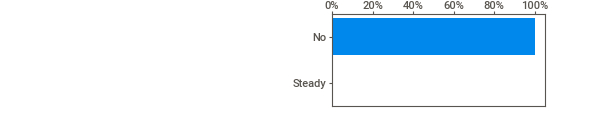
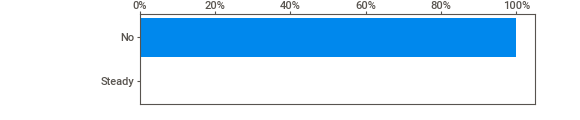
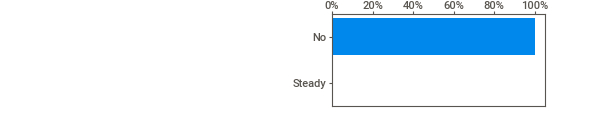
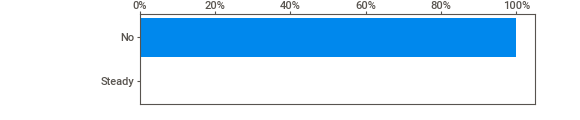
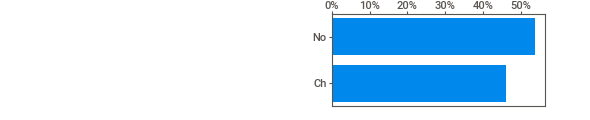
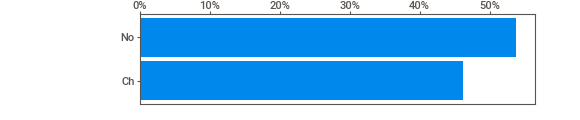
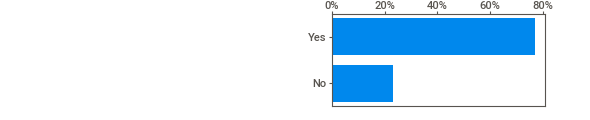
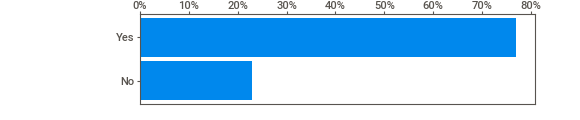
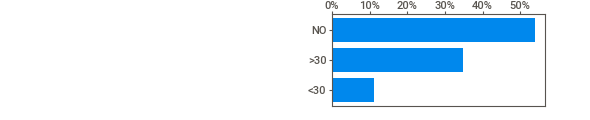
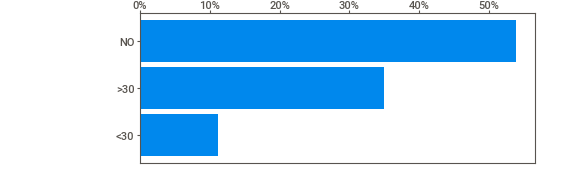
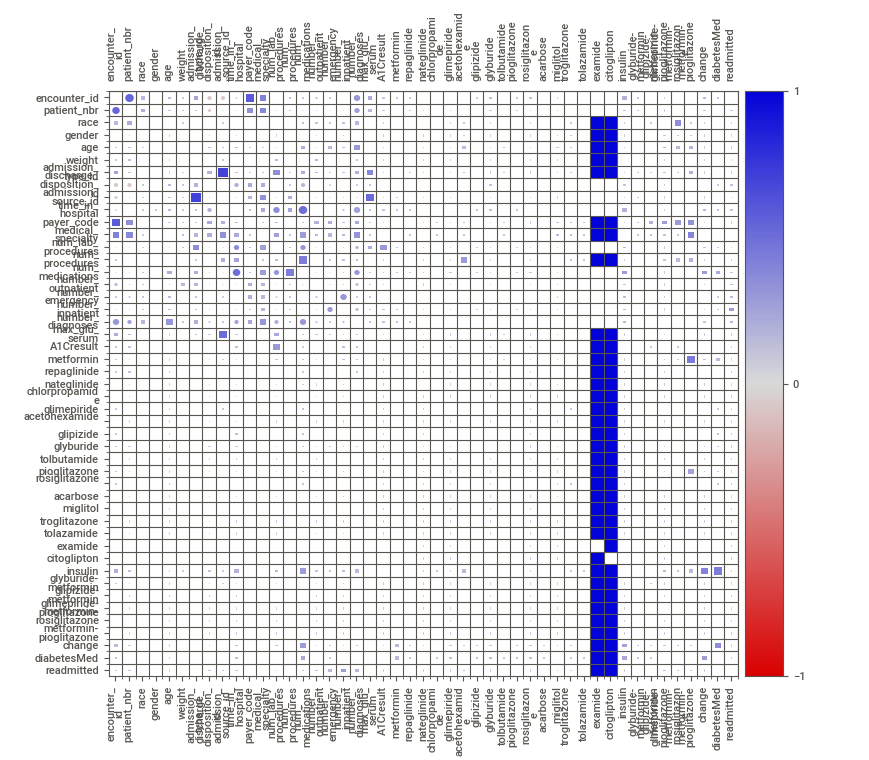
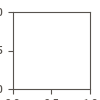

In [10]:
# Generate the report using SweetViz package, it takes a few minutes to run but provides a comprehensive report on the data
import sweetviz as sv

report = sv.analyze(df_original)
report.show_notebook()

In [9]:
# Check for missing values by column
missing_values = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
encounter_id                           0
patient_nbr                            0
race                                2273
gender                                 0
age                                    0
weight                             98569
admission_type_id                      0
discharge_disposition_id               0
admission_source_id                    0
time_in_hospital                       0
payer_code                         40256
medical_specialty                  49949
num_lab_procedures                     0
num_procedures                         0
num_medications                        0
number_outpatient                      0
number_emergency                       0
number_inpatient                       0
diag_1                                 0
diag_2                                 0
diag_3                                 0
number_diagnoses                       0
max_glu_serum                      96420
A1Cresult                          84748
metformin                              0
repaglinide                            0
nateglinide                            0
chlorpropamide                         0
glimepiride                            0
acetohexamide                          0
glipizide                              0
glyburide                              0
tolbutamide                            0
pioglitazone                           0
rosiglitazone                          0
acarbose                               0
miglitol                               0
troglitazone                           0
tolazamide                             0
examide                                0
citoglipton                            0
insulin                                0
glyburide-metformin                    0
glipizide-metformin                    0
glimepiride-pioglitazone               0
metformin-rosiglitazone                0
metformin-pioglitazone                 0
change                                 0
diabetesMed                            0
readmitted                             0

In [10]:
df['payer_code'].sort_values().unique()
# make a pd.dataframe wiht the array
pd.DataFrame(df['payer_code'].sort_values().unique())

0
0    BC
1    CH
2    CM
3    CP
4    DM
5    FR
6    HM
7    MC
8    MD
9    MP
10   OG
11   OT
12   PO
13   SI
14   SP
15   UN
16   WC
17  NaN

In [11]:
# fix dtype on diag_1, diag_2, diag_3
df['diag_1'] = df['diag_1'].astype(object)
df['diag_2'] = df['diag_2'].astype(object)
df['diag_3'] = df['diag_3'].astype(object)
# convert 

In [12]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [13]:
df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [ ]:
# # make a dataframe of df with df2 name
# missing_values = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])
# missing_values 

In [14]:

# column race has 2% missing values, replace with mode 
# Get the mode (most frequent value)

mode = df['race'].mode().iloc[0]
print(mode)
df['race'] = df['race'].fillna(mode)

# Print the info for the 'race' column
print(df[['race']].info())
df['race'].isnull().sum()


Caucasian
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   race    101766 non-null  object
dtypes: object(1)
memory usage: 795.2+ KB
None


0

In [15]:
# Nearly 40% of payer code is missing. Replace with 'unknown'
df['payer_code'] = df['payer_code'].fillna('unknown')
print(df['payer_code'].unique())
print(df[['payer_code']].info())
df['payer_code'].isnull().sum()

['unknown' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO'
 'WC' 'OT' 'OG' 'MP' 'FR']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   payer_code  101766 non-null  object
dtypes: object(1)
memory usage: 795.2+ KB
None


0

In [16]:
# Nearly 47% of medical specialty is missing. Replace with 'unknown'
df['medical_specialty'] = df['medical_specialty'].fillna('unknown')
print(df['medical_specialty'].unique())
print(df[['medical_specialty']].info())
# check for missing values on medical_specialty
df['medical_specialty'].isnull().sum()

['Pediatrics-Endocrinology' 'unknown' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'InfectiousDiseases' 'Anesthesiology'
 'Rheumatology' 'AllergyandImmunology' 'Surgery-Maxillofacial'
 'Pediatrics-InfectiousDi

0

In [17]:
# None is a special constant in python and is not seen as a class in max_glu_serum, create a class with 'unknown'
df['max_glu_serum'] = df['max_glu_serum'].fillna('N')
print(df['max_glu_serum'].unique())
print(df[['max_glu_serum']].info())
# check for missing values on medical_specialty
df['max_glu_serum'].isnull().sum()

['N' '>300' 'Norm' '>200']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   max_glu_serum  101766 non-null  object
dtypes: object(1)
memory usage: 795.2+ KB
None


0

In [19]:

# None is a special constant in python and is not seen as a class in A1Cresult, create a class with 'unknown'
df['A1Cresult'] = df['A1Cresult'].fillna('N')
print(df['A1Cresult'].unique())
print(df[['A1Cresult']].info())
# check for missing values on medical_specialty
df['A1Cresult'].isnull().sum()

['N' '>7' '>8' 'Norm']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   A1Cresult  101766 non-null  object
dtypes: object(1)
memory usage: 795.2+ KB
None


0

In [20]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [21]:
# now lets drop the column weight and rename the dataset 
df_new = df.drop(columns=['weight'])

In [22]:
df_new.head()
print(df_new.columns)
print(df_new.shape)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
(101766, 49)


In [ ]:
# 

KeyboardInterrupt: 

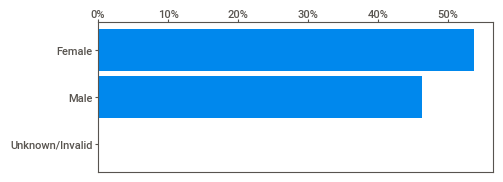

In [23]:

import sweetviz as sv
from IPython.display import IFrame

report = sv.analyze(df_new)
# Run report again to see the missing values 
report.show_notebook()

['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic']
Categories (5, object): ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']
race
Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


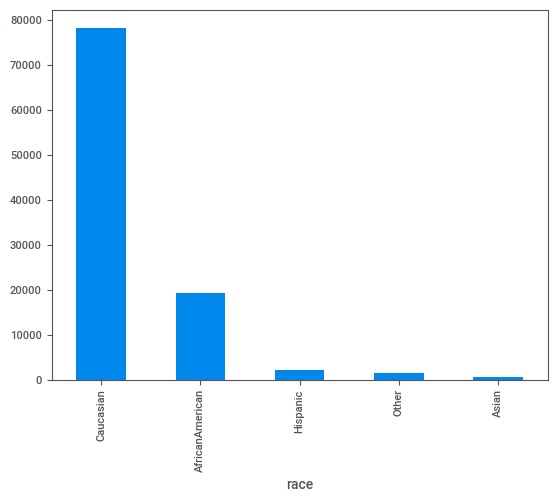

['Female', 'Male', 'Unknown/Invalid']
Categories (3, object): ['Female', 'Male', 'Unknown/Invalid']
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


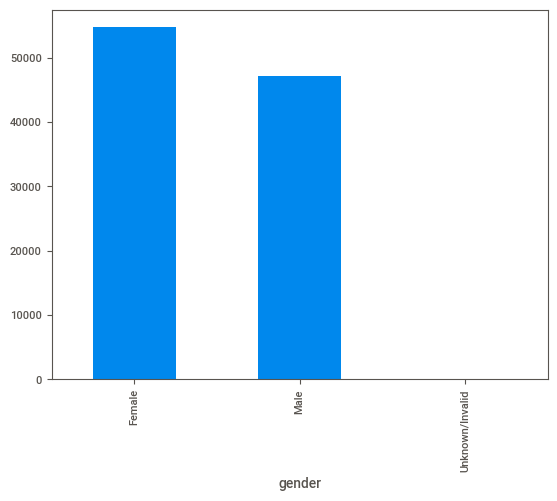

['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
Categories (10, object): ['[0-10)', '[10-20)', '[20-30)', '[30-40)', ..., '[60-70)', '[70-80)', '[80-90)', '[90-100)']
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64


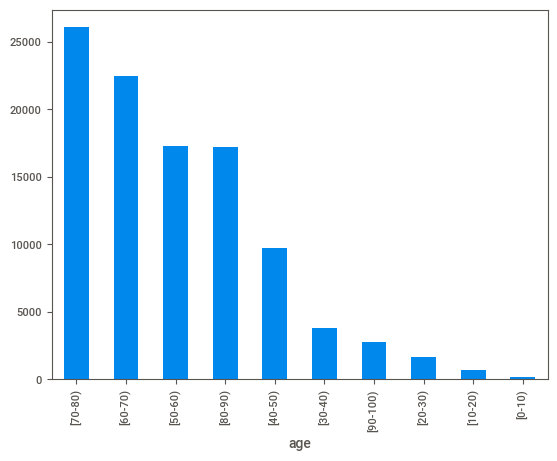

['unknown', 'MC', 'MD', 'HM', 'UN', ..., 'WC', 'OT', 'OG', 'MP', 'FR']
Length: 18
Categories (18, object): ['BC', 'CH', 'CM', 'CP', ..., 'SP', 'UN', 'WC', 'unknown']
payer_code
unknown    40256
MC         32439
HM          6274
SP          5007
BC          4655
MD          3532
CP          2533
UN          2448
CM          1937
OG          1033
PO           592
DM           549
CH           146
WC           135
OT            95
MP            79
SI            55
FR             1
Name: count, dtype: int64


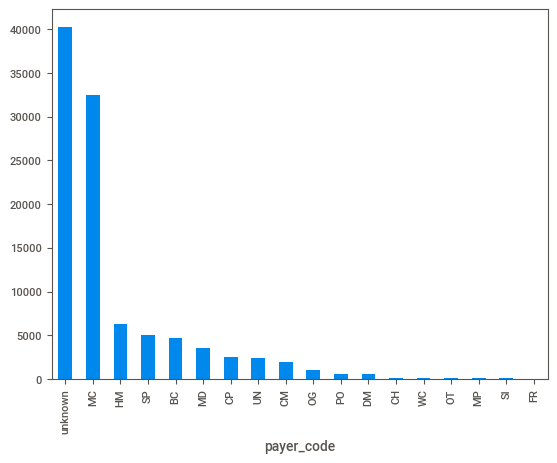

['Pediatrics-Endocrinology', 'unknown', 'InternalMedicine', 'Family/GeneralPractice', 'Cardiology', ..., 'Perinatology', 'Neurophysiology', 'Endocrinology-Metabolism', 'DCPTEAM', 'Resident']
Length: 73
Categories (73, object): ['AllergyandImmunology', 'Anesthesiology', 'Anesthesiology-Pediatric', 'Cardiology', ..., 'Surgery-Vascular', 'SurgicalSpecialty', 'Urology', 'unknown']
medical_specialty
unknown                                 49949
InternalMedicine                        14635
Emergency/Trauma                         7565
Family/GeneralPractice                   7440
Cardiology                               5352
Surgery-General                          3099
Nephrology                               1613
Orthopedics                              1400
Orthopedics-Reconstructive               1233
Radiologist                              1140
Pulmonology                               871
Psychiatry                                854
Urology                                   685
Obst

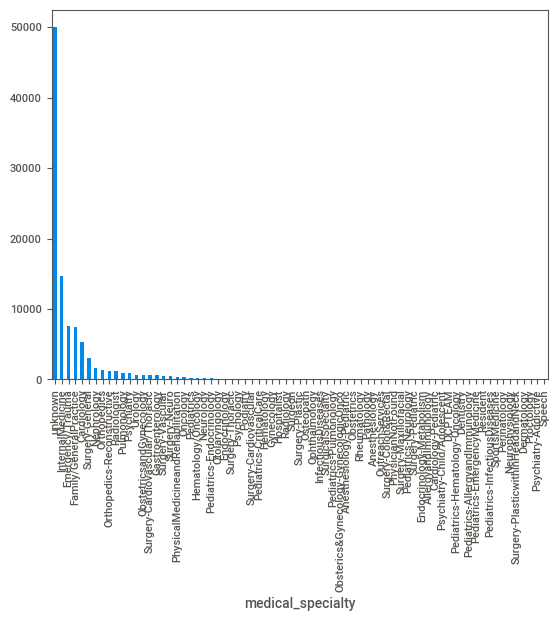

['250.83', '276', '648', '8', '197', ..., '833', '391', '690', '10', 'V51']
Length: 717
Categories (717, object): ['10', '11', '110', '112', ..., 'V66', 'V67', 'V70', 'V71']
diag_1
428       6862
414       6581
786       4016
410       3614
486       3508
427       2766
491       2275
715       2151
682       2042
434       2028
780       2019
996       1967
276       1889
38        1688
250.8     1680
599       1595
584       1520
V57       1207
250.6     1183
518       1115
820       1082
577       1057
493       1056
435       1016
562        989
574        965
296        896
560        876
250.7      871
250.13     851
440        840
433        789
998        784
722        771
250.02     675
578        663
250.11     625
507        610
789        561
453        546
530        531
8          515
403        513
535        450
402        449
415        449
295        447
724        440
458        426
162        425
997        424
250.12     417
250.82     412
278        379
733      

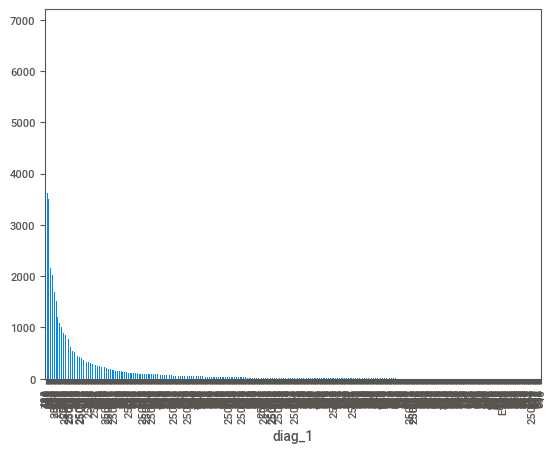

['?', '250.01', '250', '250.43', '157', ..., '123', '884', 'V60', '843', '927']
Length: 749
Categories (749, object): ['11', '110', '111', '112', ..., 'V70', 'V72', 'V85', 'V86']
diag_2
276       6752
428       6662
250       6071
427       5036
401       3736
496       3305
599       3288
403       2823
414       2650
411       2566
250.02    2074
707       1999
585       1871
584       1649
491       1545
250.01    1523
285       1520
780       1491
425       1434
682       1433
486       1379
518       1355
424       1071
413       1042
250.6      895
493        881
305        702
786        644
280        606
998        571
410        549
511        519
785        516
38         475
996        454
272        420
571        414
197        410
V45        408
295        408
440        406
162        401
577        401
560        394
788        389
997        381
41         379
?          358
578        350
453        346
574        346
789        343
648        338
402        335
198 

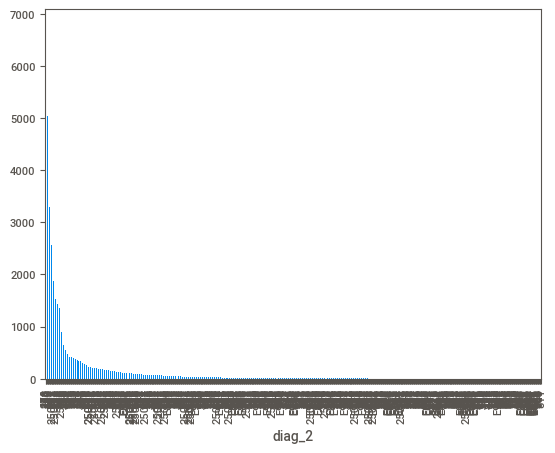

['?', '255', 'V27', '403', '250', ..., '14', '750', '370', '671', '971']
Length: 790
Categories (790, object): ['11', '110', '111', '112', ..., 'V70', 'V72', 'V85', 'V86']
diag_3
250       11555
401        8289
276        5175
428        4577
427        3955
414        3664
496        2605
403        2357
585        1992
272        1969
599        1941
?          1423
V45        1389
250.02     1369
707        1360
780        1334
285        1200
425        1136
250.6      1080
424        1063
584         963
305         924
250.01      915
682         887
518         854
41          727
493         694
278         680
530         625
786         584
491         574
486         568
244         540
V58         501
250.4       429
411         399
280         398
357         394
287         388
785         388
197         385
511         380
402         375
787         358
788         353
412         346
593         339
V15         334
413         329
438         318
998         316
250.8

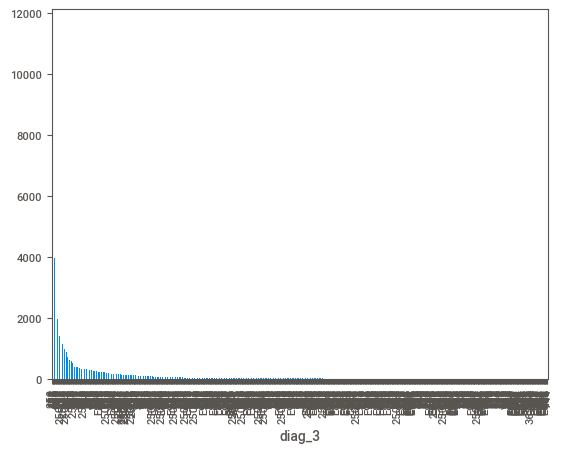

['N', '>300', 'Norm', '>200']
Categories (4, object): ['>200', '>300', 'N', 'Norm']
max_glu_serum
N       96420
Norm     2597
>200     1485
>300     1264
Name: count, dtype: int64


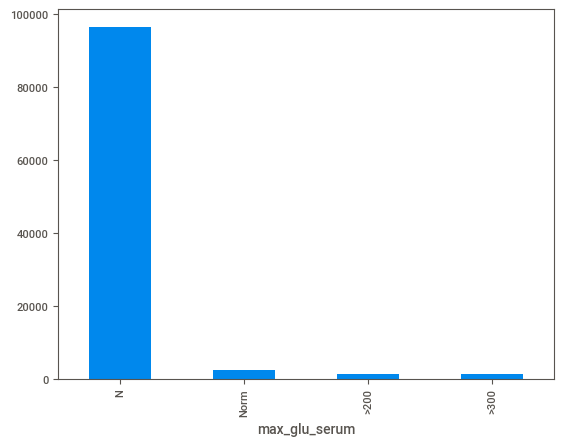

['N', '>7', '>8', 'Norm']
Categories (4, object): ['>7', '>8', 'N', 'Norm']
A1Cresult
N       84748
>8       8216
Norm     4990
>7       3812
Name: count, dtype: int64


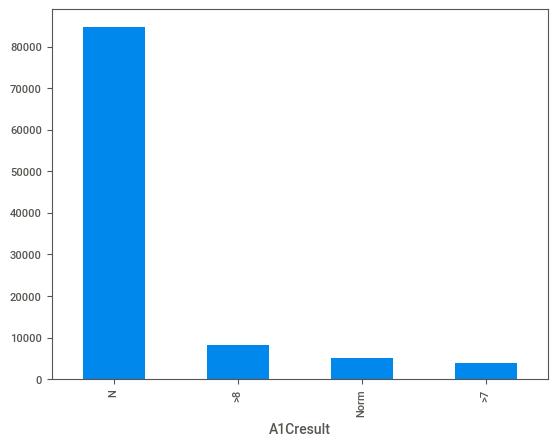

['No', 'Steady', 'Up', 'Down']
Categories (4, object): ['Down', 'No', 'Steady', 'Up']
metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64


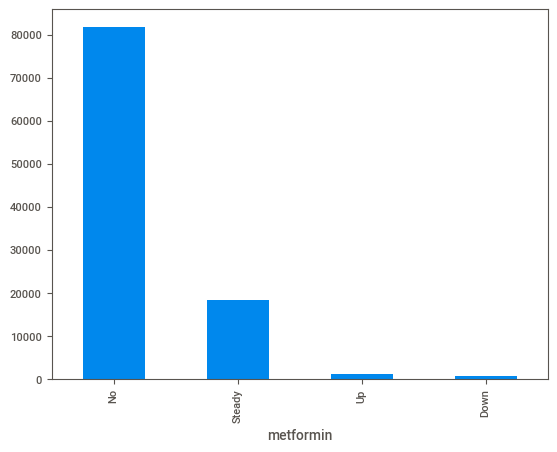

['No', 'Up', 'Steady', 'Down']
Categories (4, object): ['Down', 'No', 'Steady', 'Up']
repaglinide
No        100227
Steady      1384
Up           110
Down          45
Name: count, dtype: int64


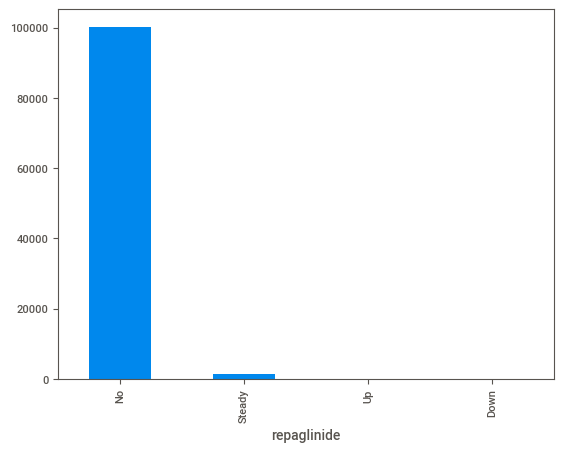

['No', 'Steady', 'Down', 'Up']
Categories (4, object): ['Down', 'No', 'Steady', 'Up']
nateglinide
No        101063
Steady       668
Up            24
Down          11
Name: count, dtype: int64


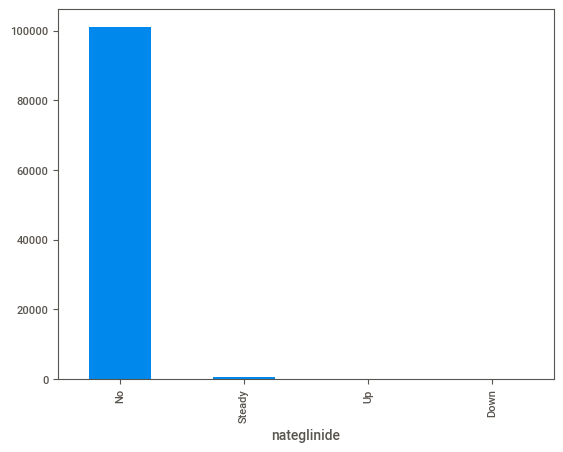

['No', 'Steady', 'Down', 'Up']
Categories (4, object): ['Down', 'No', 'Steady', 'Up']
chlorpropamide
No        101680
Steady        79
Up             6
Down           1
Name: count, dtype: int64


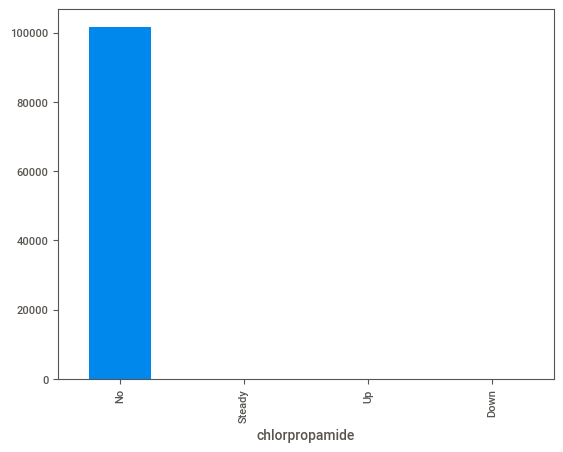

['No', 'Steady', 'Down', 'Up']
Categories (4, object): ['Down', 'No', 'Steady', 'Up']
glimepiride
No        96575
Steady     4670
Up          327
Down        194
Name: count, dtype: int64


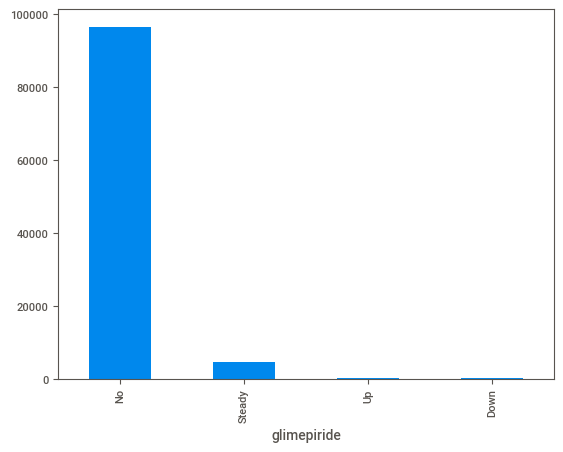

['No', 'Steady']
Categories (2, object): ['No', 'Steady']
acetohexamide
No        101765
Steady         1
Name: count, dtype: int64


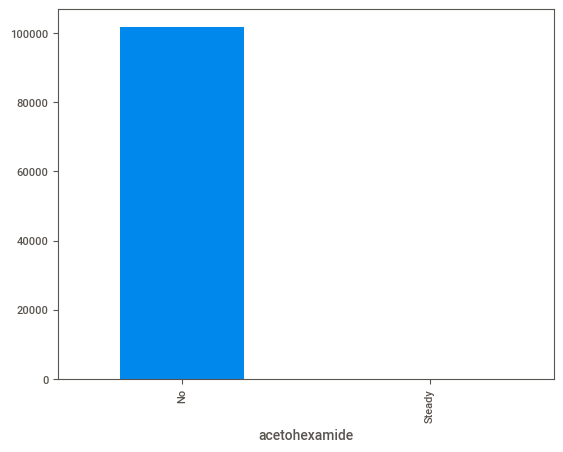

['No', 'Steady', 'Up', 'Down']
Categories (4, object): ['Down', 'No', 'Steady', 'Up']
glipizide
No        89080
Steady    11356
Up          770
Down        560
Name: count, dtype: int64


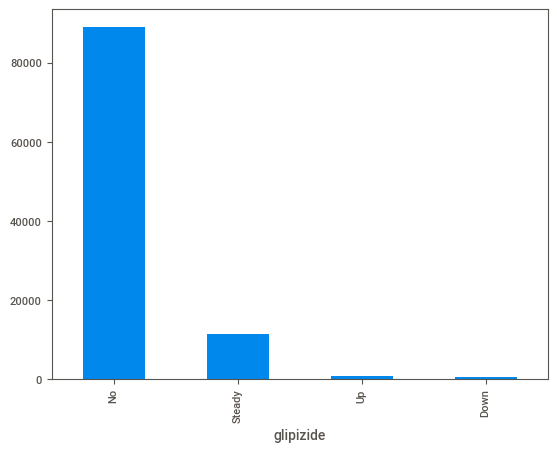

['No', 'Steady', 'Up', 'Down']
Categories (4, object): ['Down', 'No', 'Steady', 'Up']
glyburide
No        91116
Steady     9274
Up          812
Down        564
Name: count, dtype: int64


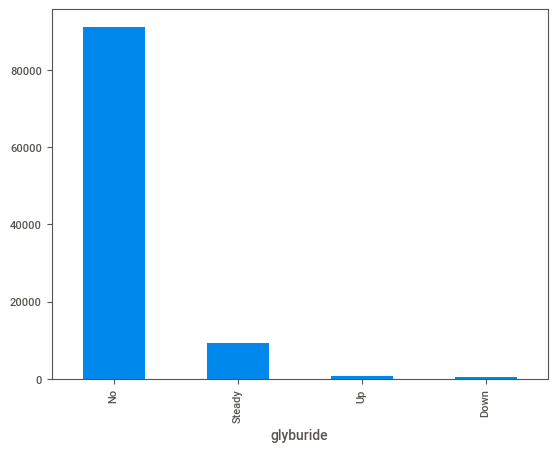

['No', 'Steady']
Categories (2, object): ['No', 'Steady']
tolbutamide
No        101743
Steady        23
Name: count, dtype: int64


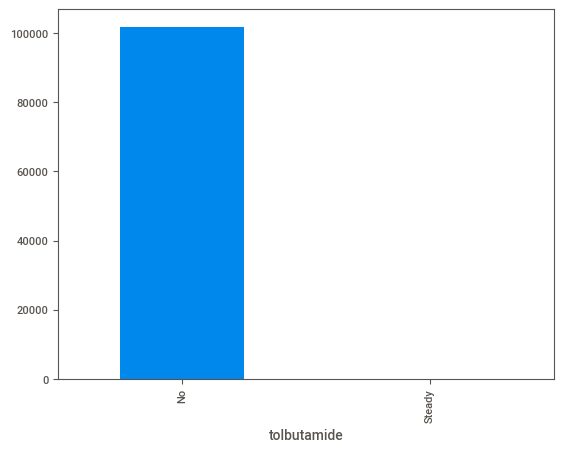

['No', 'Steady', 'Up', 'Down']
Categories (4, object): ['Down', 'No', 'Steady', 'Up']
pioglitazone
No        94438
Steady     6976
Up          234
Down        118
Name: count, dtype: int64


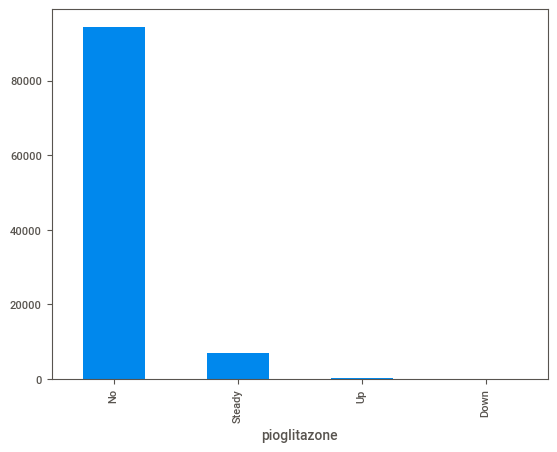

['No', 'Steady', 'Up', 'Down']
Categories (4, object): ['Down', 'No', 'Steady', 'Up']
rosiglitazone
No        95401
Steady     6100
Up          178
Down         87
Name: count, dtype: int64


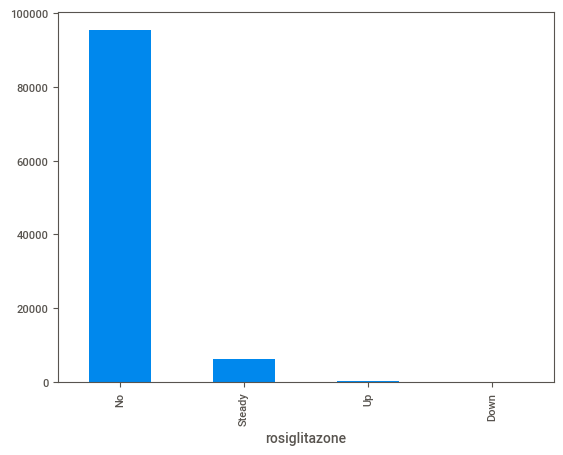

['No', 'Steady', 'Up', 'Down']
Categories (4, object): ['Down', 'No', 'Steady', 'Up']
acarbose
No        101458
Steady       295
Up            10
Down           3
Name: count, dtype: int64


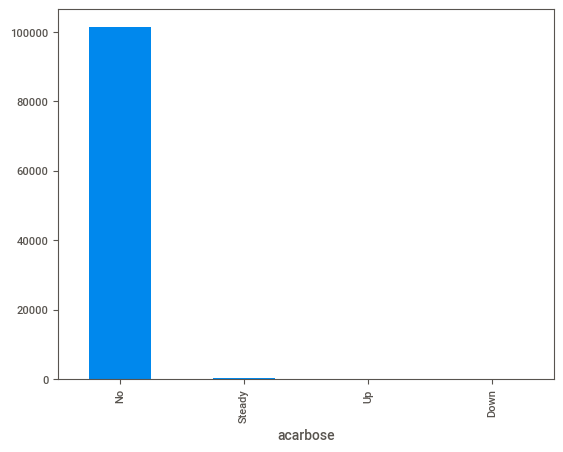

['No', 'Steady', 'Down', 'Up']
Categories (4, object): ['Down', 'No', 'Steady', 'Up']
miglitol
No        101728
Steady        31
Down           5
Up             2
Name: count, dtype: int64


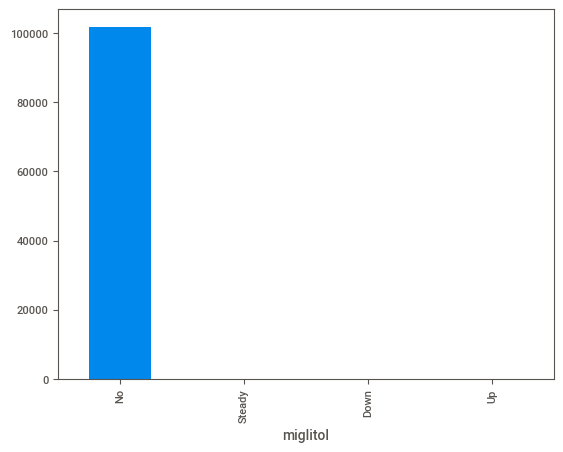

['No', 'Steady']
Categories (2, object): ['No', 'Steady']
troglitazone
No        101763
Steady         3
Name: count, dtype: int64


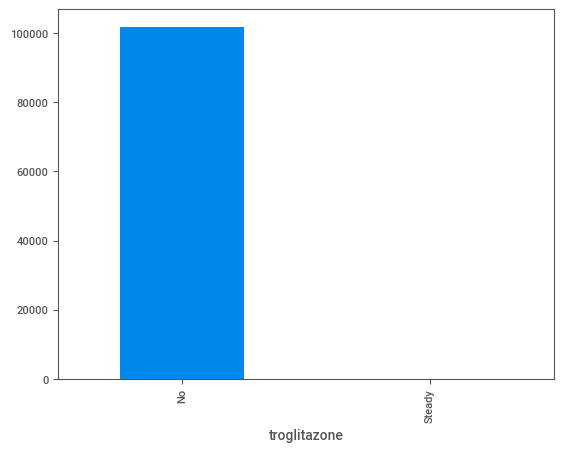

['No', 'Steady', 'Up']
Categories (3, object): ['No', 'Steady', 'Up']
tolazamide
No        101727
Steady        38
Up             1
Name: count, dtype: int64


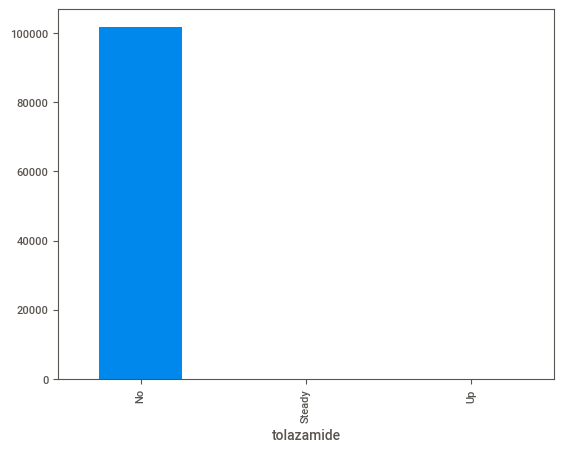

['No']
Categories (1, object): ['No']
examide
No    101766
Name: count, dtype: int64


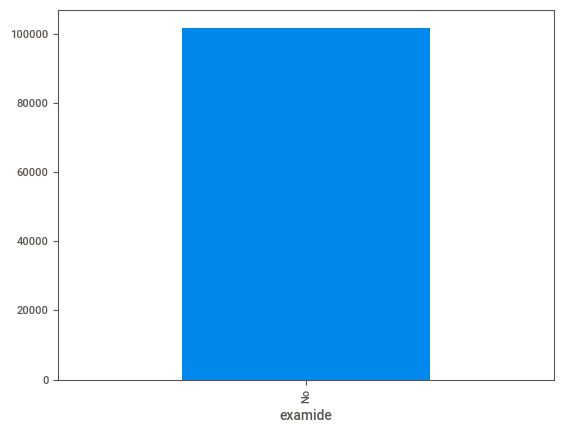

['No']
Categories (1, object): ['No']
citoglipton
No    101766
Name: count, dtype: int64


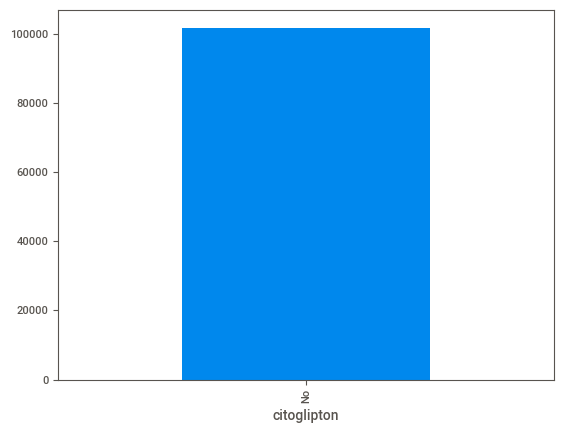

['No', 'Up', 'Steady', 'Down']
Categories (4, object): ['Down', 'No', 'Steady', 'Up']
insulin
No        47383
Steady    30849
Down      12218
Up        11316
Name: count, dtype: int64


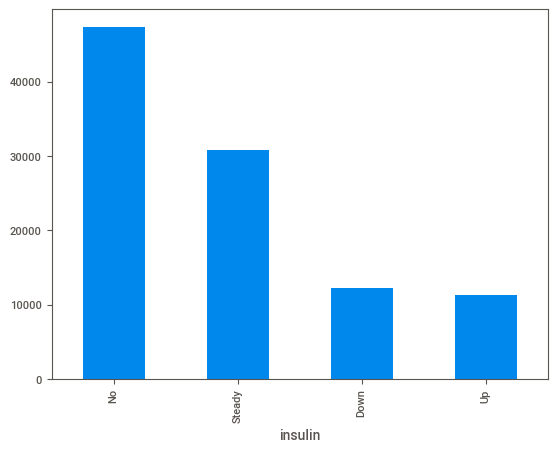

['No', 'Steady', 'Down', 'Up']
Categories (4, object): ['Down', 'No', 'Steady', 'Up']
glyburide-metformin
No        101060
Steady       692
Up             8
Down           6
Name: count, dtype: int64


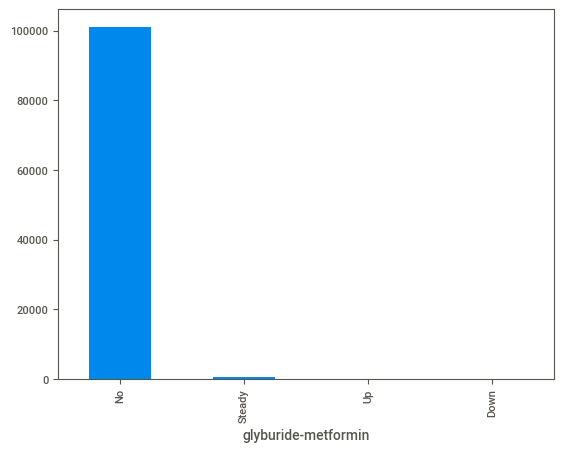

['No', 'Steady']
Categories (2, object): ['No', 'Steady']
glipizide-metformin
No        101753
Steady        13
Name: count, dtype: int64


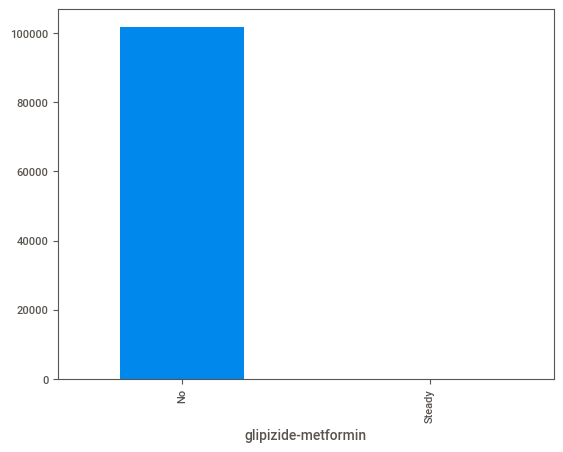

['No', 'Steady']
Categories (2, object): ['No', 'Steady']
glimepiride-pioglitazone
No        101765
Steady         1
Name: count, dtype: int64


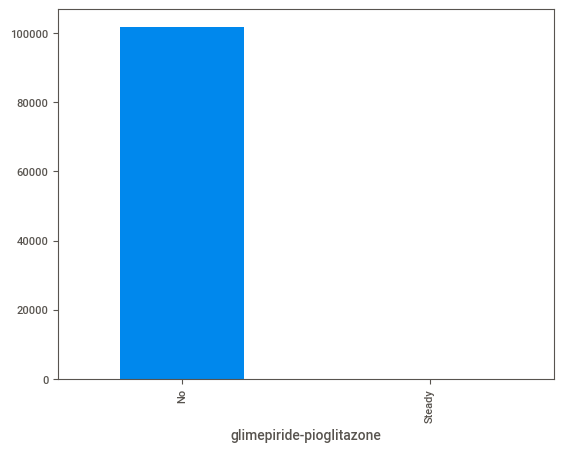

['No', 'Steady']
Categories (2, object): ['No', 'Steady']
metformin-rosiglitazone
No        101764
Steady         2
Name: count, dtype: int64


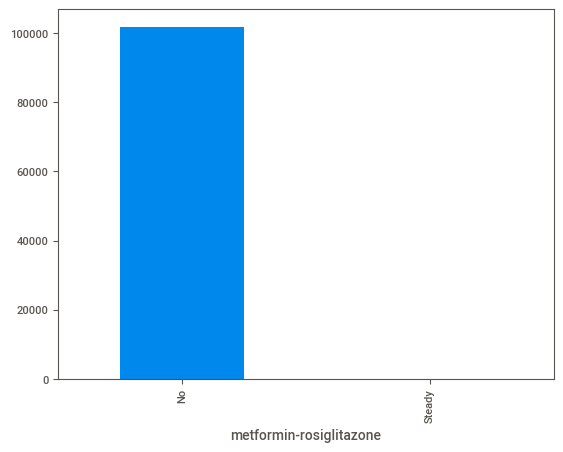

['No', 'Steady']
Categories (2, object): ['No', 'Steady']
metformin-pioglitazone
No        101765
Steady         1
Name: count, dtype: int64


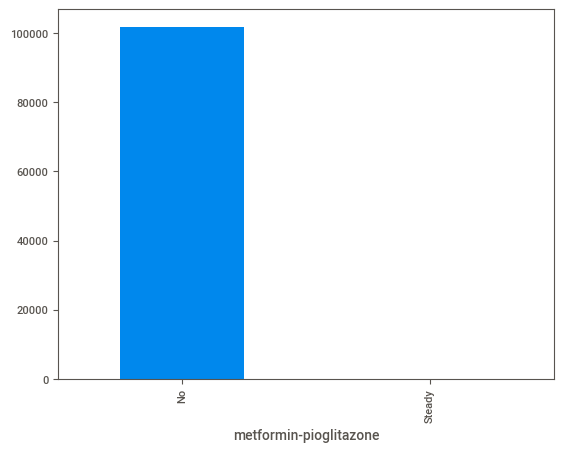

['No', 'Ch']
Categories (2, object): ['Ch', 'No']
change
No    54755
Ch    47011
Name: count, dtype: int64


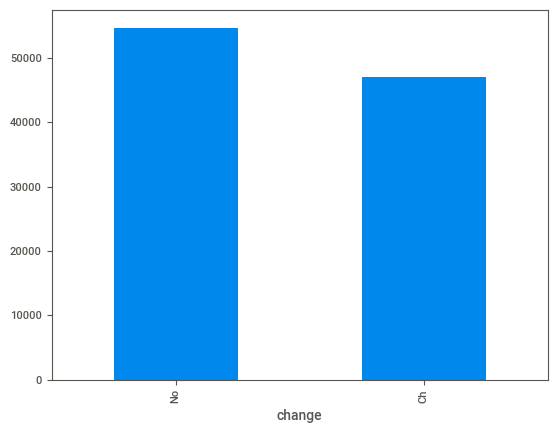

['No', 'Yes']
Categories (2, object): ['No', 'Yes']
diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64


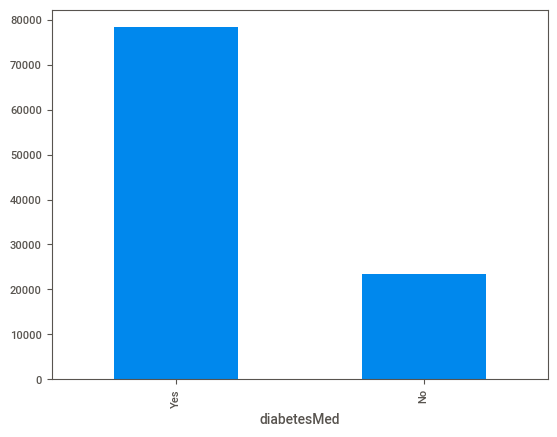

['NO', '>30', '<30']
Categories (3, object): ['<30', '>30', 'NO']
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


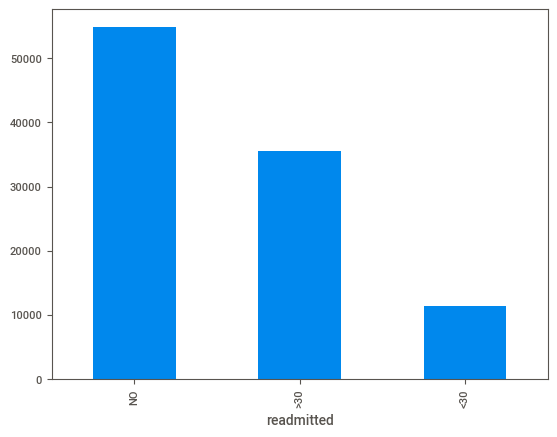

In [24]:


from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Select object columns
object_columns = df_new.select_dtypes(include='object').columns

# Create DataFrame of object columns
df_object_columns = pd.DataFrame(object_columns, columns=['object columns'])

# Convert all to categorical and print unique values, value counts, and bar chart
for col in object_columns:
    df_new[col] = df_new[col].astype('category')
    print(df_new[col].unique())
    print(df_new[col].value_counts())
    df_new[col].value_counts().plot(kind='bar')
    plt.show()

# Initialize LabelEncoder
labelencoder = LabelEncoder()

df_new[col] = labelencoder.fit_transform(df_new[col])
# pd.DataFrame(df_new.select_dtypes(include='object').columns, columns=['object columns'])
# # bar chart of unique values for object columns 
# object_columns = df_new.select_dtypes(include='object').columns
# # convert all to categorical 
# for col in object_columns:
#     df_new[col] = df_new[col].astype('category')
#     print(df[col].unique())
#     print(df[col].value_counts())
#     print(df[col].value_counts().plot(kind='bar'))
#     plt.show()
# # Impute race with the mode value 
# from sklearn.label import LabelEncoder
# from sklearn.feature_extraction
# labelencoder = LabelEncoder()


In [25]:
from sklearn.preprocessing import StandardScaler

# Select int64 columns
int_columns = df_new.select_dtypes(include='int64').columns

# Initialize StandardScaler
scaler = StandardScaler()

# Normalize int64 columns
for col in int_columns:
    df_new[col] = scaler.fit_transform(df_new[[col]])


In [26]:

df_new.dtypes

encounter_id                 float64
patient_nbr                  float64
race                        category
gender                      category
age                         category
admission_type_id            float64
discharge_disposition_id     float64
admission_source_id          float64
time_in_hospital             float64
payer_code                  category
medical_specialty           category
num_lab_procedures           float64
num_procedures               float64
num_medications              float64
number_outpatient            float64
number_emergency             float64
number_inpatient             float64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses             float64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
g

In [67]:
df_new.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  float64 
 1   patient_nbr               101766 non-null  float64 
 2   race                      101766 non-null  category
 3   gender                    101766 non-null  category
 4   age                       101766 non-null  category
 5   admission_type_id         101766 non-null  float64 
 6   discharge_disposition_id  101766 non-null  float64 
 7   admission_source_id       101766 non-null  float64 
 8   time_in_hospital          101766 non-null  float64 
 9   payer_code                101766 non-null  category
 10  medical_specialty         101766 non-null  category
 11  num_lab_procedures        101766 non-null  float64 
 12  num_procedures            101766 non-null  float64 
 13  num_medications           101

In [50]:
# describe the columns
df_new.select_dtypes(include='float64').describe()


encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05       1.017660e+05   
mean  -5.362271e-17 -5.809126e-17      -1.072454e-16   
std    1.000005e+00  1.000005e+00       1.000005e+00   
min   -1.609406e+00 -1.404022e+00      -7.084607e-01   
25%   -7.817675e-01 -7.989726e-01      -7.084607e-01   
50%   -1.248313e-01 -2.280654e-01      -7.084607e-01   
75%    6.339573e-01  8.583679e-01       6.752434e-01   
max    2.714986e+00  3.493168e+00       4.134504e+00   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count              1.017660e+05         1.017660e+05      1.017660e+05   
mean              -2.234279e-18         7.373122e-17      5.082986e-17   
std                1.000005e+00         1.000005e+00      1.000005e+00   
min               -5.143125e-01        -1.169873e+00     -1.137649e+00   
25%               -5.143125e-01        -1.169873e+00     -8.026506e-01   
50%               -5.143125e-01         3.064825e-01     -1.326548e-01   
75%                5.385430e-02         3.064825e-01      5.373411e-01   
max                4.599189e+00         4.735550e+00      3.217324e+00   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count        1.017660e+05    1.017660e+05     1.017660e+05       1.017660e+05   
mean         1.111554e-16   -1.717602e-17    -1.323811e-16       2.010851e-17   
std          1.000005e+00    1.000005e+00     1.000005e+00       1.000005e+00   
min         -2.139630e+00   -7.853977e-01    -1.848268e+00      -2.914615e-01   
25%         -6.147950e-01   -7.853977e-01    -7.409197e-01      -2.914615e-01   
50%          4.596660e-02   -1.991621e-01    -1.257264e-01      -2.914615e-01   
75%          7.067282e-01    3.870736e-01     4.894670e-01      -2.914615e-01   
max          4.518815e+00    2.732016e+00     7.994826e+00       3.285094e+01   

       number_emergency  number_inpatient  number_diagnoses  
count      1.017660e+05      1.017660e+05      1.017660e+05  
mean       3.044206e-17     -2.115583e-17      1.988509e-16  
std        1.000005e+00      1.000005e+00      1.000005e+00  
min       -2.126202e-01     -5.032762e-01     -3.321596e+00  
25%       -2.126202e-01     -5.032762e-01     -7.357332e-01  
50%       -2.126202e-01     -5.032762e-01      2.986119e-01  
75%       -2.126202e-01      2.885790e-01      8.157845e-01  
max        8.146673e+01      1.612568e+01      4.435992e+00

encounter_id              encounter_id                1.000000
patient_nbr               encounter_id                0.512028
time_in_hospital          num_medications             0.466135
num_medications           num_procedures              0.385767
num_lab_procedures        time_in_hospital            0.318450
                          num_medications             0.268161
number_inpatient          number_emergency            0.266559
number_diagnoses          encounter_id                0.265149
num_medications           number_diagnoses            0.261526
number_diagnoses          patient_nbr                 0.226847
                          time_in_hospital            0.220186
time_in_hospital          num_procedures              0.191472
                          discharge_disposition_id    0.162748
number_diagnoses          num_lab_procedures          0.152773
admission_type_id         num_procedures              0.129888
num_medications           discharge_disposition_id    0

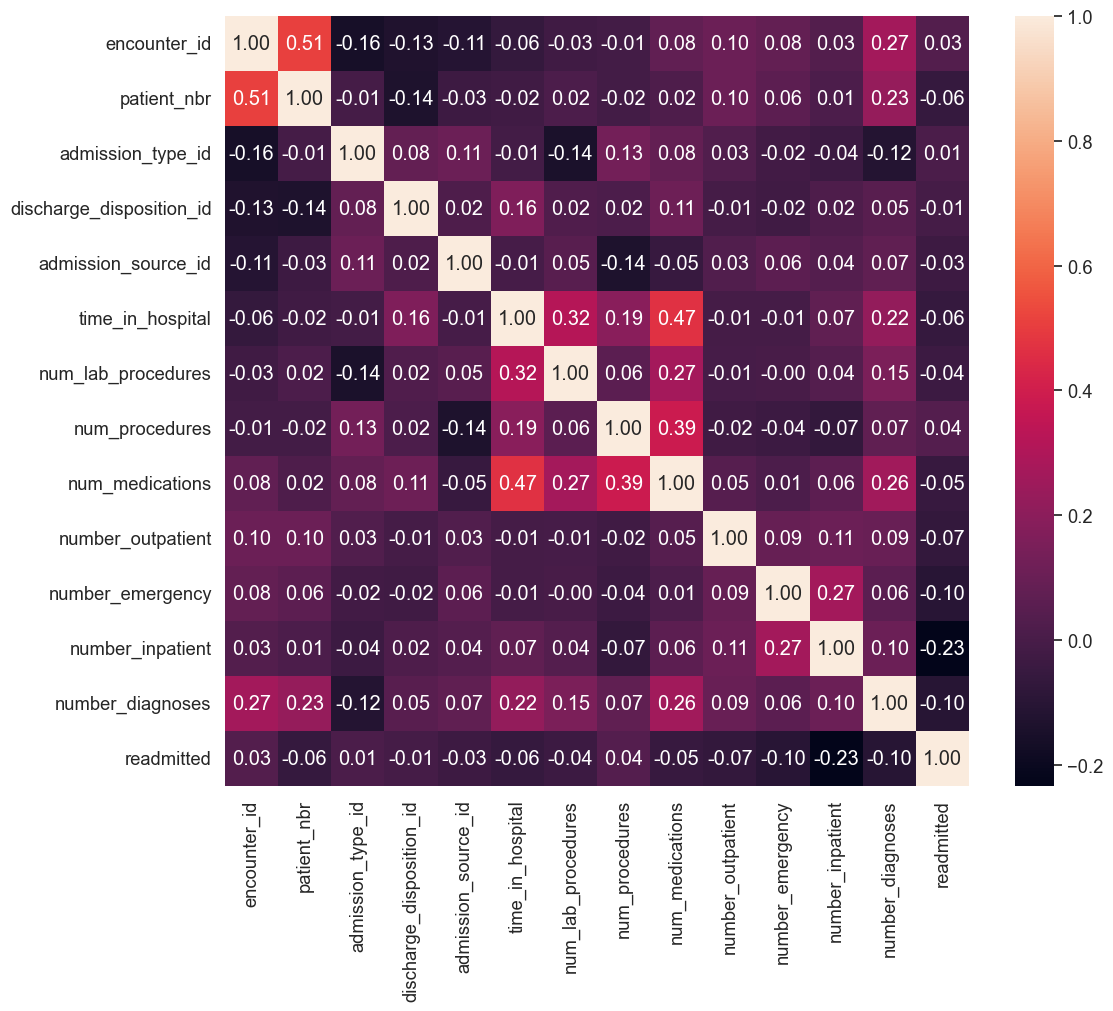

In [27]:
# create correlation matrix using seaborn and matplotlib
import seaborn 
import matplotlib.pyplot as plt
# get the correlation of the columns

sns.set(font_scale=1.2)
plt.figure(figsize=(12, 10))

sns.heatmap(df_new.select_dtypes(include='float64').corr(), annot=True, fmt=".2f")
# pateint_nbr 0.51 correlation with encounter_id, is the highest correlation value
# get the highest correlation value
print(df_new.select_dtypes(include='float64').corr().unstack().sort_values(ascending=False).drop_duplicates())


In [56]:
analzye = sv.analyze(df_new)


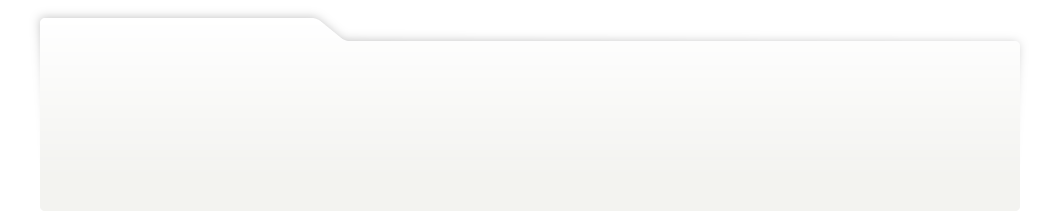
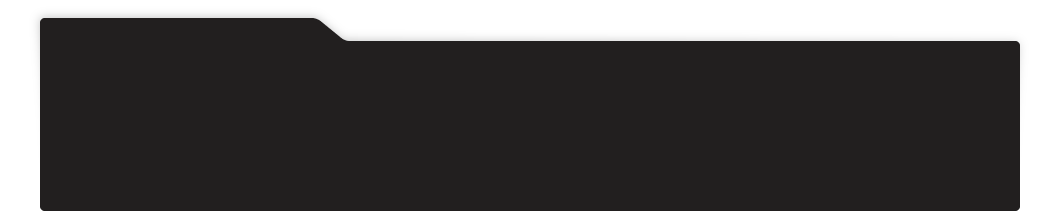
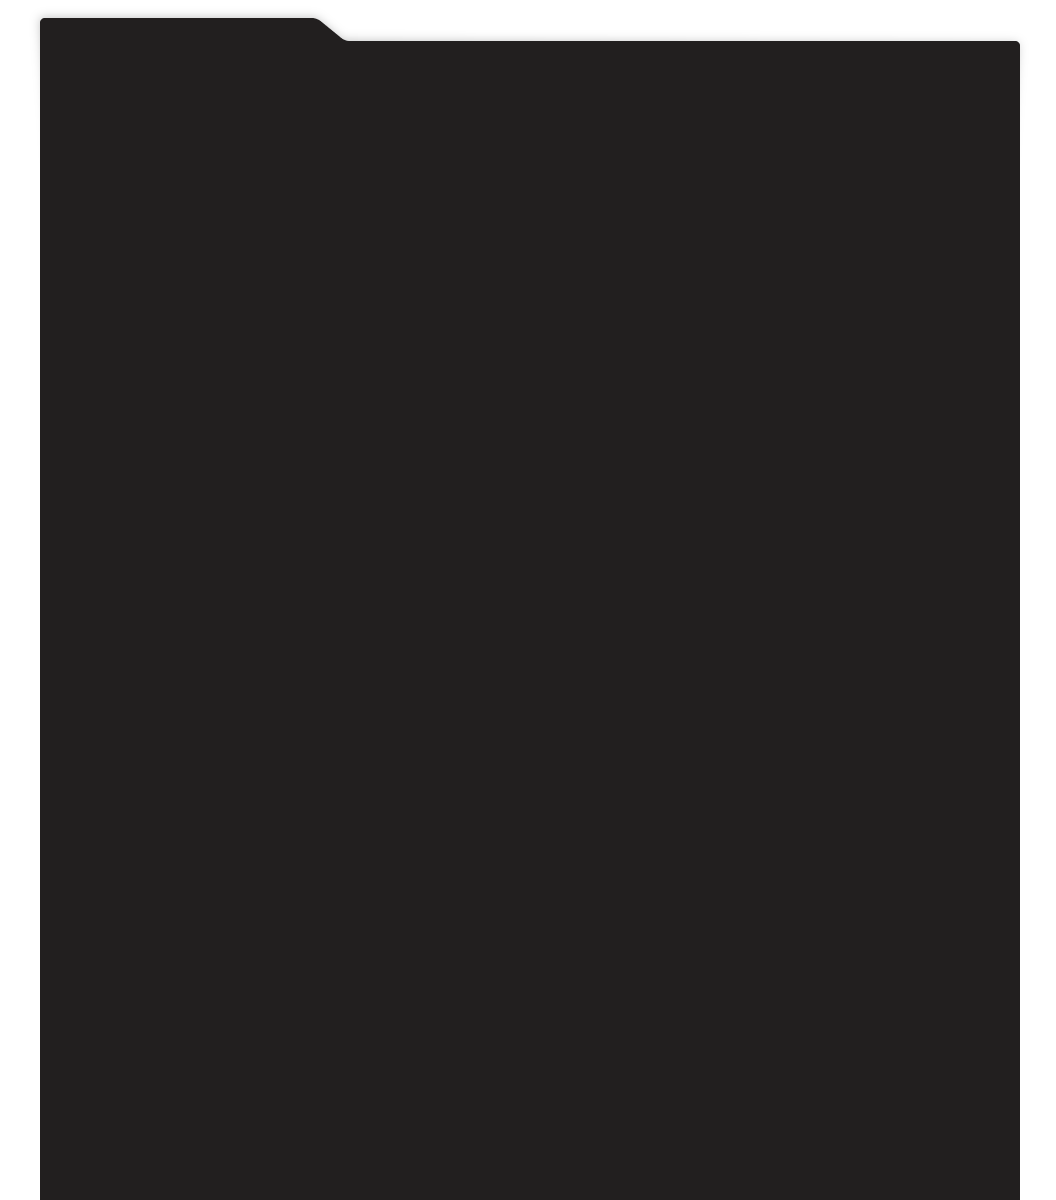
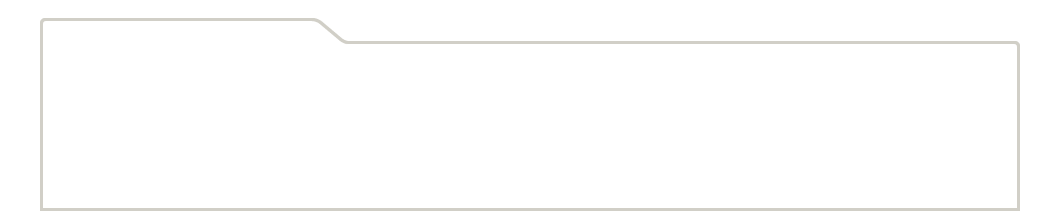
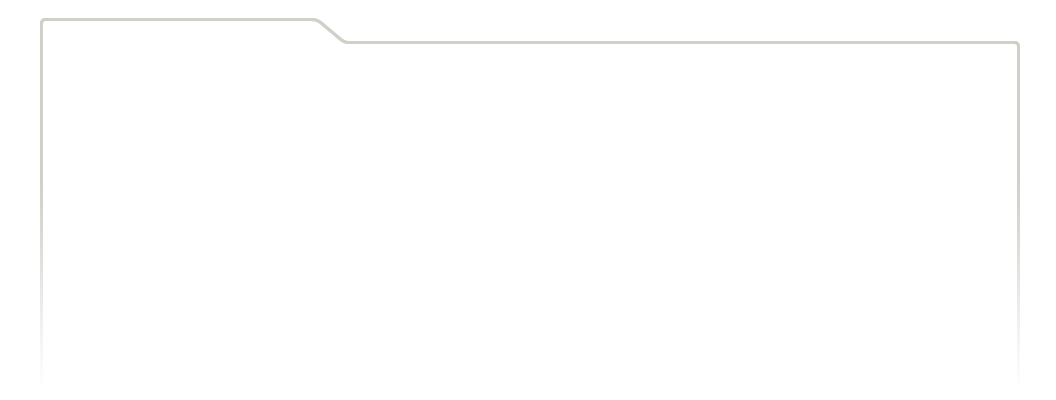
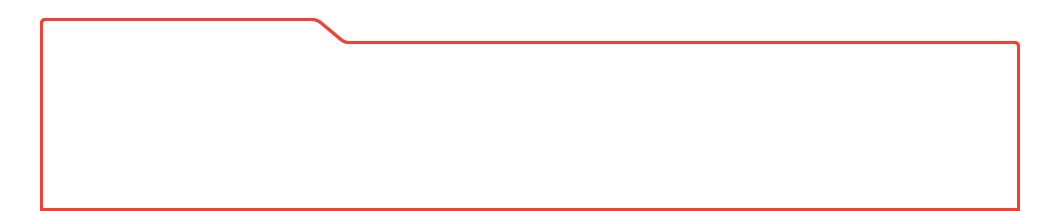
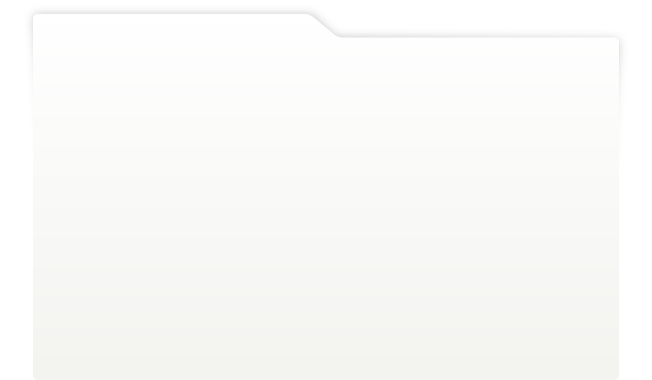
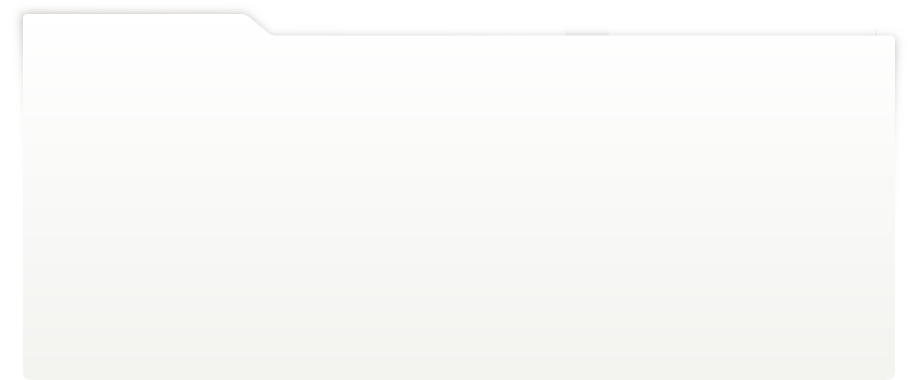
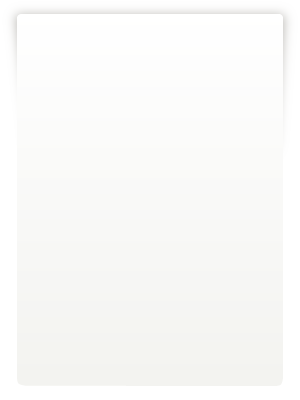
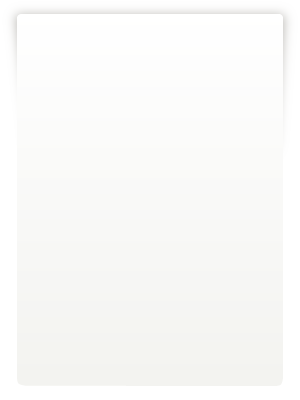
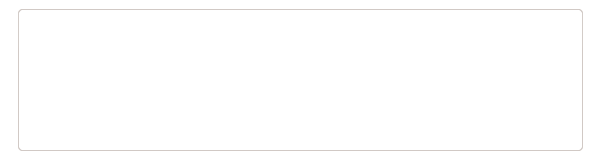
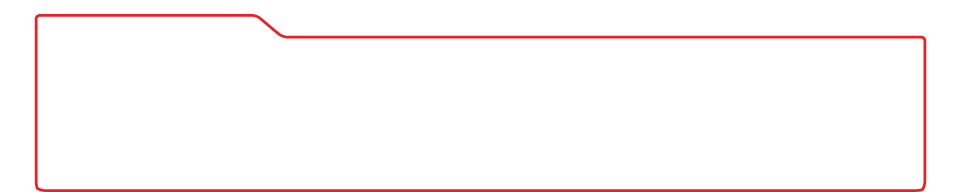
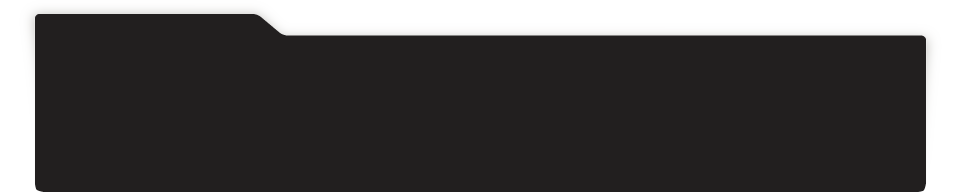
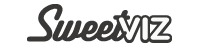
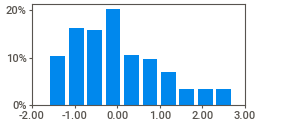
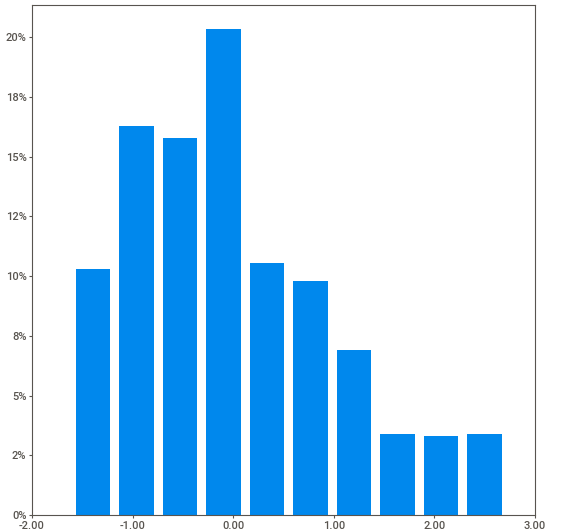
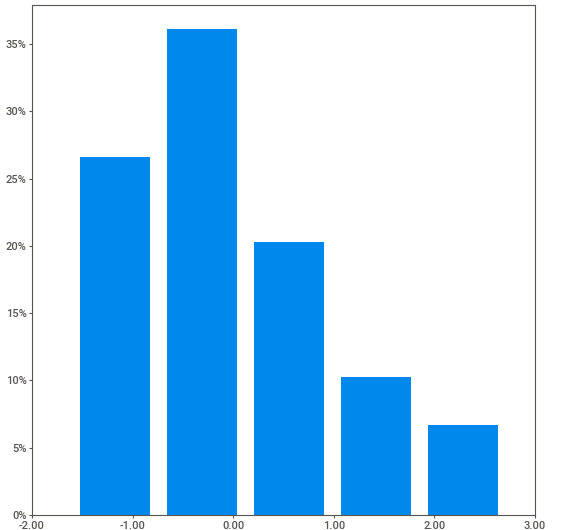
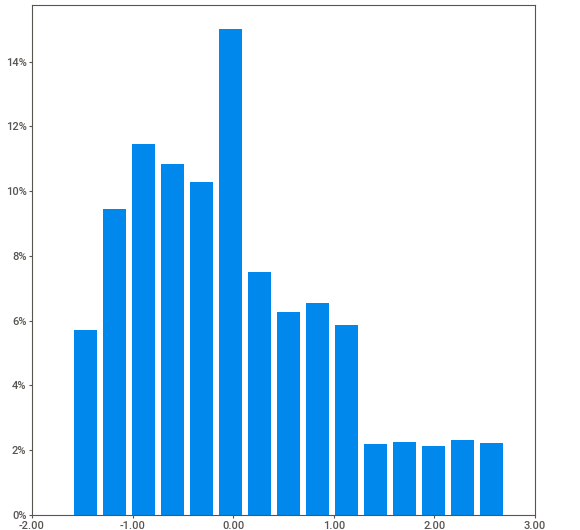
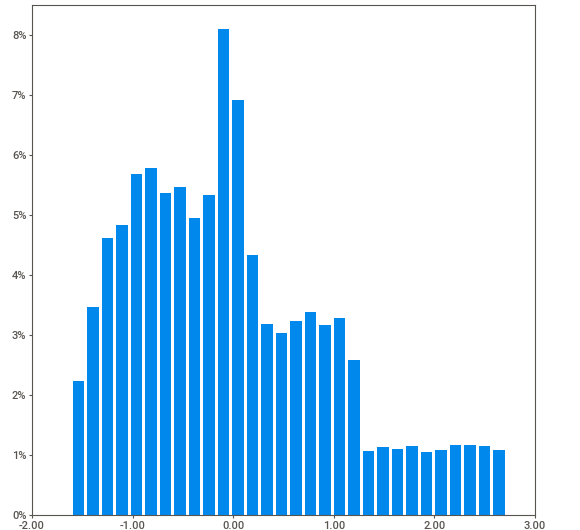
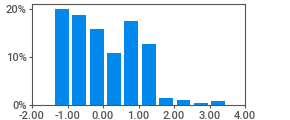
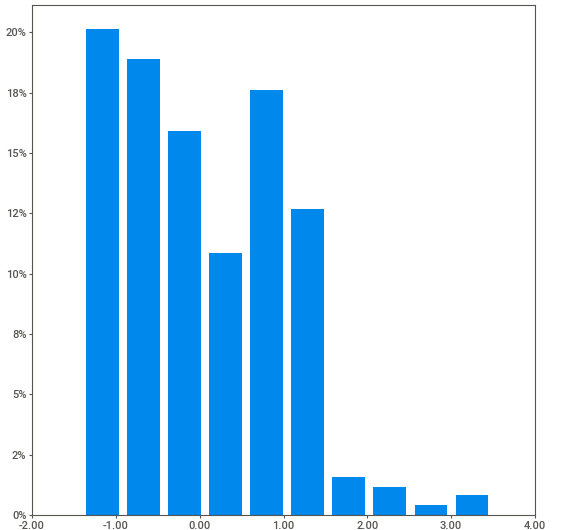
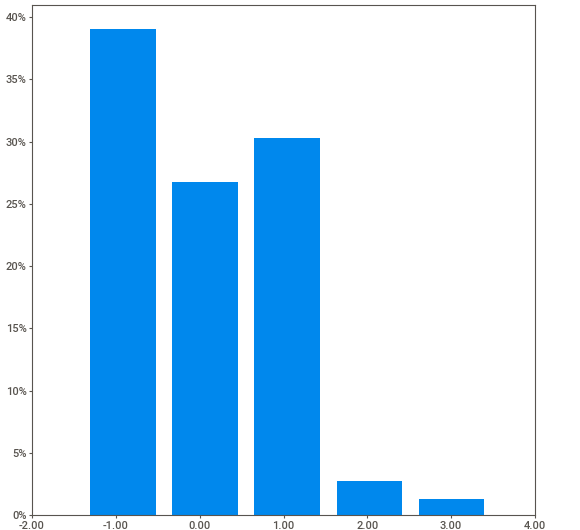
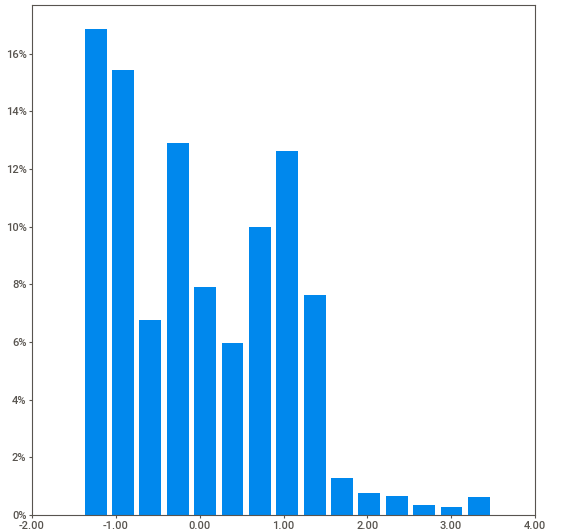
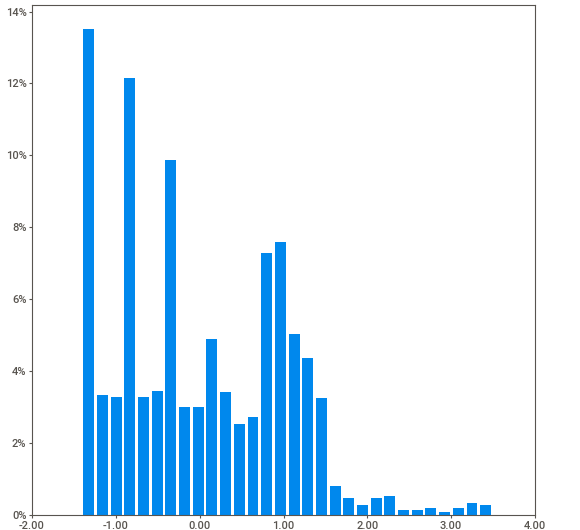
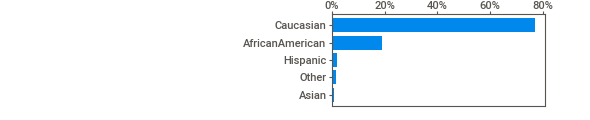
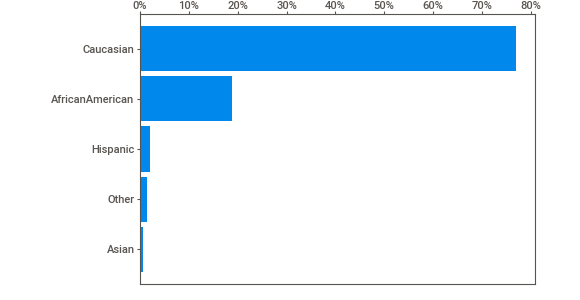
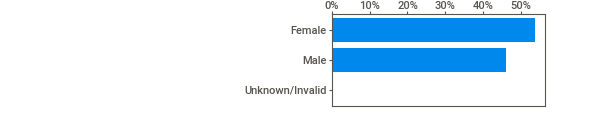
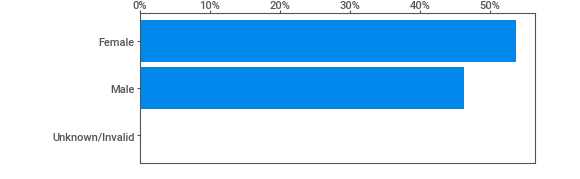
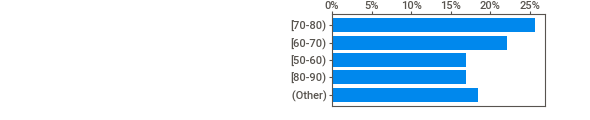
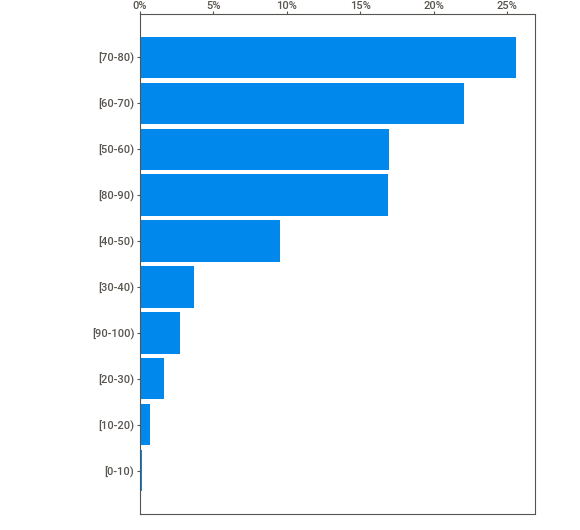
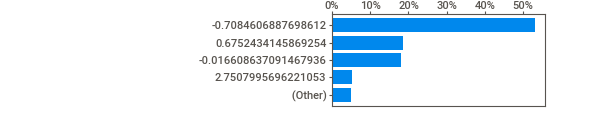
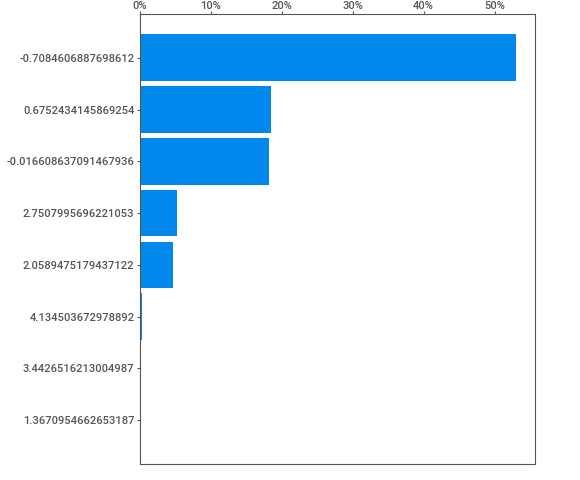
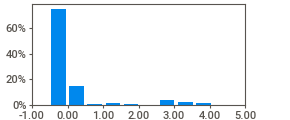
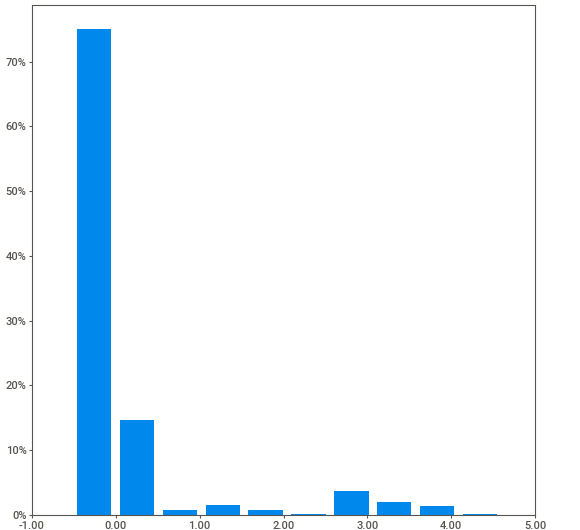
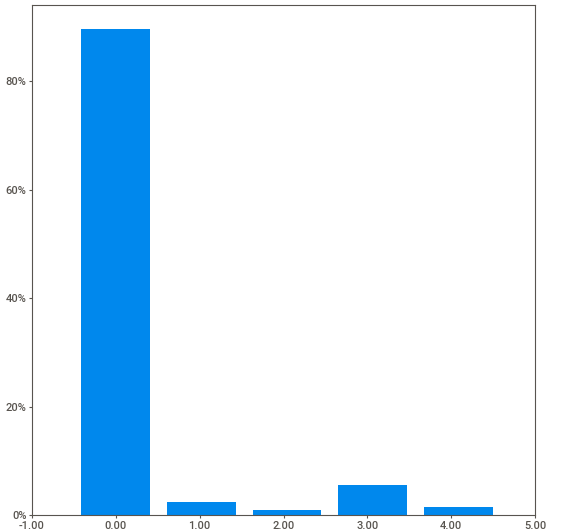
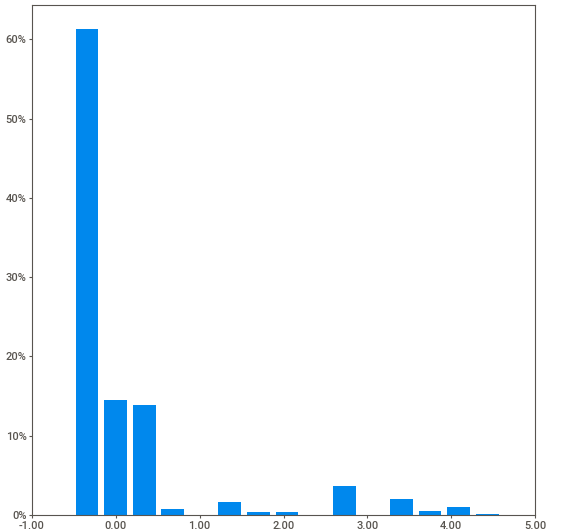
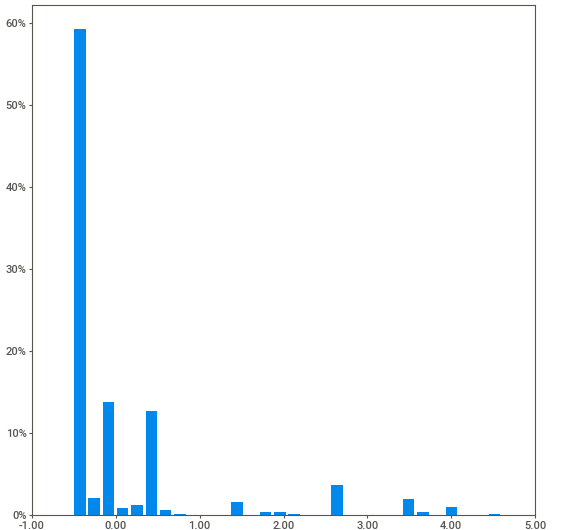
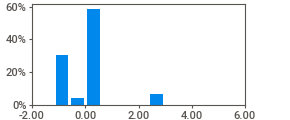
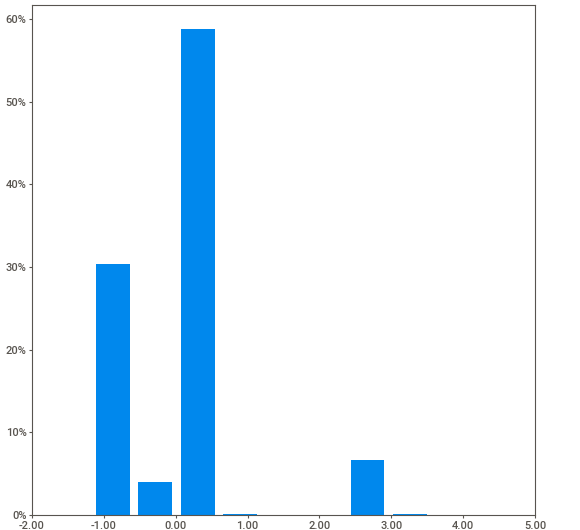
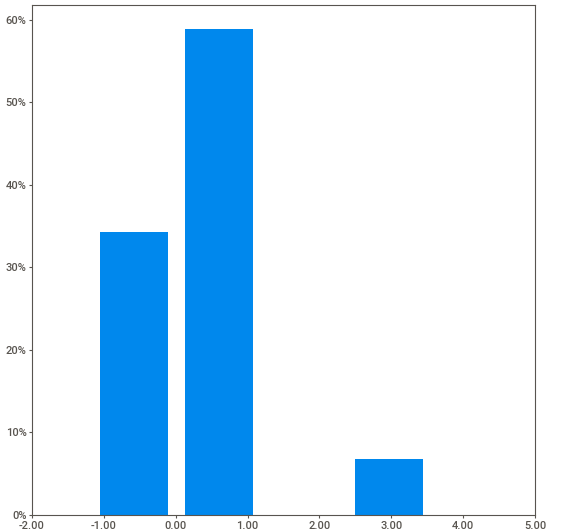
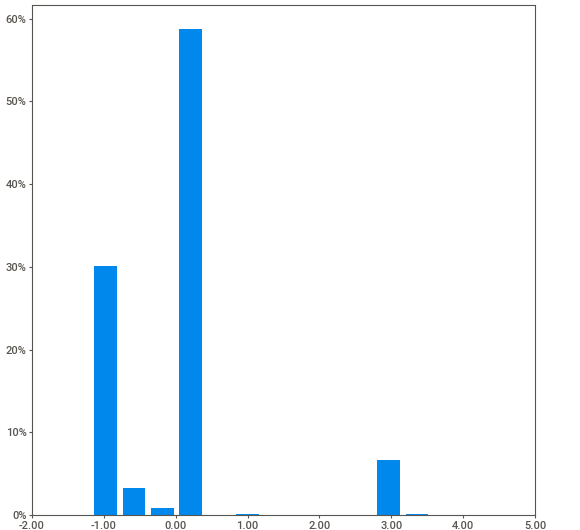
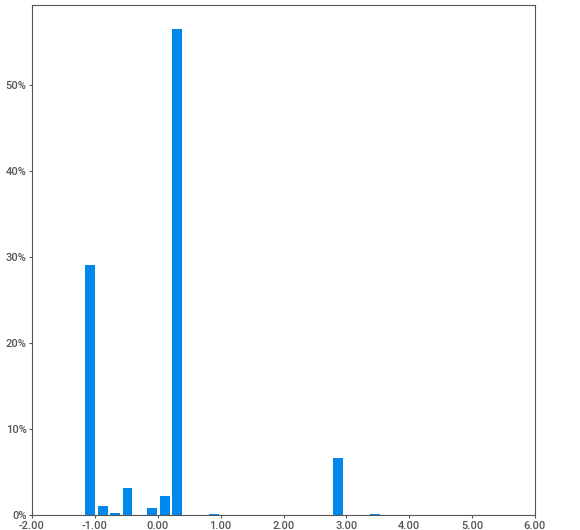
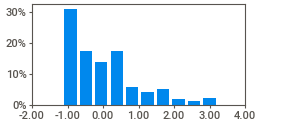
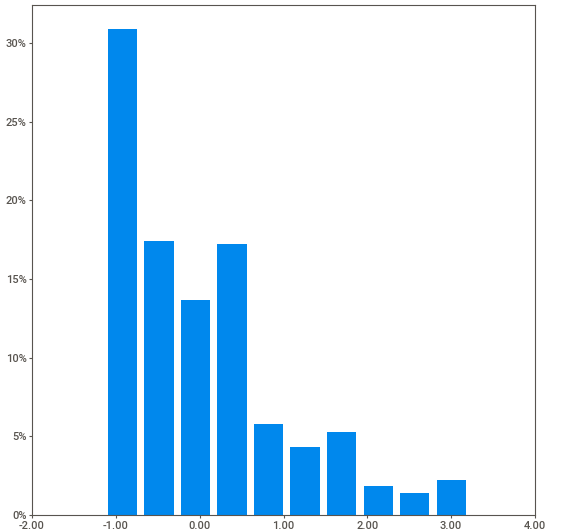
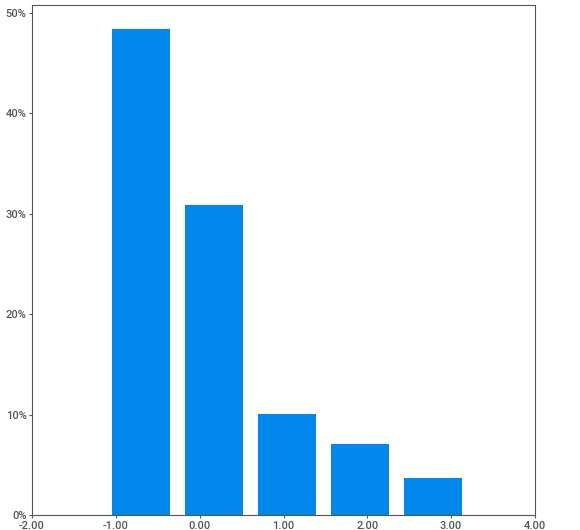
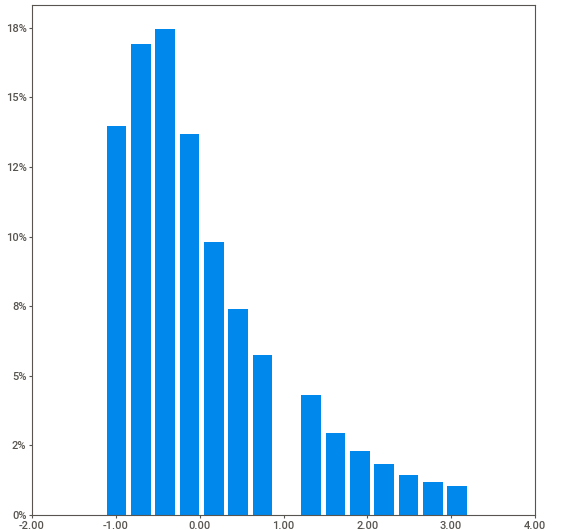
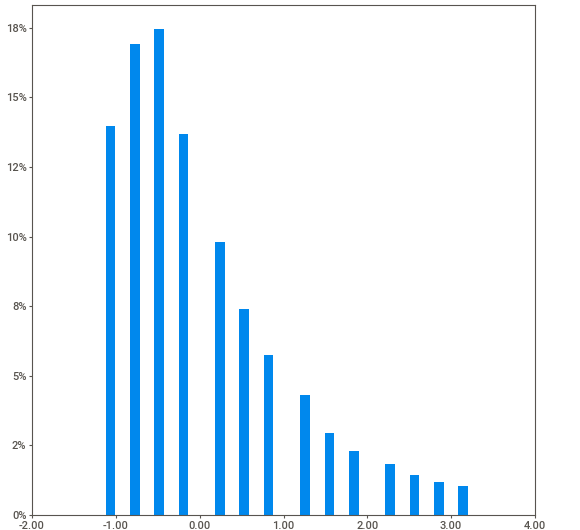
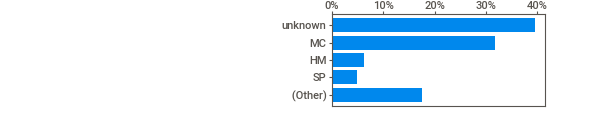
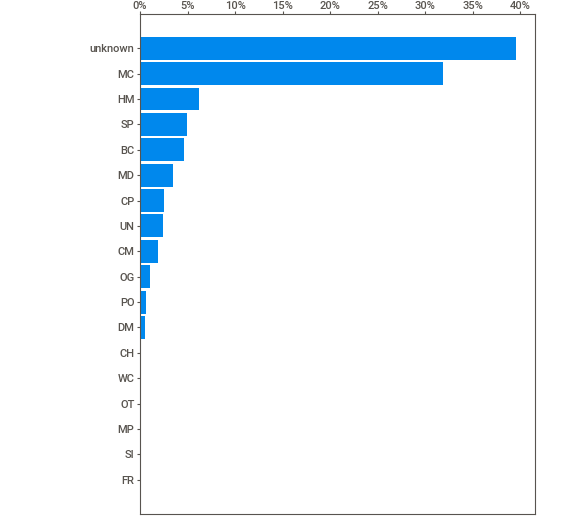
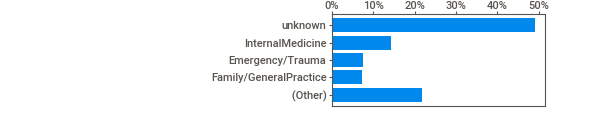
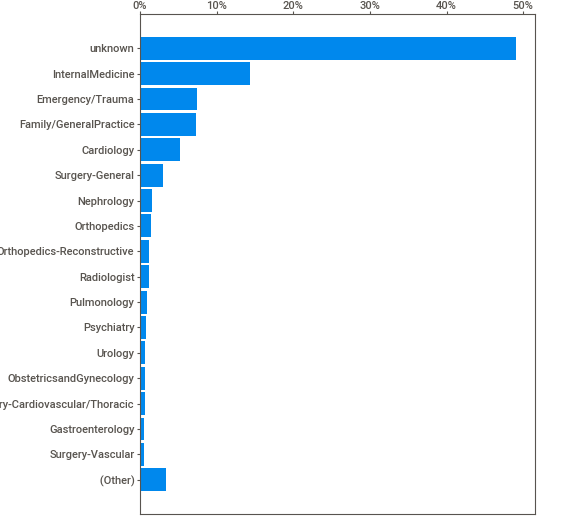
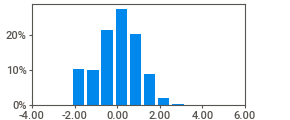
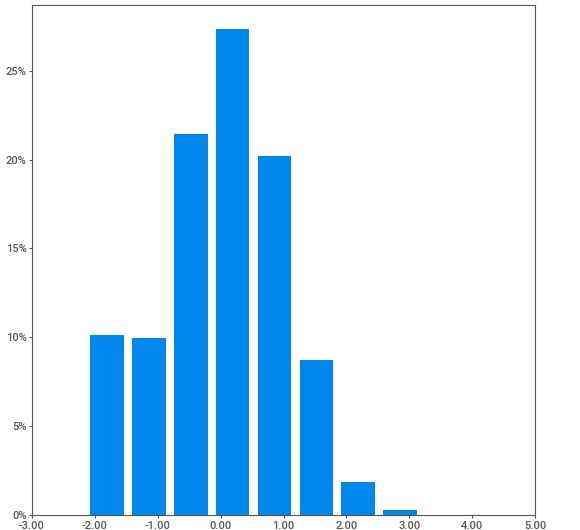
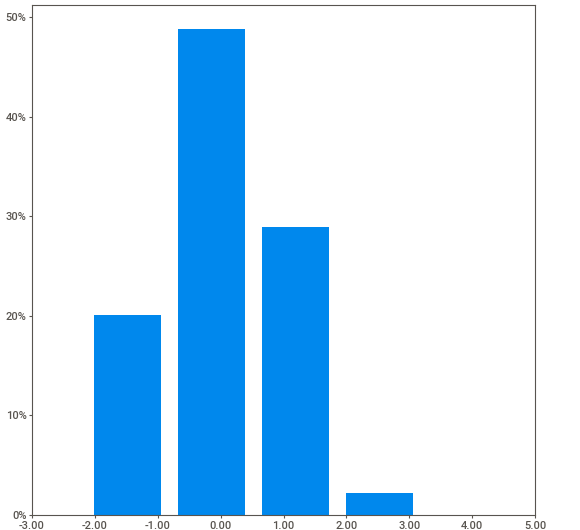
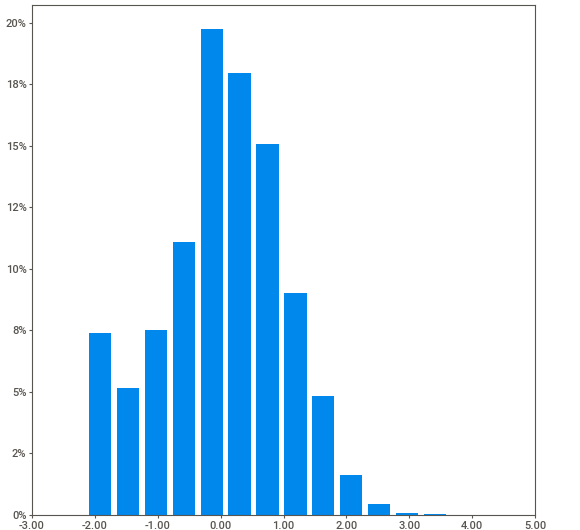
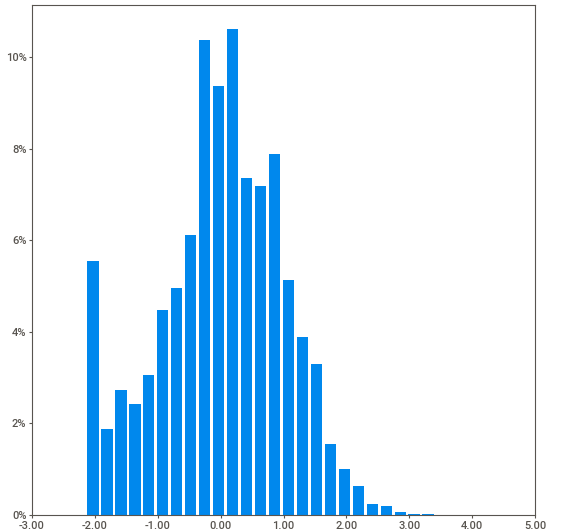
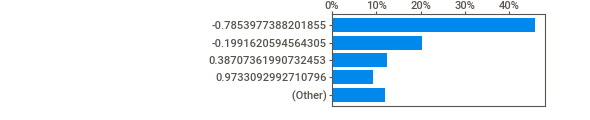
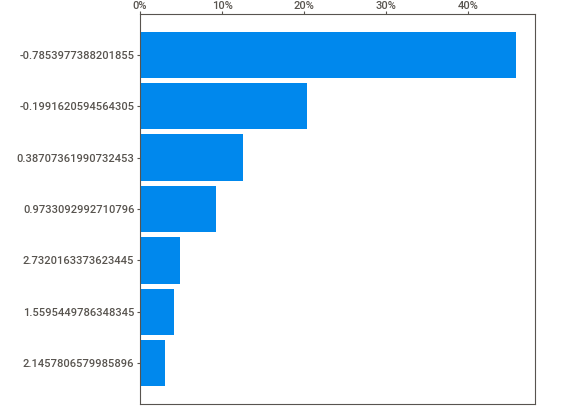
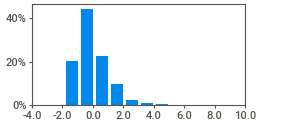
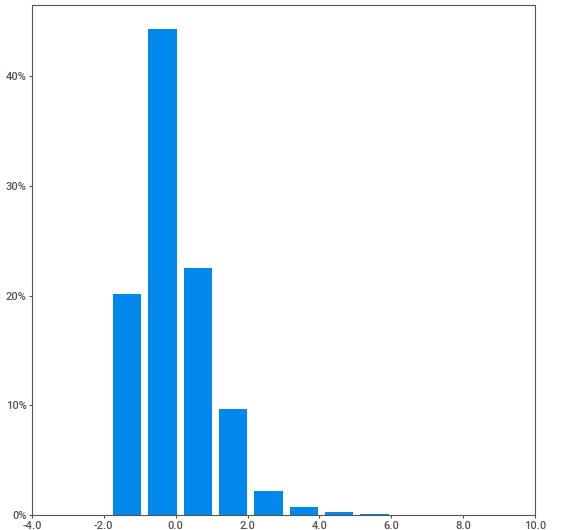
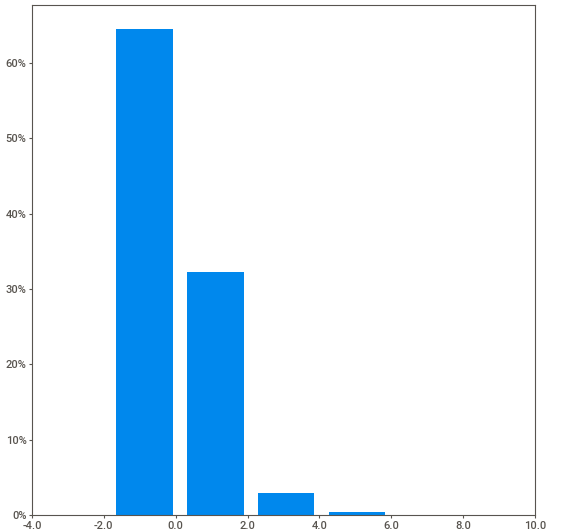
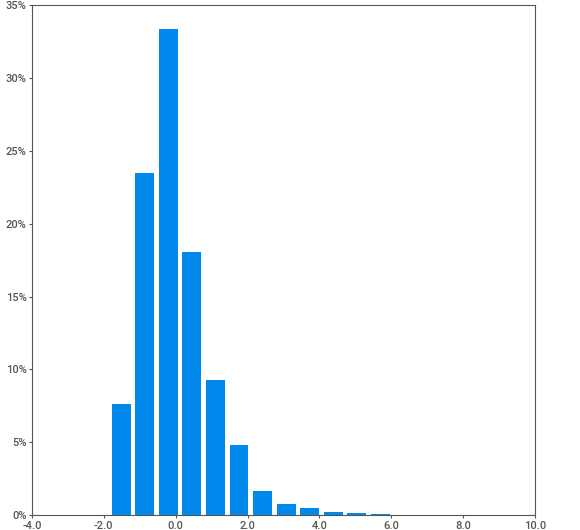
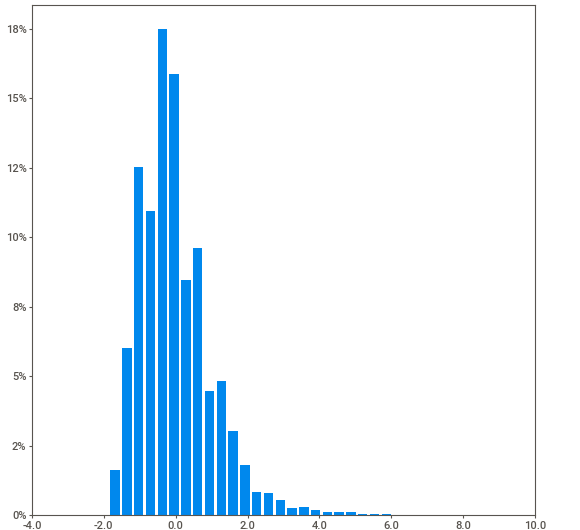
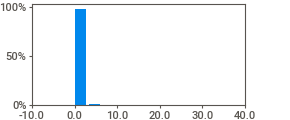
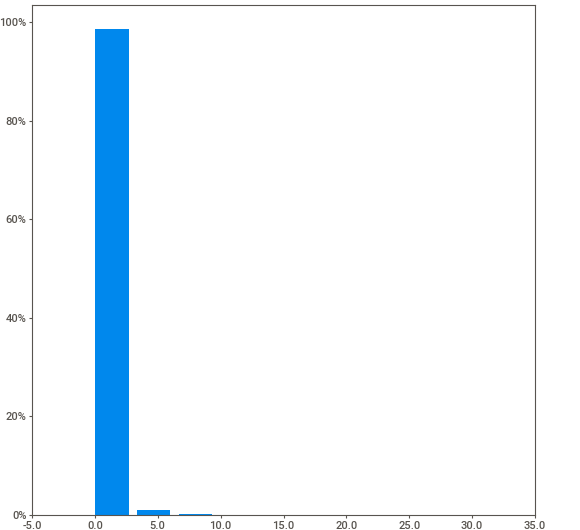
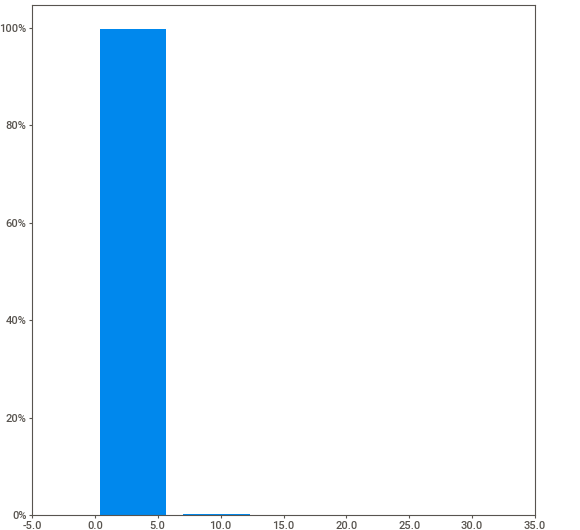
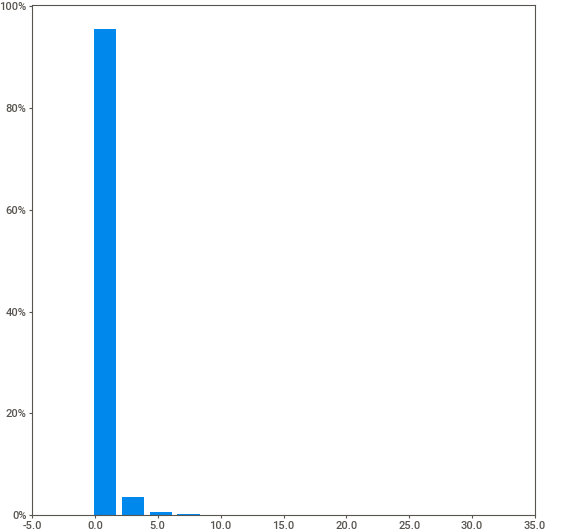
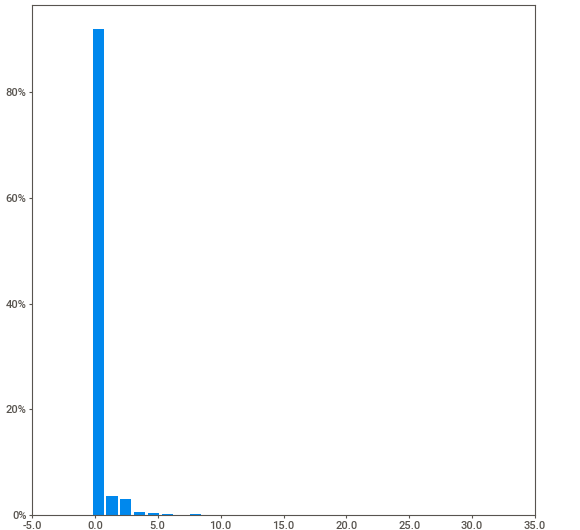
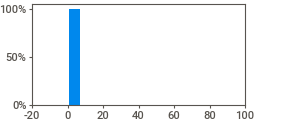
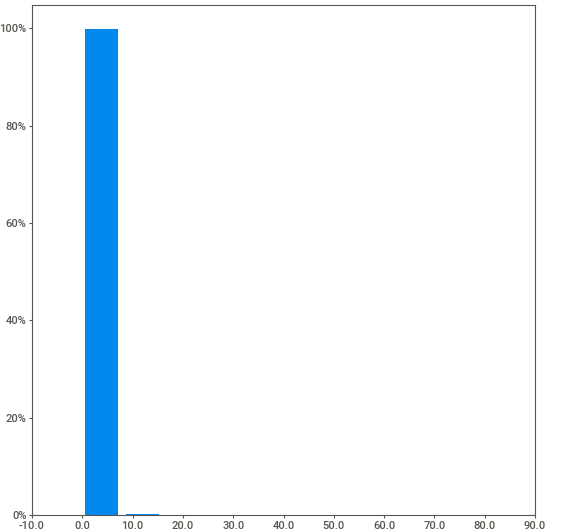
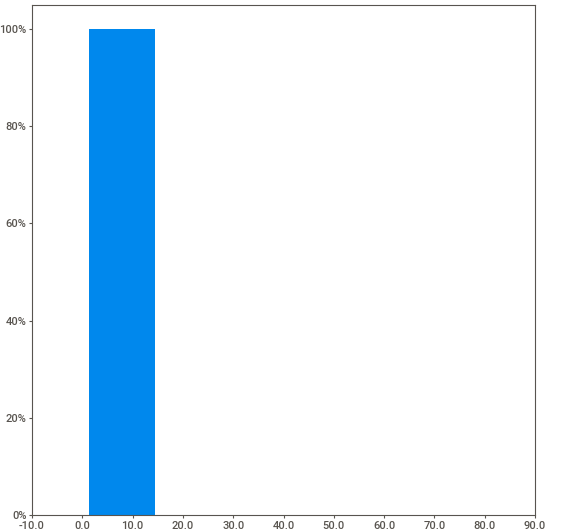
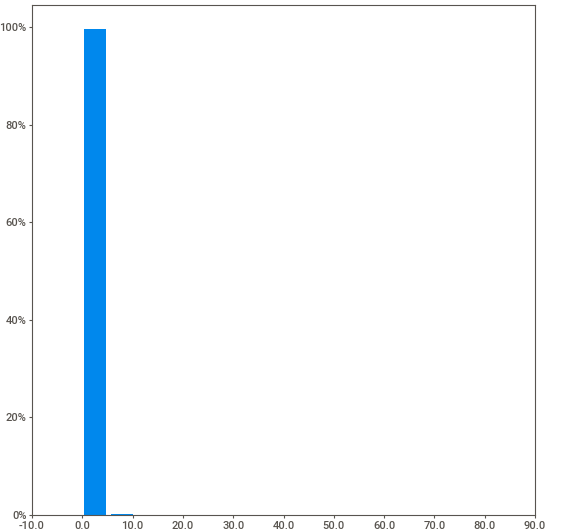
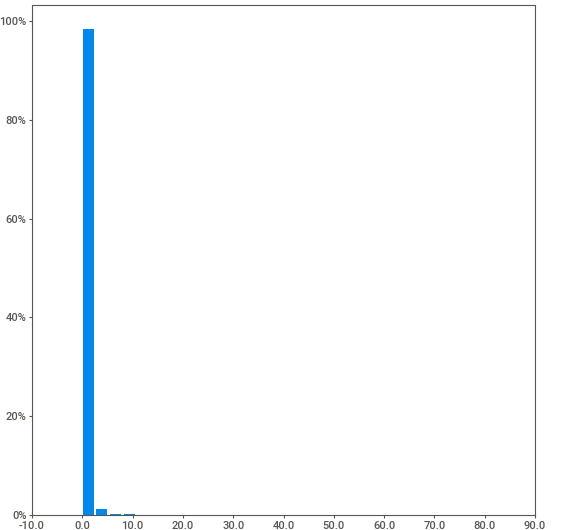
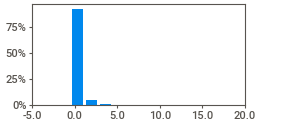
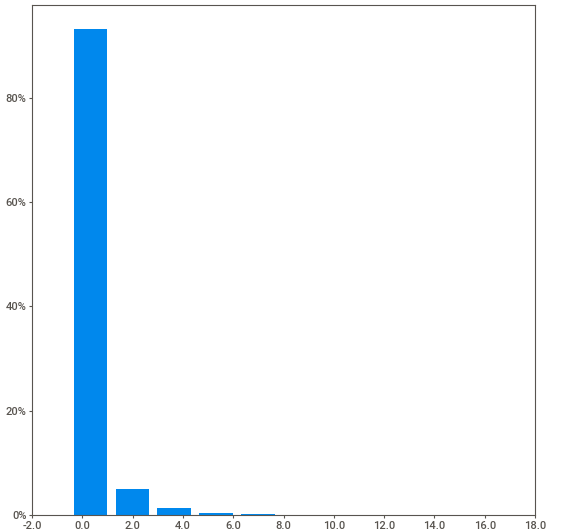
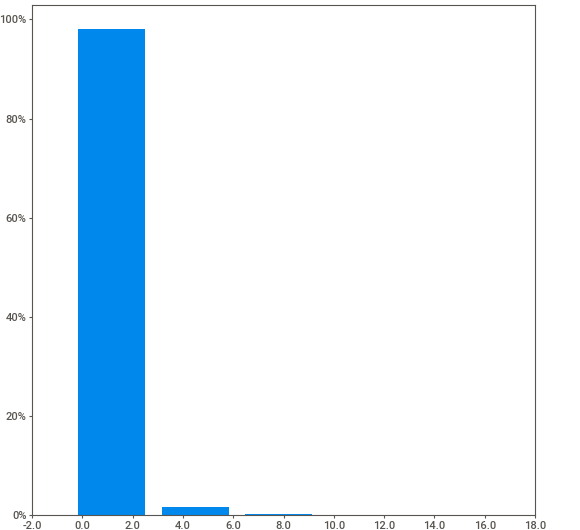
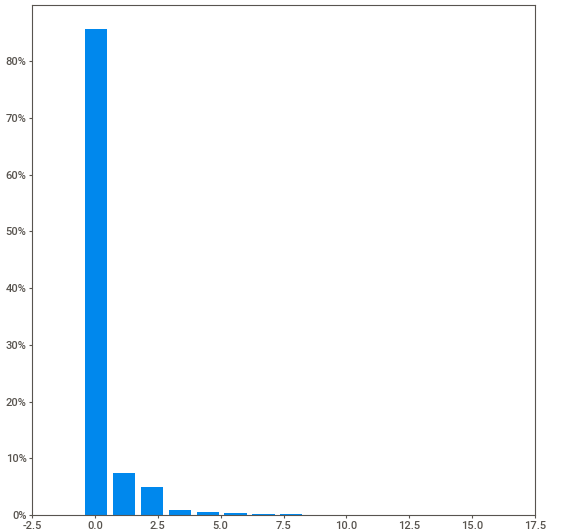
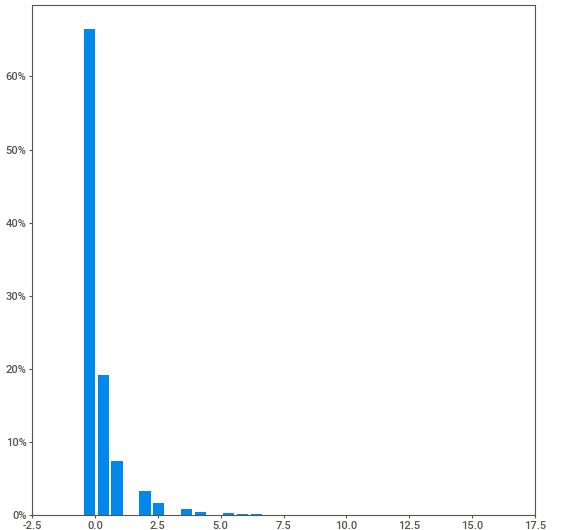
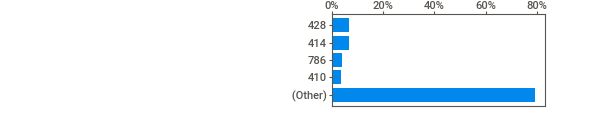
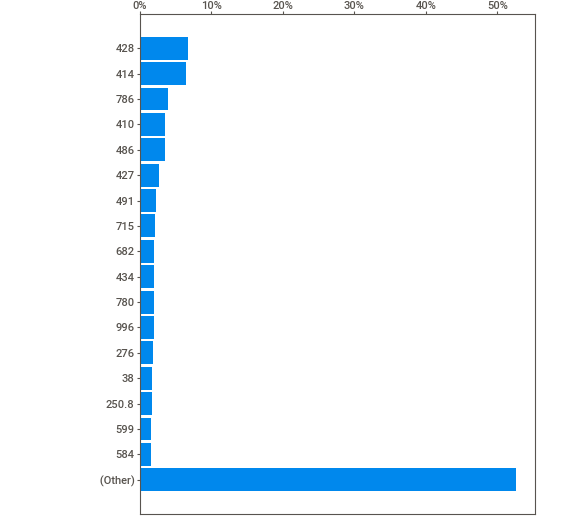
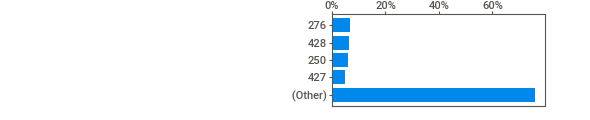
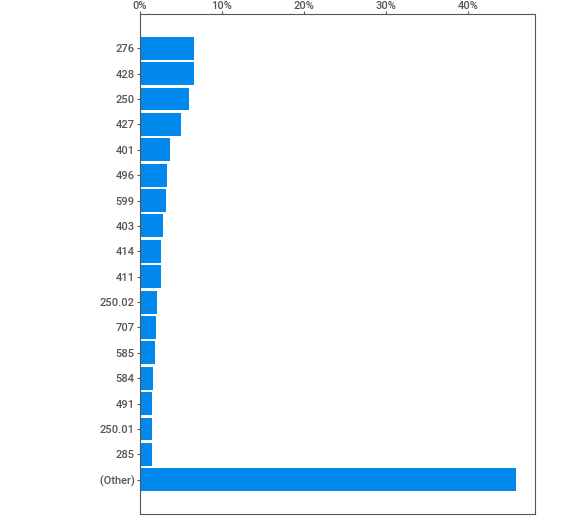
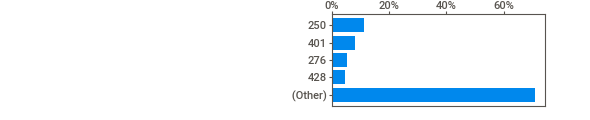
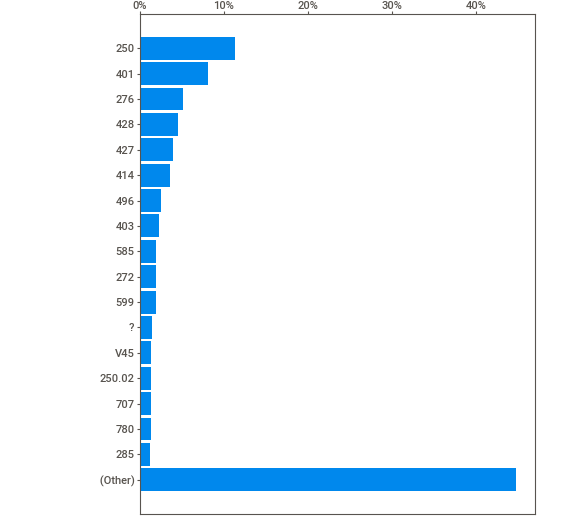
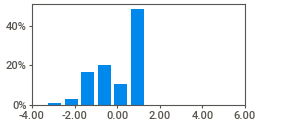
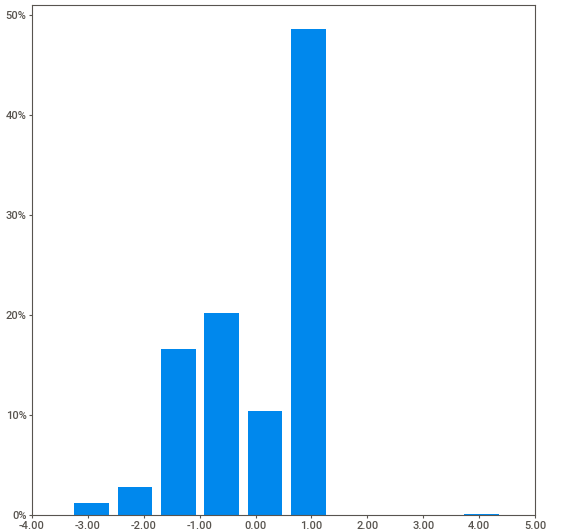
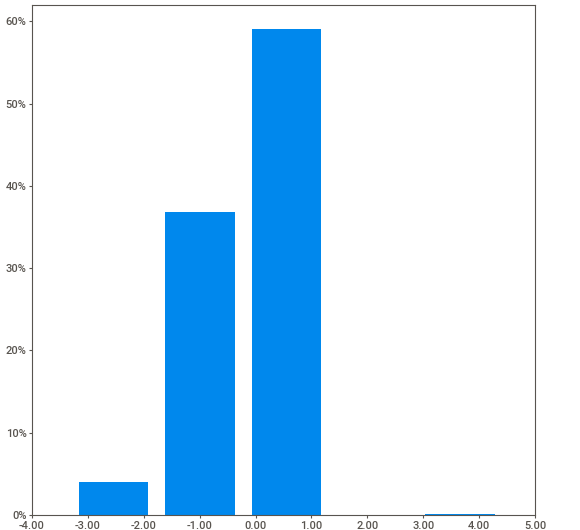
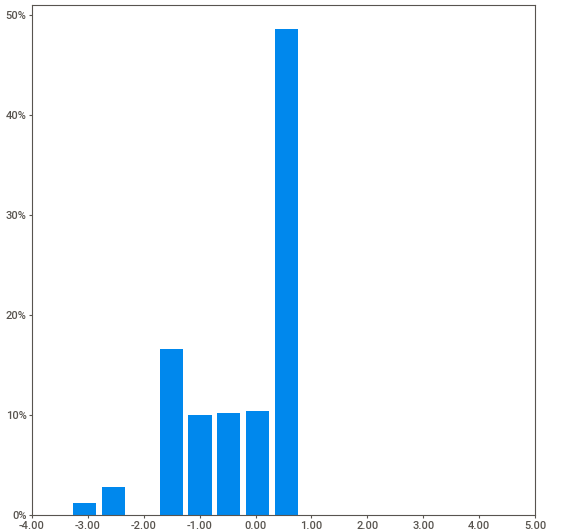
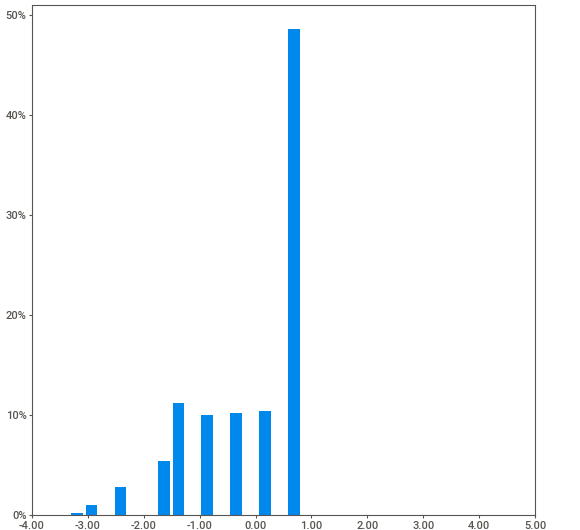
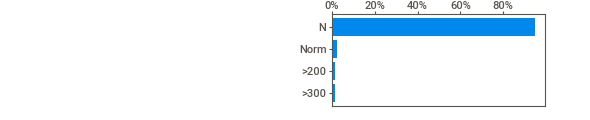
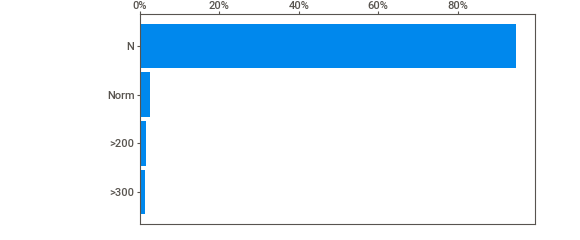
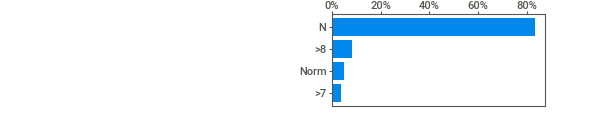
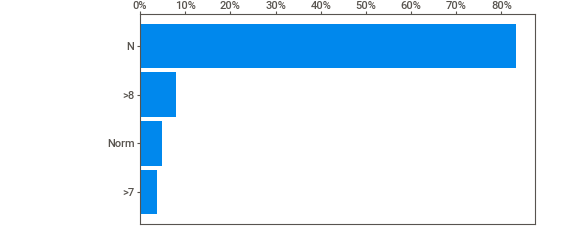
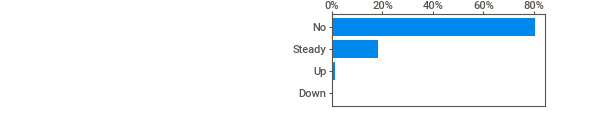
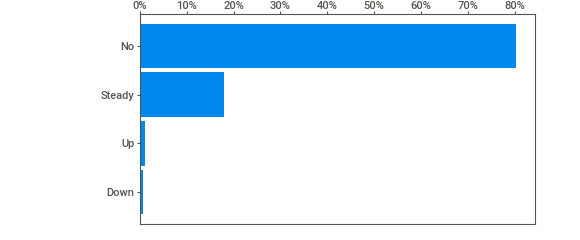
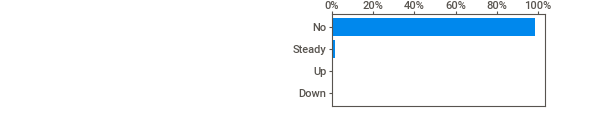
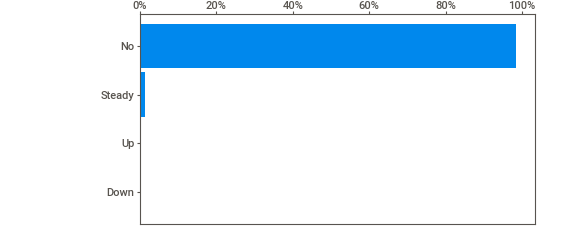
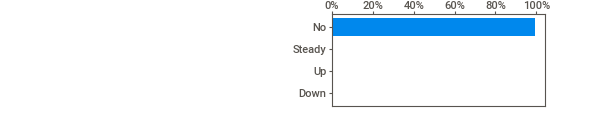
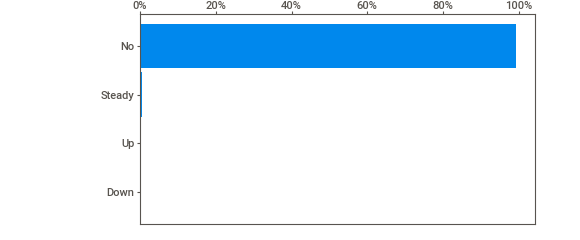
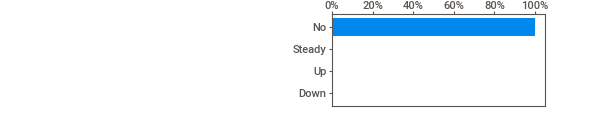
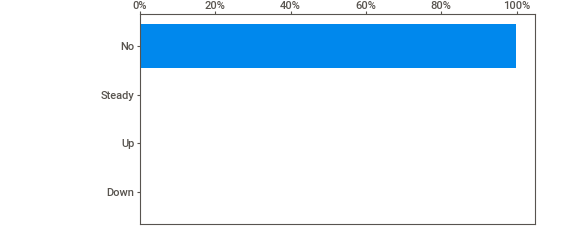
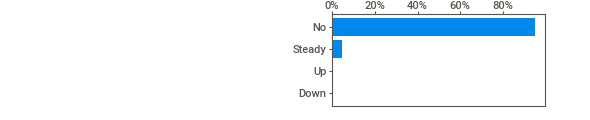
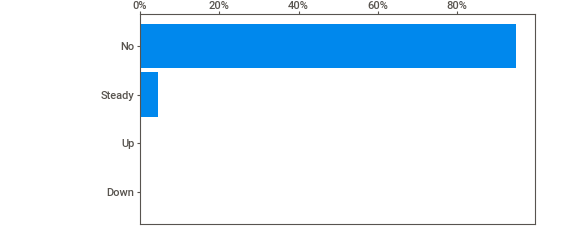
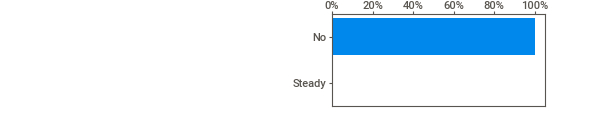
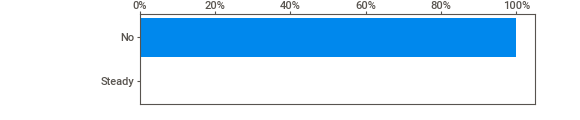
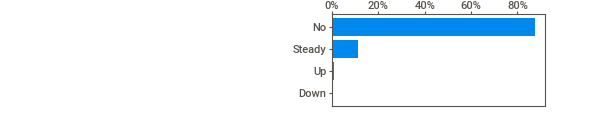
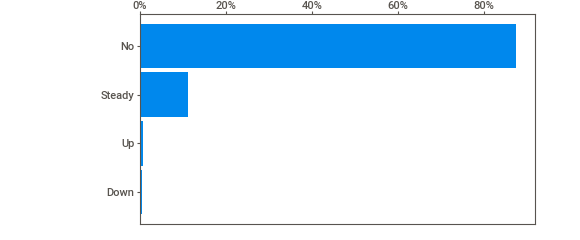
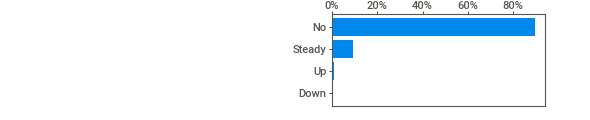
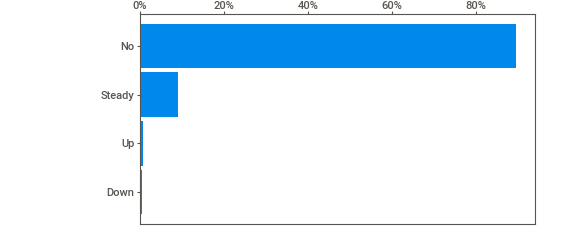
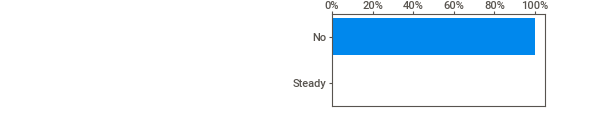
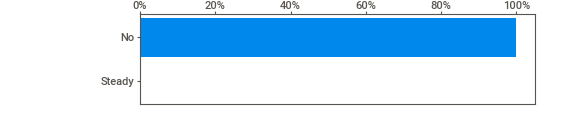
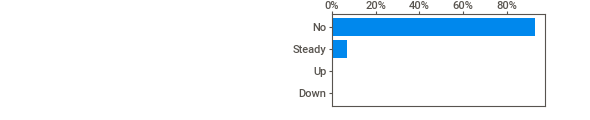
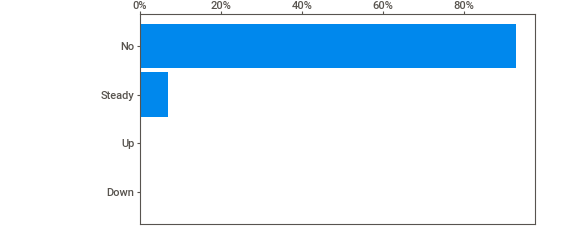
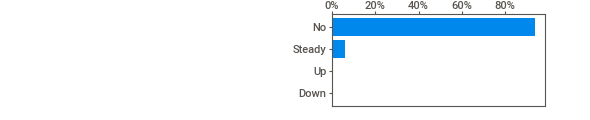
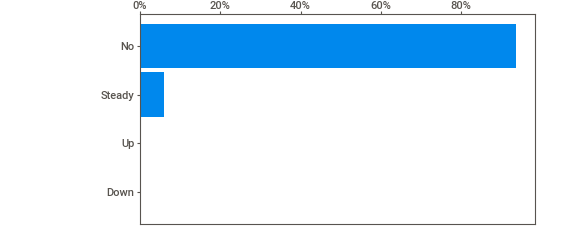
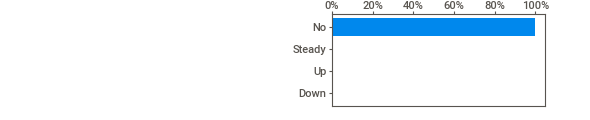
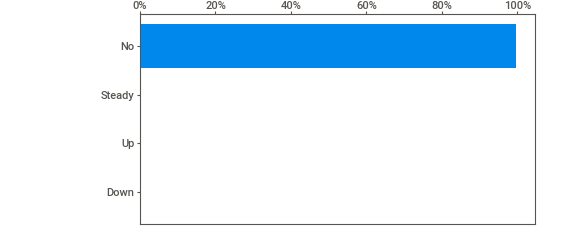
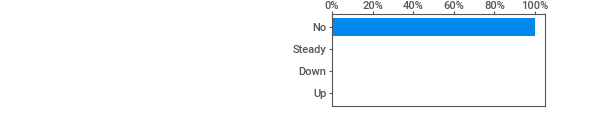
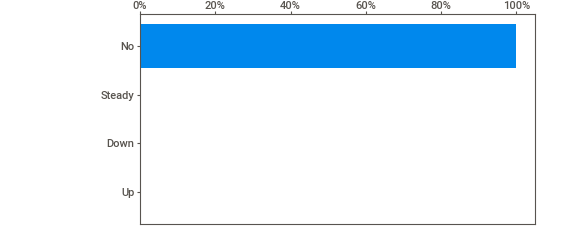
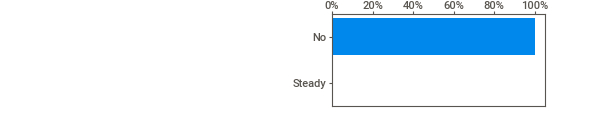
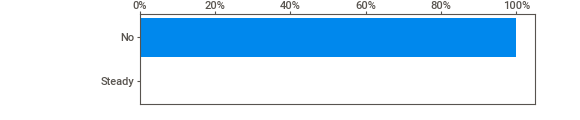
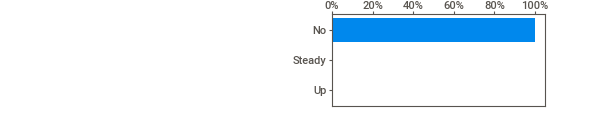
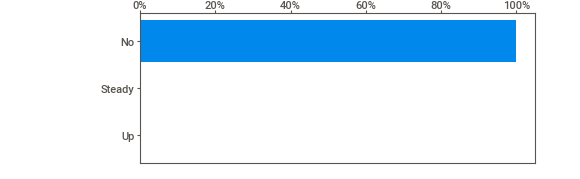
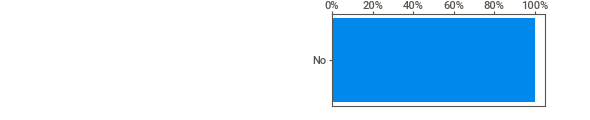
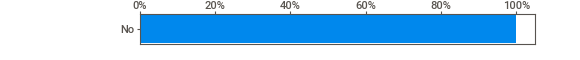
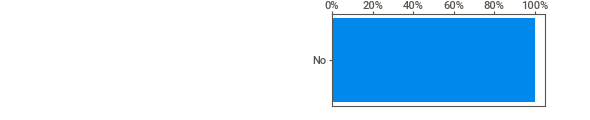
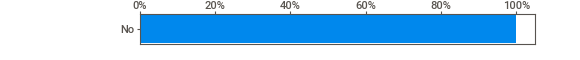
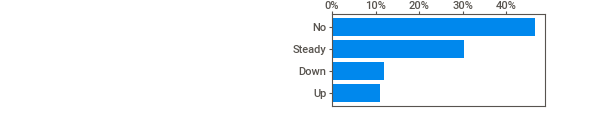
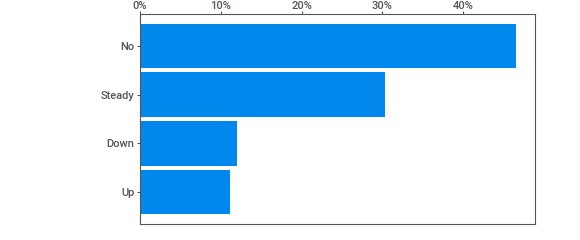
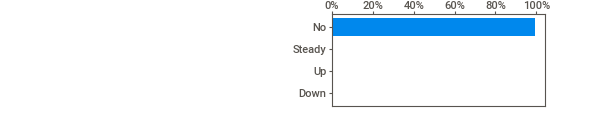
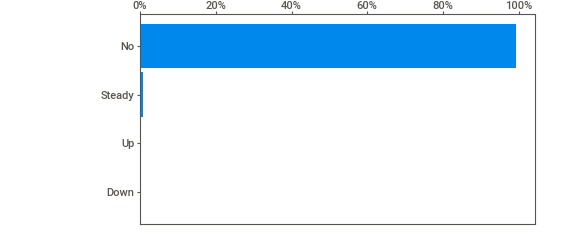
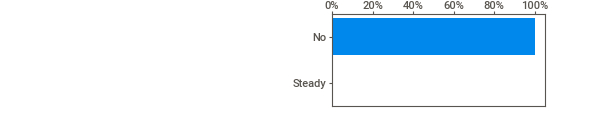
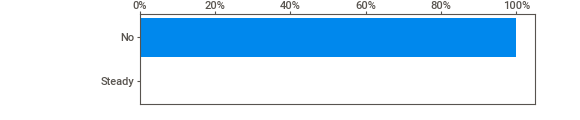
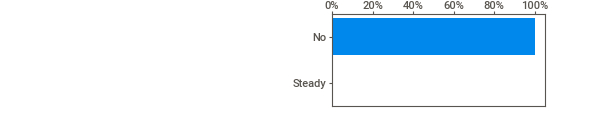
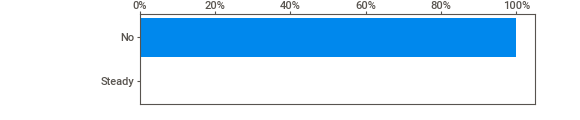
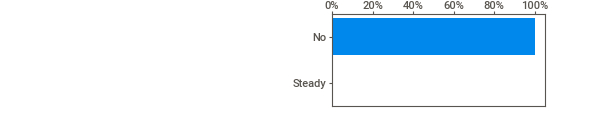
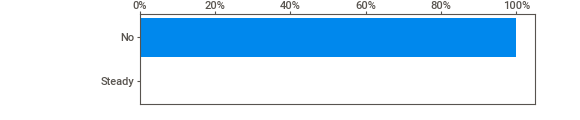
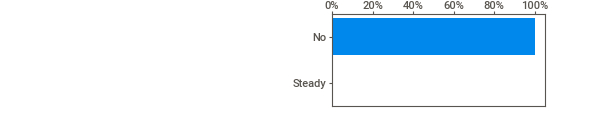
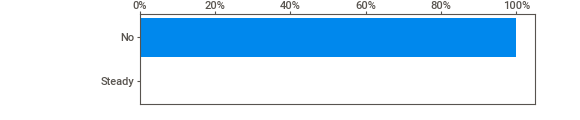
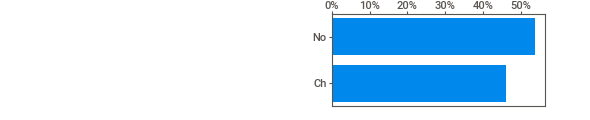
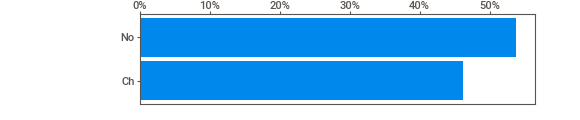
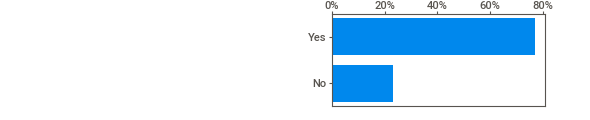
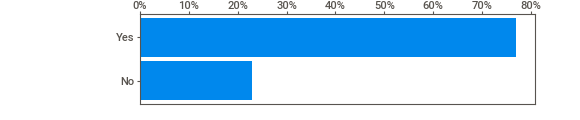
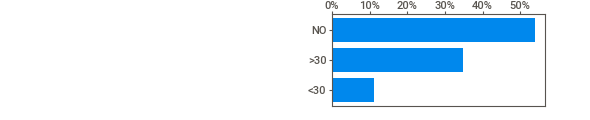
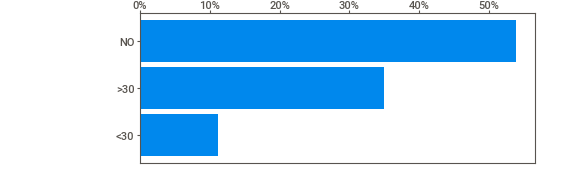
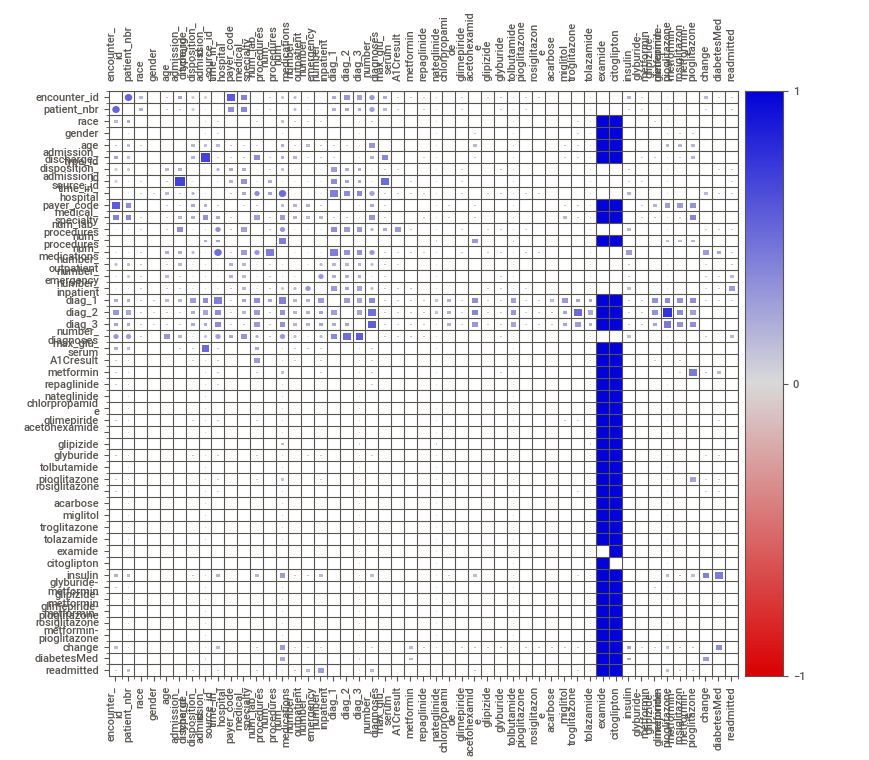
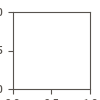

In [57]:
analzye.show_notebook()

# Tune Regularlization Parameter - grid search

## OVR

Best C: 0.8858667904100823
Top 5 features: Index(['number_emergency', 'number_diagnoses', 'patient_nbr', 'encounter_id',
       'number_inpatient'],
      dtype='object')
Data shape: (101766, 49)
Coefficients shape: (3, 48)
Intercept: [-2.15730382 -0.64805265  0.1411313 ]
Best cross-validation F1 macro score: 0.486207403452041
              precision    recall  f1-score   support

           0       0.53      0.00      0.01     11357
           1       0.51      0.28      0.36     35545
           2       0.59      0.89      0.71     54864

    accuracy                           0.58    101766
   macro avg       0.54      0.39      0.36    101766
weighted avg       0.56      0.58      0.51    101766



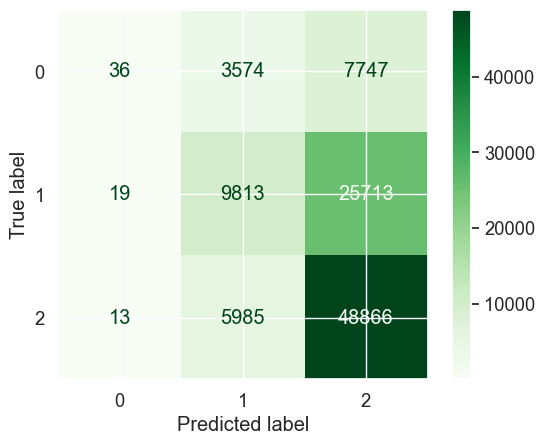

In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Assume df_new is your DataFrame and 'readmitted' is the target column

# Ensure 'readmitted' is categorical
df_new['readmitted'] = df_new['readmitted'].astype('category')

# Encode 'readmitted' as integers
le = LabelEncoder()
df_new['readmitted'] = le.fit_transform(df_new['readmitted'])

# Loop over all categorical columns and encode them
for col in df_new.select_dtypes(include=['category']).columns:
    if col != 'readmitted':  # Skip 'readmitted' as it's already encoded
        df_new[col] = le.fit_transform(df_new[col])

# Separate features and target
X = df_new.drop(['readmitted'], axis=1)
y = df_new['readmitted']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the parameter space for C
C = np.logspace(-3, 1, 20)
splits = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the LogisticRegressionCV model for One-vs-Rest (OVR) classification
model = LogisticRegressionCV(Cs=C, cv=splits, max_iter=1000, scoring='f1_macro', multi_class='ovr')
model.fit(X_scaled, y)

# Retrieve the best regularization parameter
best_C = model.C_[0]
print("Best C:", best_C)
importance = model.coef_
# Sum the absolute values of the coefficients across all classes for feature importance
abs_importance = np.sum(np.abs(importance), axis=0)

# Get the indices of the top 5 features
top_5_idx = np.argsort(abs_importance)[-5:]
# Get the names of the top 5 features
top_5_features = X.columns[top_5_idx]
print("Top 5 features:", top_5_features)

# Display the shapes for verification
print("Data shape:", df_new.shape)
print("Coefficients shape:", model.coef_.shape)
print("Intercept:", model.intercept_)
best_score = model.scores_[1].max()
print("Best cross-validation F1 macro score:", best_score)


predictions = model.predict(X_scaled)
print(classification_report(y, predictions))


# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y, predictions, cmap='Greens')
plt.show()
